<font color = 'brown'>

#### Note: Execution time for this entire case study is about 45 minutes with i5_Quad core processor 16GB RAM.

<font color = 'blue'>

## High Risk Churn Customers Prediction 


</font>


<font color = 'red'>
    
#### In this highly competitive market, telecommunications industry experiences an average of 15-25% annual churn rate. Retaining high profitable customers is very important to survive in the industry. In this project, we analyzed customer-level data of a leading telecom firm and built predictive models to identify customers at high risk of churn and identify the main indicators of churn.
</font>

In [1]:
from datetime import datetime
startTime = datetime.now()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#! pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA # perform PCA with n components
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # random forest classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score

import gc
%matplotlib inline

Using TensorFlow backend.


In [2]:
# read data set
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
# shape of the dataset
df.shape

(99999, 226)

In [4]:
# space used by training data
print('Training dataset uses {0} MB'.format(df.memory_usage().sum()/1024**2))

Training dataset uses 172.42266845703125 MB


In [5]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# set the limit for display columns as 300 to check all columns
pd.set_option("display.max_columns", 300)

In [7]:
# check the top 5 rows of the data set
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [8]:
# Check the unique value of the mobile_number
len(df['mobile_number'].unique())

99999

In [9]:
# check the unique value of the circle_id
len(df['circle_id'].unique())

1

In [10]:
# drop circle_id, as this complete data set is from one circle ID. 
# also can drop mobile number, which represents each user, as it is not important to track user identification.
df.drop(columns = ['mobile_number','circle_id'], inplace = True) 

In [11]:
df_missing_col_perc = round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending = False).reset_index()
df_missing_col_perc.columns = ['Features','% of missing data']
df_missing_col_perc

Features  % of missing data
0             count_rech_2g_6              74.85
1    date_of_last_rech_data_6              74.85
2             count_rech_3g_6              74.85
3          av_rech_amt_data_6              74.85
4             max_rech_data_6              74.85
5           total_rech_data_6              74.85
6                   arpu_3g_6              74.85
7                   arpu_2g_6              74.85
8            night_pck_user_6              74.85
9                   fb_user_6              74.85
10                  fb_user_7              74.43
11            count_rech_3g_7              74.43
12         av_rech_amt_data_7              74.43
13            max_rech_data_7              74.43
14          total_rech_data_7              74.43
15                  arpu_3g_7              74.43
16                  arpu_2g_7              74.43
17           night_pck_user_7              74.43
18   date_of_last_rech_data_7              74.43
19            count_rech_2g_7              74.43
20                  fb_user_9              74.08
21            max_rech_data_9              74.08
22          total_rech_data_9              74.08
23   date_of_last_rech_data_9              74.08
24            count_rech_3g_9              74.08
25                  arpu_3g_9              74.08
26                  arpu_2g_9              74.08
27         av_rech_amt_data_9              74.08
28           night_pck_user_9              74.08
29            count_rech_2g_9              74.08
..                        ...                ...
194               vol_3g_mb_6               0.00
195            total_og_mou_7               0.00
196          total_rech_amt_7               0.00
197            total_og_mou_8               0.00
198            total_og_mou_9               0.00
199                jun_vbc_3g               0.00
200            total_ic_mou_6               0.00
201            total_ic_mou_7               0.00
202            total_ic_mou_8               0.00
203            total_ic_mou_9               0.00
204          total_rech_num_6               0.00
205          total_rech_num_7               0.00
206          total_rech_num_8               0.00
207          total_rech_num_9               0.00
208          total_rech_amt_6               0.00
209          total_rech_amt_8               0.00
210               vol_2g_mb_9               0.00
211          total_rech_amt_9               0.00
212            max_rech_amt_6               0.00
213            max_rech_amt_7               0.00
214            max_rech_amt_8               0.00
215            max_rech_amt_9               0.00
216        last_day_rch_amt_6               0.00
217        last_day_rch_amt_7               0.00
218        last_day_rch_amt_8               0.00
219        last_day_rch_amt_9               0.00
220               vol_2g_mb_6               0.00
221               vol_2g_mb_7               0.00
222               vol_2g_mb_8               0.00
223                sep_vbc_3g               0.00

[224 rows x 2 columns]

In [12]:
# filter the missing values with 5%. for better visulization
df_missing_col_perc_fil = df_missing_col_perc.loc[df_missing_col_perc['% of missing data']>5]

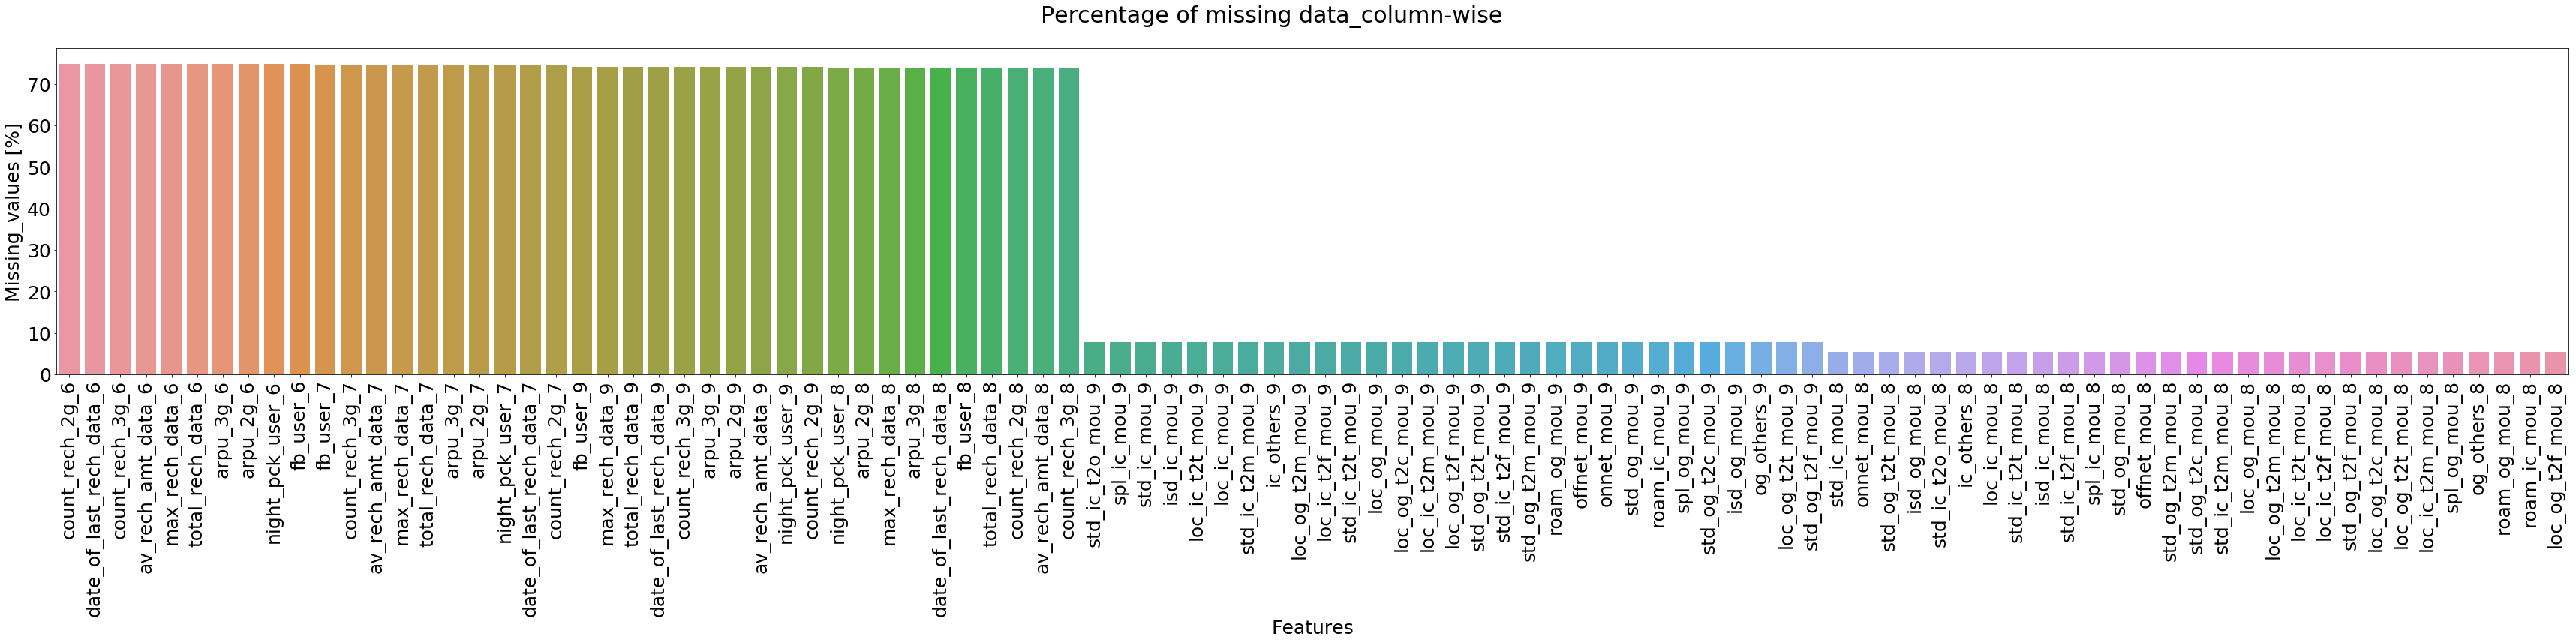

In [13]:
# plot the original data set missing values percentage 
plt.figure(figsize = (60,8))
fig = sns.barplot(x = 'Features', y = '% of missing data', data = df_missing_col_perc_fil)

plt.xticks(rotation=90)
plt.suptitle('Percentage of missing data_column-wise', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Missing_values [%]',fontsize = 25)
plt.xlabel('Features',fontsize = 25)
plt.show()

In [14]:
# noticed that from each month, there are certain columns having more than 70% missing values. lets check those columns from JUN
df_missing_col_perc[:10]

Features  % of missing data
0           count_rech_2g_6              74.85
1  date_of_last_rech_data_6              74.85
2           count_rech_3g_6              74.85
3        av_rech_amt_data_6              74.85
4           max_rech_data_6              74.85
5         total_rech_data_6              74.85
6                 arpu_3g_6              74.85
7                 arpu_2g_6              74.85
8          night_pck_user_6              74.85
9                 fb_user_6              74.85

In [15]:
# list of common columns other than respective month columns
com_col = [i for i in df.columns if not(re.search('(?:_6|_7|_8|_9|jun_|jul_|aug_|sep_)',i))]
print(com_col)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'aon']


In [16]:
df[com_col].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou           aon
count         98981.0         98981.0         98981.0  99999.000000
mean              0.0             0.0             0.0   1219.854749
std               0.0             0.0             0.0    954.733842
min               0.0             0.0             0.0    180.000000
25%               0.0             0.0             0.0    467.000000
50%               0.0             0.0             0.0    863.000000
75%               0.0             0.0             0.0   1807.500000
max               0.0             0.0             0.0   4337.000000

In [17]:
# drop the following columns : 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'. since there is no variance in the data
df.drop(columns = com_col[:-1], inplace = True)

In [18]:
# list the columns related to good phase ( means from 6th & 7th month) along with common columns
good_ph_col = com_col+[i for i in df.columns if re.search('(?:_6|_7|jun_|jul_)',i)]
print(good_ph_col)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'aon', 'last_date_of_month_6', 'last_date_of_month_7', 'arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mo

In [19]:
# list of churn phase columns from 9th month
churn_ph_col = [i for i in df.columns if re.search('(?:_9|sep_)',i)]
print(churn_ph_col)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g']


In [20]:
# list the columns from each month to check data separately for better understanding.
jun_ph_col = [i for i in df.columns if re.search('(?:_6|jun_)',i)]
jul_ph_col = [i for i in df.columns if re.search('(?:_7|jul_)',i)]
aug_ph_col = [i for i in df.columns if re.search('(?:_8|aug_)',i)]
sep_ph_col = [i for i in df.columns if re.search('(?:_9|sep_)',i)]

In [21]:
# get the mobile data related columns from JUN month 
jun_data_col = [s for s in df[jun_ph_col].columns if re.search('(?:rech_2g|rech_3g|rech_data|rech_amt_data|arpu|user)',s)]
print(jun_data_col)

['arpu_6', 'date_of_last_rech_data_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6']


In [22]:
# check the missing values of 'Jun_data_col' when 'date_of_last_rech_data_6' is null.
df[jun_data_col].loc[df['date_of_last_rech_data_6'].isnull()].isnull().sum()

arpu_6                          0
date_of_last_rech_data_6    74846
total_rech_data_6           74846
max_rech_data_6             74846
count_rech_2g_6             74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
dtype: int64

In [23]:
# it is clear that, all missing values realted to mobile data is null when 'date_of_last_rech_data_6' is null. 
# this means, no recharge done. we may impute zero into all missing values from 'jun_data_col'

# let's check for all other 3 months to conclude.

In [24]:
# get the mobile data related columns from Jul month 
jul_data_col = [s for s in df[jul_ph_col].columns if re.search('(?:rech_2g|rech_3g|rech_data|rech_amt_data|arpu|user)',s)]
print(jul_data_col)

['arpu_7', 'date_of_last_rech_data_7', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7']


In [25]:
# check the missing values of 'Jul_data_col' when 'date_of_last_rech_data_7' is null.
df[jul_data_col].loc[df['date_of_last_rech_data_7'].isnull()].isnull().sum()

arpu_7                          0
date_of_last_rech_data_7    74428
total_rech_data_7           74428
max_rech_data_7             74428
count_rech_2g_7             74428
count_rech_3g_7             74428
av_rech_amt_data_7          74428
arpu_3g_7                   74428
arpu_2g_7                   74428
night_pck_user_7            74428
fb_user_7                   74428
dtype: int64

In [26]:
# it is clear that, all missing values realted to mobile data is null when 'date_of_last_rech_data_7' is null. 
# this means, no recharge done. we may impute zero into all missing values from 'jul_data_col'

In [27]:
# get the mobile data related columns from Aug month 
aug_data_col = [s for s in df[aug_ph_col].columns if re.search('(?:rech_2g|rech_3g|rech_data|rech_amt_data|arpu|user)',s)]
print(aug_data_col)

['arpu_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8']


In [28]:
# check the missing values of 'Aug_data_col' when 'date_of_last_rech_data_8' is null.
df[aug_data_col].loc[df['date_of_last_rech_data_8'].isnull()].isnull().sum()

arpu_8                          0
date_of_last_rech_data_8    73660
total_rech_data_8           73660
max_rech_data_8             73660
count_rech_2g_8             73660
count_rech_3g_8             73660
av_rech_amt_data_8          73660
arpu_3g_8                   73660
arpu_2g_8                   73660
night_pck_user_8            73660
fb_user_8                   73660
dtype: int64

In [29]:
# it is clear that, all missing values realted to mobile data is null when 'date_of_last_rech_data_8' is null. 
# this means, no recharge done. we may impute zero into all missing values from 'aug_data_col'

In [30]:
# get the mobile data related columns from Sep month 
sep_data_col = [s for s in df[sep_ph_col].columns if re.search('(?:rech_2g|rech_3g|rech_data|rech_amt_data|arpu|user)',s)]
print(sep_data_col)

['arpu_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']


In [31]:
# check the missing values of 'sep_data_col' when 'date_of_last_rech_data_9' is null.
df[sep_data_col].loc[df['date_of_last_rech_data_9'].isnull()].isnull().sum()

arpu_9                          0
date_of_last_rech_data_9    74077
total_rech_data_9           74077
max_rech_data_9             74077
count_rech_2g_9             74077
count_rech_3g_9             74077
av_rech_amt_data_9          74077
arpu_3g_9                   74077
arpu_2g_9                   74077
night_pck_user_9            74077
fb_user_9                   74077
dtype: int64

In [32]:
# it is clear that, all missing values realted to mobile data is null when 'date_of_last_rech_data_9' is null. 
# this means, no recharge done. we may impute zero into all missing values from 'sep_data_col'

# It is clear that all four months having same pattern, so we can impute zero in all those columns, 
# except 'date_of_last_rech_data_x', we can drop this date related columns.  

In [33]:
# combine the all four months columns excluding 'date_of_last_rech_data_x' & 'arpu_x' columns
lst_rech_missing_col = jun_data_col[2:]+jul_data_col[2:]+aug_data_col[2:]+sep_data_col[2:]
print(lst_rech_missing_col)

['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']


In [34]:
# combine the all four months columns include only 'date_of_last_rech_data_x' column
lst_rech_date_col = jun_data_col[1:2]+jul_data_col[1:2]+aug_data_col[1:2]+sep_data_col[1:2]
print(lst_rech_date_col)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [35]:
# copy the dataframe before filtering missing values
df_fil = df.copy()

In [36]:
# impute missing values to zero for the cloumns form this list -- 'lst_rech_missing_col'
df_fil[lst_rech_missing_col] = df_fil[lst_rech_missing_col].apply(lambda X:X.fillna(0))

In [37]:
# drop the columns from this list -- 'lst_rech_date_col' as date columns are not much useful.
df_fil.drop(columns = lst_rech_date_col, inplace = True)

In [38]:
df_fil_missing_col_perc = round(df_fil.isnull().sum()/len(df_fil.index)*100,2).sort_values(ascending = False).reset_index()
df_fil_missing_col_perc.columns = ['Features','% of missing data']
df_fil_missing_col_perc.head(10)

Features  % of missing data
0  loc_og_t2f_mou_9               7.75
1      offnet_mou_9               7.75
2  loc_ic_t2t_mou_9               7.75
3      std_ic_mou_9               7.75
4      loc_og_mou_9               7.75
5  std_og_t2t_mou_9               7.75
6  loc_og_t2m_mou_9               7.75
7      spl_ic_mou_9               7.75
8  std_ic_t2o_mou_9               7.75
9  loc_og_t2t_mou_9               7.75

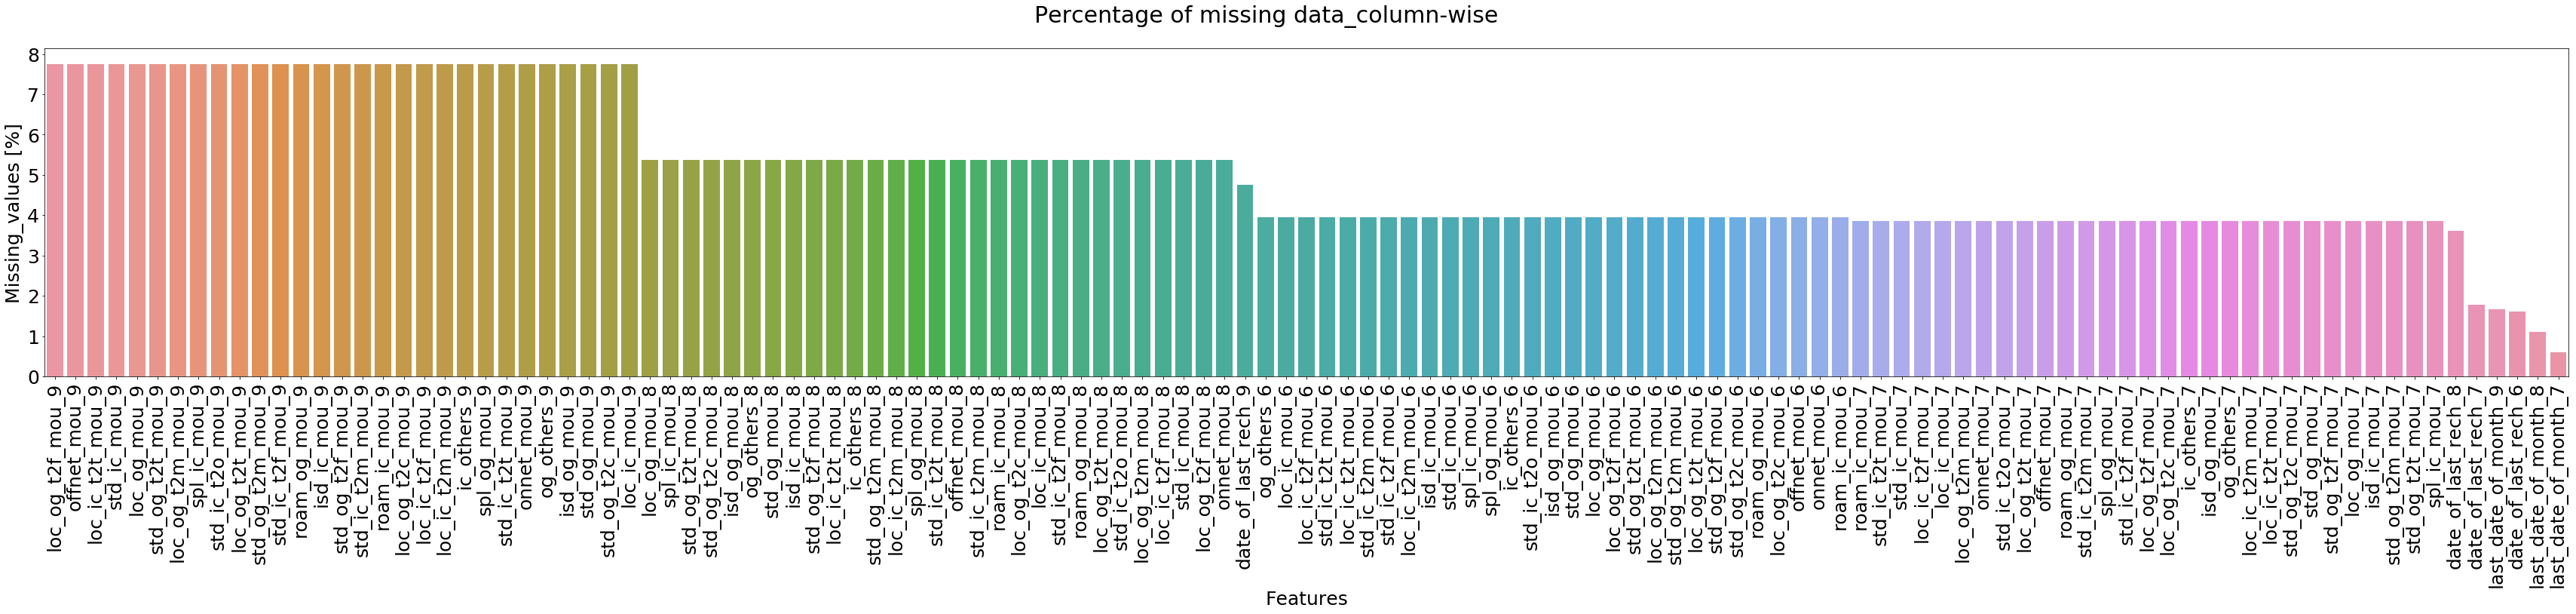

In [39]:
# plot the original data set missing values percentage 
# filter the missing values with 5%. for better visulization
df_fil_missing_col_perc_fil = df_fil_missing_col_perc.loc[df_fil_missing_col_perc['% of missing data']>0]

plt.figure(figsize = (60,8))
fig = sns.barplot(x = 'Features', y = '% of missing data', data = df_fil_missing_col_perc_fil)

plt.xticks(rotation=90)
plt.suptitle('Percentage of missing data_column-wise', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Missing_values [%]',fontsize = 25)
plt.xlabel('Features',fontsize = 25)
plt.show()

In [40]:
# from each month, 'Minutes of usage - voice calls' related columns having missing values

In [41]:
# list of columns from june month
lst_jun_cols = [s for s in df_fil.columns if re.search('(?:_6)',s)]

# check missing values from june month columns
df_fil[lst_jun_cols].isnull().sum().sort_values(ascending = False)

std_ic_t2f_mou_6        3937
loc_ic_t2t_mou_6        3937
loc_ic_t2f_mou_6        3937
loc_ic_mou_6            3937
std_ic_t2t_mou_6        3937
std_ic_t2m_mou_6        3937
std_ic_t2o_mou_6        3937
std_ic_mou_6            3937
og_others_6             3937
spl_ic_mou_6            3937
isd_ic_mou_6            3937
ic_others_6             3937
spl_og_mou_6            3937
isd_og_mou_6            3937
std_og_mou_6            3937
loc_ic_t2m_mou_6        3937
std_og_t2c_mou_6        3937
std_og_t2f_mou_6        3937
std_og_t2m_mou_6        3937
std_og_t2t_mou_6        3937
loc_og_mou_6            3937
loc_og_t2c_mou_6        3937
loc_og_t2f_mou_6        3937
loc_og_t2m_mou_6        3937
loc_og_t2t_mou_6        3937
roam_og_mou_6           3937
roam_ic_mou_6           3937
offnet_mou_6            3937
onnet_mou_6             3937
date_of_last_rech_6     1607
total_og_mou_6             0
arpu_6                     0
fb_user_6                  0
sachet_3g_6                0
total_ic_mou_6

In [42]:
# check all 'Minutes of usage - voice calls' columns having same number of missing value rows 
df_fil[lst_jun_cols].loc[df_fil['std_ic_t2f_mou_6'].isnull()].isnull().sum().sort_values(ascending = False)

std_ic_t2f_mou_6        3937
loc_ic_t2t_mou_6        3937
loc_ic_t2f_mou_6        3937
loc_ic_mou_6            3937
std_ic_t2t_mou_6        3937
std_ic_t2m_mou_6        3937
std_ic_t2o_mou_6        3937
std_ic_mou_6            3937
og_others_6             3937
spl_ic_mou_6            3937
isd_ic_mou_6            3937
ic_others_6             3937
spl_og_mou_6            3937
isd_og_mou_6            3937
std_og_mou_6            3937
loc_ic_t2m_mou_6        3937
std_og_t2c_mou_6        3937
std_og_t2f_mou_6        3937
std_og_t2m_mou_6        3937
std_og_t2t_mou_6        3937
loc_og_mou_6            3937
loc_og_t2c_mou_6        3937
loc_og_t2f_mou_6        3937
loc_og_t2m_mou_6        3937
loc_og_t2t_mou_6        3937
roam_og_mou_6           3937
roam_ic_mou_6           3937
offnet_mou_6            3937
onnet_mou_6             3937
date_of_last_rech_6      774
total_og_mou_6             0
arpu_6                     0
fb_user_6                  0
sachet_3g_6                0
total_ic_mou_6

In [43]:
# check the 'total_og_mou_6','total_ic_mou_6' columns of missing value rows. 
df_fil[['total_og_mou_6','total_ic_mou_6']].loc[df_fil['std_ic_t2f_mou_6'].isnull()].describe()

# There is no outgoing or incoming 'Minutes of usage - voice calls', so we can impute zeros to missing values of mou.

total_og_mou_6  total_ic_mou_6
count          3937.0          3937.0
mean              0.0             0.0
std               0.0             0.0
min               0.0             0.0
25%               0.0             0.0
50%               0.0             0.0
75%               0.0             0.0
max               0.0             0.0

In [44]:
# list of columns from july month
lst_jul_cols = [s for s in df_fil.columns if re.search('(?:_7)',s)]

# check missing values from july month columns
df_fil[lst_jul_cols].isnull().sum().sort_values(ascending = False)

std_ic_t2f_mou_7        3859
loc_ic_t2f_mou_7        3859
std_ic_t2t_mou_7        3859
std_ic_t2m_mou_7        3859
loc_ic_t2m_mou_7        3859
std_ic_t2o_mou_7        3859
std_ic_mou_7            3859
loc_ic_t2t_mou_7        3859
spl_ic_mou_7            3859
isd_ic_mou_7            3859
ic_others_7             3859
og_others_7             3859
spl_og_mou_7            3859
isd_og_mou_7            3859
std_og_mou_7            3859
std_og_t2c_mou_7        3859
std_og_t2f_mou_7        3859
std_og_t2m_mou_7        3859
std_og_t2t_mou_7        3859
loc_og_mou_7            3859
loc_og_t2c_mou_7        3859
loc_og_t2f_mou_7        3859
loc_og_t2m_mou_7        3859
loc_og_t2t_mou_7        3859
roam_og_mou_7           3859
roam_ic_mou_7           3859
offnet_mou_7            3859
onnet_mou_7             3859
loc_ic_mou_7            3859
date_of_last_rech_7     1767
last_date_of_month_7     601
sachet_3g_7                0
total_ic_mou_7             0
arpu_7                     0
monthly_3g_7  

In [45]:
# check all 'Minutes of usage - voice calls' columns having same number of missing value rows 
df_fil[lst_jul_cols].loc[df_fil['std_ic_t2f_mou_7'].isnull()].isnull().sum().sort_values(ascending = False)

std_ic_t2f_mou_7        3859
loc_ic_t2f_mou_7        3859
std_ic_t2t_mou_7        3859
std_ic_t2m_mou_7        3859
loc_ic_t2m_mou_7        3859
std_ic_t2o_mou_7        3859
std_ic_mou_7            3859
loc_ic_t2t_mou_7        3859
spl_ic_mou_7            3859
isd_ic_mou_7            3859
ic_others_7             3859
og_others_7             3859
spl_og_mou_7            3859
isd_og_mou_7            3859
std_og_mou_7            3859
std_og_t2c_mou_7        3859
std_og_t2f_mou_7        3859
std_og_t2m_mou_7        3859
std_og_t2t_mou_7        3859
loc_og_mou_7            3859
loc_og_t2c_mou_7        3859
loc_og_t2f_mou_7        3859
loc_og_t2m_mou_7        3859
loc_og_t2t_mou_7        3859
roam_og_mou_7           3859
roam_ic_mou_7           3859
offnet_mou_7            3859
onnet_mou_7             3859
loc_ic_mou_7            3859
date_of_last_rech_7      949
last_date_of_month_7     601
sachet_3g_7                0
total_ic_mou_7             0
arpu_7                     0
monthly_3g_7  

In [46]:
# check the 'total_og_mou_7','total_ic_mou_7' columns of missing value rows. 
df_fil[['total_og_mou_7','total_ic_mou_7']].loc[df_fil['std_ic_t2f_mou_7'].isnull()].describe()

# There is no outgoing or incoming 'Minutes of usage - voice calls', so we can impute zeros to missing values of mou.

total_og_mou_7  total_ic_mou_7
count          3859.0          3859.0
mean              0.0             0.0
std               0.0             0.0
min               0.0             0.0
25%               0.0             0.0
50%               0.0             0.0
75%               0.0             0.0
max               0.0             0.0

In [47]:
# list of columns from aug month
lst_aug_cols = [s for s in df_fil.columns if re.search('(?:_8)',s)]

# check missing values from aug month columns
df_fil[lst_aug_cols].isnull().sum().sort_values(ascending = False)

std_ic_t2f_mou_8        5378
loc_ic_t2f_mou_8        5378
std_ic_t2t_mou_8        5378
std_ic_t2m_mou_8        5378
loc_ic_t2m_mou_8        5378
std_ic_t2o_mou_8        5378
std_ic_mou_8            5378
loc_ic_t2t_mou_8        5378
spl_ic_mou_8            5378
isd_ic_mou_8            5378
ic_others_8             5378
og_others_8             5378
spl_og_mou_8            5378
isd_og_mou_8            5378
std_og_mou_8            5378
std_og_t2c_mou_8        5378
std_og_t2f_mou_8        5378
std_og_t2m_mou_8        5378
std_og_t2t_mou_8        5378
loc_og_mou_8            5378
loc_og_t2c_mou_8        5378
loc_og_t2f_mou_8        5378
loc_og_t2m_mou_8        5378
loc_og_t2t_mou_8        5378
roam_og_mou_8           5378
roam_ic_mou_8           5378
offnet_mou_8            5378
onnet_mou_8             5378
loc_ic_mou_8            5378
date_of_last_rech_8     3622
last_date_of_month_8    1100
sachet_3g_8                0
total_ic_mou_8             0
arpu_8                     0
monthly_3g_8  

In [48]:
# check all 'Minutes of usage - voice calls' columns having same number of missing value rows 
df_fil[lst_aug_cols].loc[df_fil['std_ic_t2f_mou_8'].isnull()].isnull().sum().sort_values(ascending = False)

std_ic_t2f_mou_8        5378
loc_ic_t2f_mou_8        5378
std_ic_t2t_mou_8        5378
std_ic_t2m_mou_8        5378
loc_ic_t2m_mou_8        5378
std_ic_t2o_mou_8        5378
std_ic_mou_8            5378
loc_ic_t2t_mou_8        5378
spl_ic_mou_8            5378
isd_ic_mou_8            5378
ic_others_8             5378
og_others_8             5378
spl_og_mou_8            5378
isd_og_mou_8            5378
std_og_mou_8            5378
std_og_t2c_mou_8        5378
std_og_t2f_mou_8        5378
std_og_t2m_mou_8        5378
std_og_t2t_mou_8        5378
loc_og_mou_8            5378
loc_og_t2c_mou_8        5378
loc_og_t2f_mou_8        5378
loc_og_t2m_mou_8        5378
loc_og_t2t_mou_8        5378
roam_og_mou_8           5378
roam_ic_mou_8           5378
offnet_mou_8            5378
onnet_mou_8             5378
loc_ic_mou_8            5378
date_of_last_rech_8     1981
last_date_of_month_8    1100
sachet_3g_8                0
total_ic_mou_8             0
arpu_8                     0
monthly_3g_8  

In [49]:
# check the 'total_og_mou_8','total_ic_mou_8' columns of missing value rows. 
df_fil[['total_og_mou_8','total_ic_mou_8']].loc[df_fil['std_ic_t2f_mou_8'].isnull()].describe()

# There is no outgoing or incoming 'Minutes of usage - voice calls', so we can impute zeros to missing values of mou.

total_og_mou_8  total_ic_mou_8
count          5378.0          5378.0
mean              0.0             0.0
std               0.0             0.0
min               0.0             0.0
25%               0.0             0.0
50%               0.0             0.0
75%               0.0             0.0
max               0.0             0.0

In [50]:
# list of columns from sep month
lst_sep_cols = [s for s in df_fil.columns if re.search('(?:_9)',s)]

# check missing values from aug month columns
df_fil[lst_sep_cols].isnull().sum().sort_values(ascending = False)

std_ic_t2f_mou_9        7745
loc_ic_t2f_mou_9        7745
std_ic_t2t_mou_9        7745
std_ic_t2m_mou_9        7745
loc_ic_t2m_mou_9        7745
std_ic_t2o_mou_9        7745
std_ic_mou_9            7745
loc_ic_t2t_mou_9        7745
spl_ic_mou_9            7745
isd_ic_mou_9            7745
ic_others_9             7745
og_others_9             7745
spl_og_mou_9            7745
isd_og_mou_9            7745
std_og_mou_9            7745
std_og_t2c_mou_9        7745
std_og_t2f_mou_9        7745
std_og_t2m_mou_9        7745
std_og_t2t_mou_9        7745
loc_og_mou_9            7745
loc_og_t2c_mou_9        7745
loc_og_t2f_mou_9        7745
loc_og_t2m_mou_9        7745
loc_og_t2t_mou_9        7745
roam_og_mou_9           7745
roam_ic_mou_9           7745
offnet_mou_9            7745
onnet_mou_9             7745
loc_ic_mou_9            7745
date_of_last_rech_9     4760
last_date_of_month_9    1659
sachet_3g_9                0
total_ic_mou_9             0
arpu_9                     0
monthly_3g_9  

In [51]:
# check all 'Minutes of usage - voice calls' columns having same number of missing value rows 
df_fil[lst_sep_cols].loc[df_fil['std_ic_t2f_mou_9'].isnull()].isnull().sum().sort_values(ascending = False)

std_ic_t2f_mou_9        7745
loc_ic_t2f_mou_9        7745
std_ic_t2t_mou_9        7745
std_ic_t2m_mou_9        7745
loc_ic_t2m_mou_9        7745
std_ic_t2o_mou_9        7745
std_ic_mou_9            7745
loc_ic_t2t_mou_9        7745
spl_ic_mou_9            7745
isd_ic_mou_9            7745
ic_others_9             7745
og_others_9             7745
spl_og_mou_9            7745
isd_og_mou_9            7745
std_og_mou_9            7745
std_og_t2c_mou_9        7745
std_og_t2f_mou_9        7745
std_og_t2m_mou_9        7745
std_og_t2t_mou_9        7745
loc_og_mou_9            7745
loc_og_t2c_mou_9        7745
loc_og_t2f_mou_9        7745
loc_og_t2m_mou_9        7745
loc_og_t2t_mou_9        7745
roam_og_mou_9           7745
roam_ic_mou_9           7745
offnet_mou_9            7745
onnet_mou_9             7745
loc_ic_mou_9            7745
date_of_last_rech_9     2887
last_date_of_month_9    1659
sachet_3g_9                0
total_ic_mou_9             0
arpu_9                     0
monthly_3g_9  

In [52]:
# check the 'total_og_mou_9','total_ic_mou_9' columns of missing value rows. 
df_fil[['total_og_mou_9','total_ic_mou_9']].loc[df_fil['std_ic_t2f_mou_9'].isnull()].describe()

# There is no outgoing or incoming 'Minutes of usage - voice calls', so we can impute zeros to missing values of mou.

total_og_mou_9  total_ic_mou_9
count          7745.0          7745.0
mean              0.0             0.0
std               0.0             0.0
min               0.0             0.0
25%               0.0             0.0
50%               0.0             0.0
75%               0.0             0.0
max               0.0             0.0

In [53]:
date_cols_lst = [s for s in df_fil.columns if re.search('(?:date)',s)]
date_cols_lst

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [54]:
# drop date columns
df_fil.drop(columns = date_cols_lst, inplace = True)

In [55]:
# all missing values are related to 'Minutes of usage - voice calls'. from the above analysis, 
# decided to impute missing values with Zero 
df_fil.fillna(0, inplace=True)

In [56]:
df_fil.isnull().sum().sort_values(ascending= False).head()

sep_vbc_3g          0
std_ic_t2f_mou_9    0
total_og_mou_9      0
total_og_mou_8      0
total_og_mou_7      0
dtype: int64

## High value customers

In [57]:
# list of common columns other than respective month columns
com_col = [i for i in df_fil.columns if not(re.search('(?:_6|_7|_8|_9|jun_|jul_|aug_|sep_)',i))]
print(com_col)

['aon']


In [58]:
# list the columns related to good phase ( means from 6th & 7th month)
good_ph_col = [i for i in df_fil.columns if re.search('(?:_6|_7|jun_|jul_)',i)]
print(good_ph_col)

['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_mou_6', 'std_ic

In [59]:
# list of churn phase columns from 9th month
churn_ph_col = [i for i in df_fil.columns if re.search('(?:_9|sep_)',i)]
print(churn_ph_col)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g']


In [60]:
rech_cols = [s for s in df_fil[good_ph_col].columns if re.search('(?:_rech_)',s)]
df_fil[rech_cols].isnull().sum()

total_rech_num_6      0
total_rech_num_7      0
total_rech_amt_6      0
total_rech_amt_7      0
max_rech_amt_6        0
max_rech_amt_7        0
total_rech_data_6     0
total_rech_data_7     0
max_rech_data_6       0
max_rech_data_7       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_3g_6       0
count_rech_3g_7       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
dtype: int64

In [61]:
df_fil[rech_cols].head()

total_rech_num_6  total_rech_num_7  total_rech_amt_6  total_rech_amt_7  \
0                 4                 3               362               252   
1                 4                 9                74               384   
2                 5                 4               168               315   
3                10                11               230               310   
4                 5                 6               196               350   

   max_rech_amt_6  max_rech_amt_7  total_rech_data_6  total_rech_data_7  \
0             252             252                1.0                1.0   
1              44             154                0.0                1.0   
2              86             200                0.0                0.0   
3              60              50                0.0                0.0   
4              56             110                1.0                0.0   

   max_rech_data_6  max_rech_data_7  count_rech_2g_6  count_rech_2g_7  \
0            252.0            252.0              0.0              0.0   
1              0.0            154.0              0.0              1.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4             56.0              0.0              1.0              0.0   

   count_rech_3g_6  count_rech_3g_7  av_rech_amt_data_6  av_rech_amt_data_7  
0              1.0              1.0               252.0               252.0  
1              0.0              0.0                 0.0               154.0  
2              0.0              0.0                 0.0                 0.0  
3              0.0              0.0                 0.0                 0.0  
4              0.0              0.0                56.0                 0.0

In [62]:
# High value customers = average_recharge_amount >= 70th percentile_of_average_recharge_amount
# average_recharge_amount = (total_recharge_amount_july + total_recharge_amount_june)/2
# total_recharge_amount_june/july = total_recharge_amount + toal_recharge_amount_data

In [63]:
# total_recharge_amount_june/july = total_recharge_amount + toal_recharge_amount_data
total_recharge_amount_june = df_fil['total_rech_amt_6']+(df_fil['total_rech_data_6']*df_fil['av_rech_amt_data_6'])
total_recharge_amount_july = df_fil['total_rech_amt_7']+(df_fil['total_rech_data_7']*df_fil['av_rech_amt_data_7'])

In [64]:
# average_recharge_amount = (total_recharge_amount_july + total_recharge_amount_june)/2
df_fil['avg_rech_amt_good_ph'] = (total_recharge_amount_june+total_recharge_amount_july)/2

In [65]:
avg_rechamt_70th_perc = df_fil['avg_rech_amt_good_ph'].quantile(0.7)
print('70th percentile of the average recharge amount in the good phase: ',avg_rechamt_70th_perc)

70th percentile of the average recharge amount in the good phase:  478.0


In [66]:
# create data frame for high value customers: average recharge amount of good phase should be >= 70th percentile
df_high_value_cust = df_fil.loc[df_fil['avg_rech_amt_good_ph']>=avg_rechamt_70th_perc]

In [67]:
# drop the 'avg_rech_amt_good_ph' after filtering high value customers
df_high_value_cust.drop(columns = 'avg_rech_amt_good_ph', inplace = True)

In [68]:
df_high_value_cust.shape

(30001, 209)

In [69]:
# create new column, which will be used to label churns.
# sum of the incoming & outgoing voice calls, internet volume data (2g, 3g) 
df_high_value_cust['total_mou_and_vol_9'] = df_high_value_cust[['total_ic_mou_9','total_og_mou_9',
                                                              'vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)

In [70]:
# defined churn: if there is no usage of voice calls and internet data then label as churn_user =1, else 0
df_high_value_cust['churn_user'] = df_high_value_cust.apply(lambda row:1 if (row.total_mou_and_vol_9==0) else 0, axis=1)

In [71]:
# list of churn phase columns from 9th month
churn_ph_col = [i for i in df_high_value_cust.columns if re.search('(?:_9|sep_)',i)]
print(churn_ph_col)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g', 'total_mou_and_vol_9']


In [72]:
# after assign churn lables, delete columns which are related to 9th month (churn phase month)
df_clean = df_high_value_cust.drop(columns = churn_ph_col).copy()

In [73]:
# final data set after data cleaning
df_clean.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61      

In [74]:
df_clean.shape

(30001, 158)

In [75]:
# checking unique values
check_unique_count = pd.DataFrame([len(df_clean[i].unique()) for i in df_clean.columns],df_clean.columns)
check_unique_count.columns = ['Unique_count']
check_unique_count.loc[check_unique_count['Unique_count']<2]

Unique_count
std_og_t2c_mou_6             1
std_og_t2c_mou_7             1
std_og_t2c_mou_8             1
std_ic_t2o_mou_6             1
std_ic_t2o_mou_7             1
std_ic_t2o_mou_8             1

In [76]:
# 'std_og_t2c_mou_x' & 'std_ic_t2o_mou_x' we can delete , since there is only one unique value.
drop_col_lst = check_unique_count.loc[check_unique_count['Unique_count']<2].index.tolist()
print(drop_col_lst)

df_clean.drop(columns = drop_col_lst , inplace = True) # drop the columns listed in drop_col_lst

['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


# EDA

In [77]:
list_of_columns_plot = df_clean.columns.tolist() # list of columns for plots
len(list_of_columns_plot)

152

In [78]:
# function for distribution plot. giving column name and dataframe, plot the distribution. 
# for example, dataframe having 'arpu_6','arpu_7'& 'arpu_8', so passing columns as 'arpu', this function returns all
# 3 columns distribution.

def distplot_(df_plot,x):
    col_plot = [s for s in df_plot.columns if re.search(x,s)]
    no_sub_plots = max(3,len(col_plot))
    fig, axis = plt.subplots(1,no_sub_plots, figsize = (15,4))
    count = 0
    for i in col_plot:
        ax = axis[count]
        sns.distplot(df_plot[i], ax = ax)
        count+=1
    fig.suptitle(x+'_distribution plot',fontsize=15,x =0.5, y=0.95)
    fig.subplots_adjust(wspace=0.3,hspace=0.5 ) # adjust spaces between subplots width and height

In [79]:
# function for bar plot. giving column name and dataframe, plot the bar plots. 
# for example, dataframe having 'arpu_6','arpu_7'& 'arpu_8', so passing columns as 'arpu', this function returns all
# 3 columns bar plot.

def barplot_(df_plot,x):
    col_plot = [s for s in df_plot.columns if re.search(x,s)]
    no_sub_plots = max(3,len(col_plot))
    fig, axis = plt.subplots(1,no_sub_plots, figsize = (15,4))
    count = 0
    for i in col_plot:
        ax = axis[count]
        sns.barplot(y = df_plot[i], x = df_plot['churn_user'], ax = ax)
        count+=1
    fig.suptitle(x+'_barplot with respect to churn_user',fontsize=15,x =0.5, y=0.95)
    fig.subplots_adjust(wspace=0.8,hspace=0.5 ) # adjust spaces between subplots width and height

In [80]:
remove_6_tag = [s.rstrip('_6') for s in list_of_columns_plot]
remove_7_tag = [s.rstrip('_7') for s in remove_6_tag]
remove_8_tag = [s.rstrip('_8') for s in remove_7_tag]

In [81]:
print(remove_8_tag)

['arpu', 'arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2t_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2m_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2f_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'loc_og_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2t_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2m_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2f_mou', 'std_og_t2f_mou', 'std_og_mou', 'std_og_mou', 'std_og_mou', 'isd_og_mou', 'isd_og_mou', 'isd_og_mou', 'spl_og_mou', 'spl_og_mou', 'spl_og_mou', 'og_others', 'og_others', 'og_others', 'total_og_mou', 'total_og_mou', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2t_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2m_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_t2f_mou', 'loc_ic_t2f_mou', 'loc_ic_m

In [82]:
# remove 'jun_vbc_3g','jul_vbc_3g','aug_vbc_3g' columns and add 'vbd_3g' as unique column for all 3 months
remove_cols_tags = [s for s in remove_8_tag if s not in['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']]
remove_cols_tags.append('vbc_3g')
len(remove_cols_tags)

150

In [83]:
# create unique list of columns from all 3 months
list_unique_col_plot = list(set(remove_cols_tags))
print(len(list_unique_col_plot))
print(list_unique_col_plot)

52
['arpu_3g', 'og_others', 'std_og_t2t_mou', 'loc_ic_t2t_mou', 'offnet_mou', 'onnet_mou', 'loc_og_t2m_mou', 'loc_ic_mou', 'total_rech_num', 'loc_ic_t2m_mou', 'loc_og_t2f_mou', 'arpu_2g', 'max_rech_data', 'total_rech_amt', 'fb_user', 'total_ic_mou', 'monthly_3g', 'spl_ic_mou', 'max_rech_amt', 'ic_others', 'sachet_2g', 'av_rech_amt_data', 'loc_og_mou', 'vol_2g_mb', 'last_day_rch_amt', 'std_ic_t2t_mou', 'count_rech_3g', 'isd_ic_mou', 'roam_ic_mou', 'std_ic_mou', 'sachet_3g', 'spl_og_mou', 'std_og_t2m_mou', 'count_rech_2g', 'churn_user', 'loc_ic_t2f_mou', 'night_pck_user', 'arpu', 'loc_og_t2c_mou', 'aon', 'isd_og_mou', 'std_og_mou', 'std_ic_t2m_mou', 'total_og_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'std_og_t2f_mou', 'total_rech_data', 'vbc_3g', 'std_ic_t2f_mou', 'monthly_2g', 'vol_3g_mb']


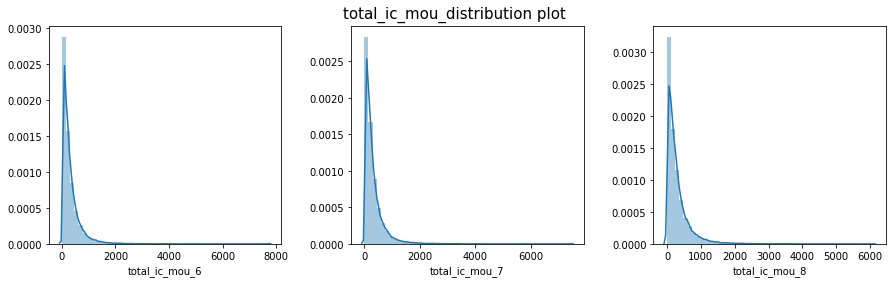

In [84]:
# total incoming calls distribution for first 3 months
distplot_(df_clean,'total_ic_mou')

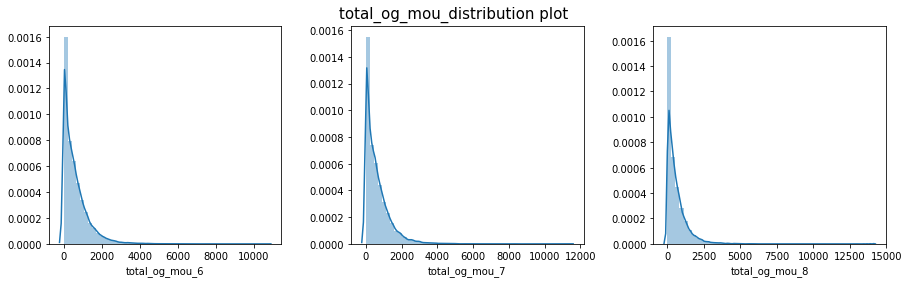

In [85]:
# total outgoing calls distribution for first 3 months
distplot_(df_clean,'total_og_mou')

***Distribution of incoming and out going data are having right skewed.***

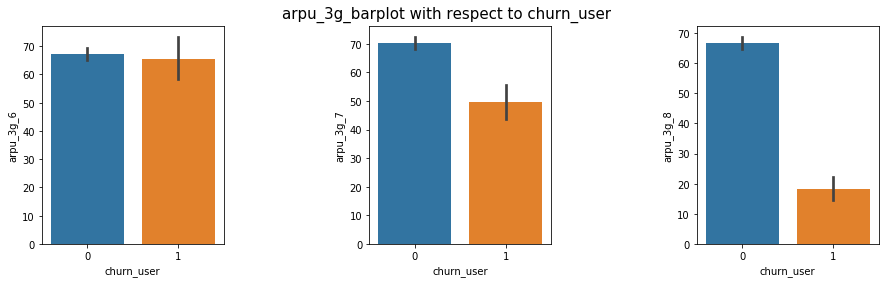

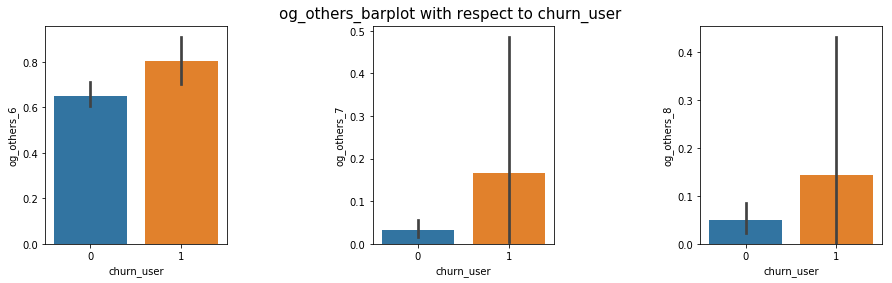

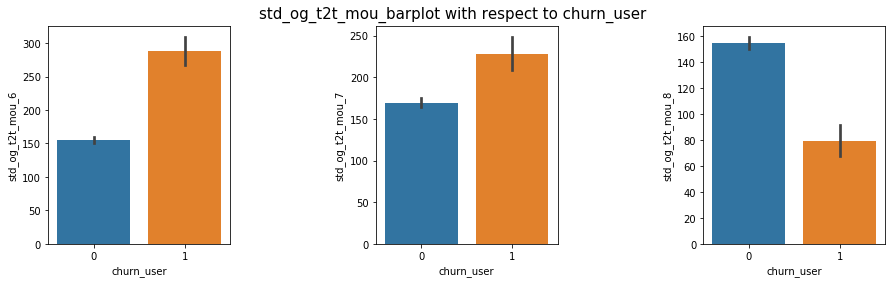

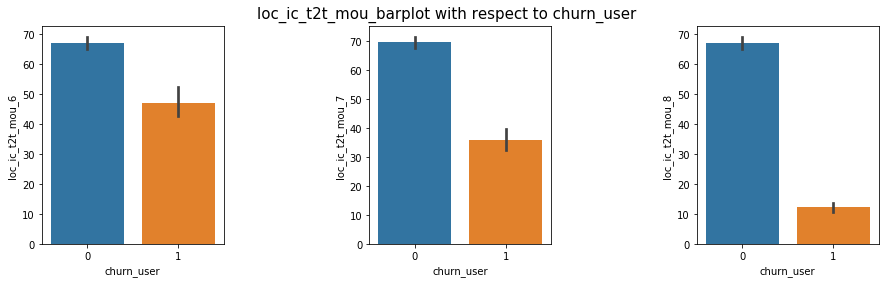

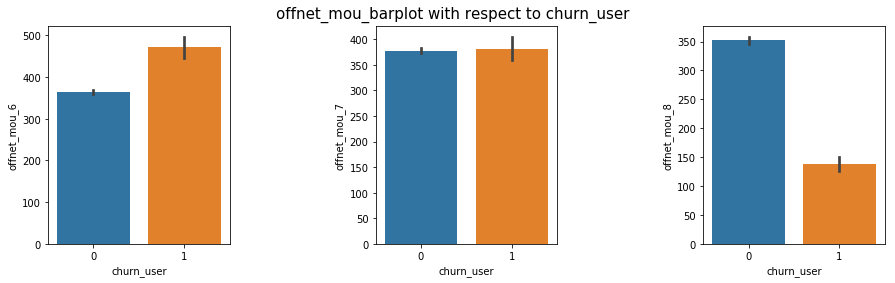

In [86]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[:5]:
    barplot_(df_clean,x)

In [87]:
print('list of columns from early 3 months are seems significant to predict churns:')
list_unique_col_plot[:5]

list of columns from early 3 months are seems significant to predict churns:


['arpu_3g', 'og_others', 'std_og_t2t_mou', 'loc_ic_t2t_mou', 'offnet_mou']

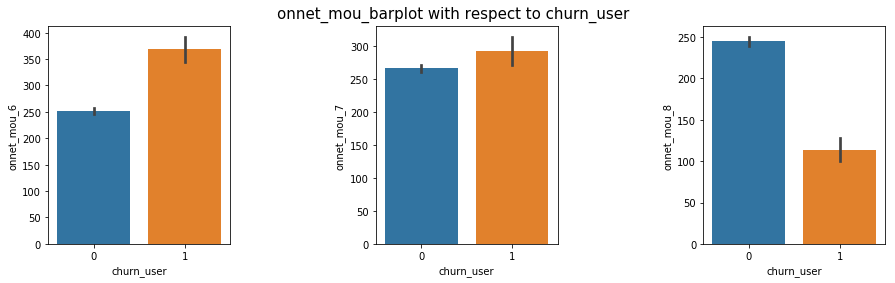

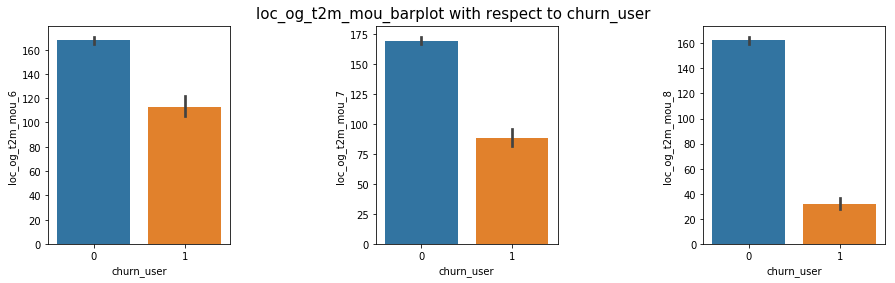

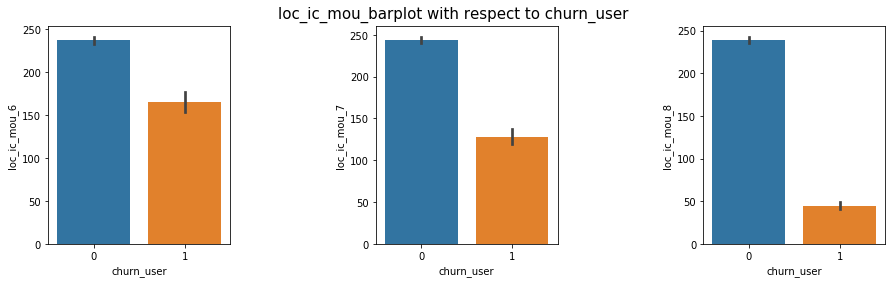

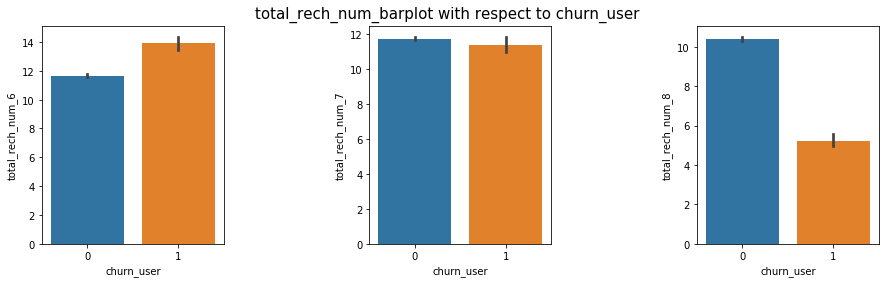

In [88]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[5:9]:
    barplot_(df_clean,x)

In [89]:
print('list of columns from early 3 months are seems significant to predict churns:')
list_unique_col_plot[5:9]

list of columns from early 3 months are seems significant to predict churns:


['onnet_mou', 'loc_og_t2m_mou', 'loc_ic_mou', 'total_rech_num']

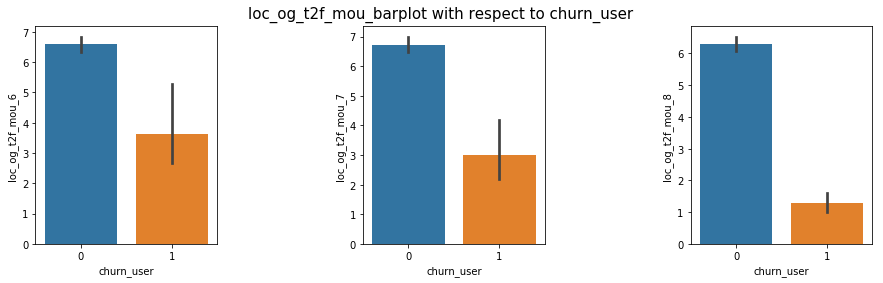

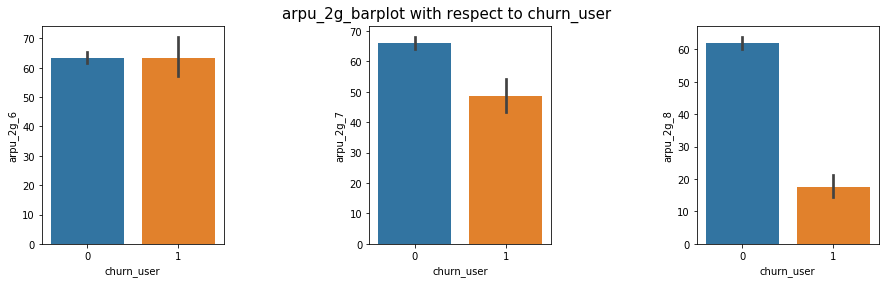

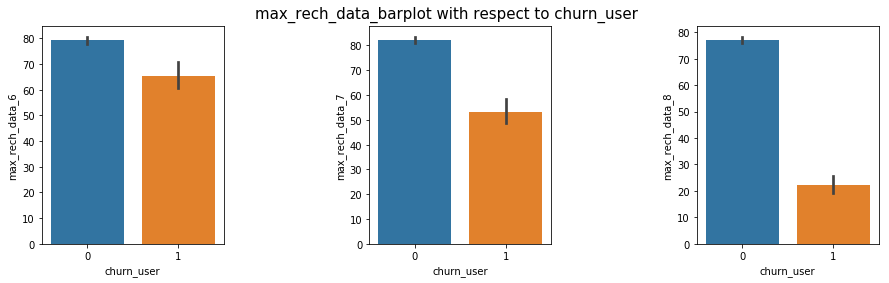

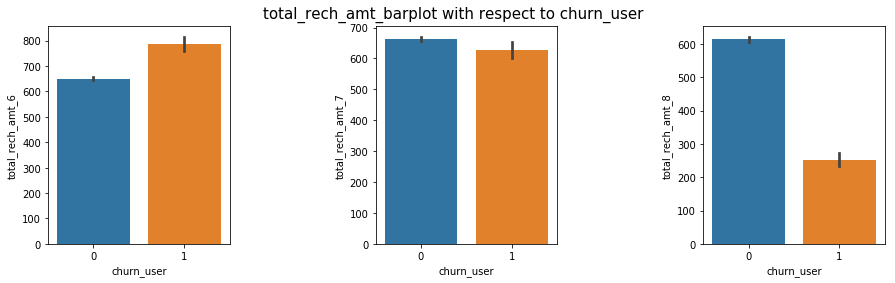

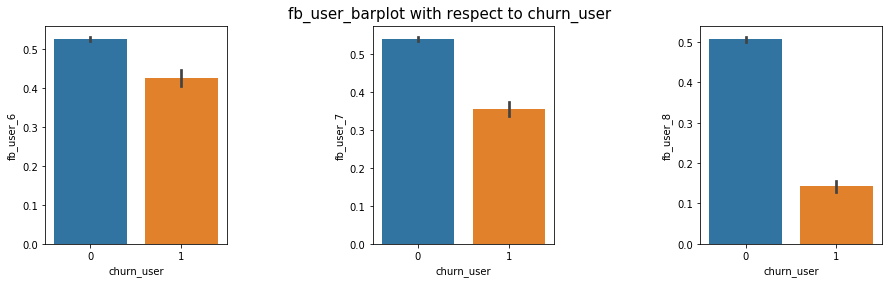

In [90]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[10:15]:
    barplot_(df_clean,x)

In [91]:
print('list of columns from early 3 months are seems significant to predict churns:')
list_unique_col_plot[10:15]

list of columns from early 3 months are seems significant to predict churns:


['loc_og_t2f_mou', 'arpu_2g', 'max_rech_data', 'total_rech_amt', 'fb_user']

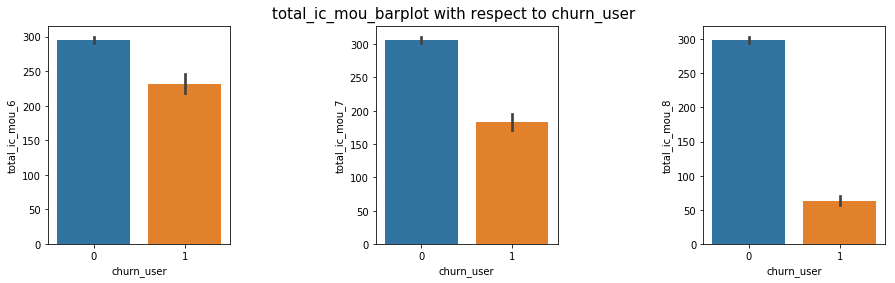

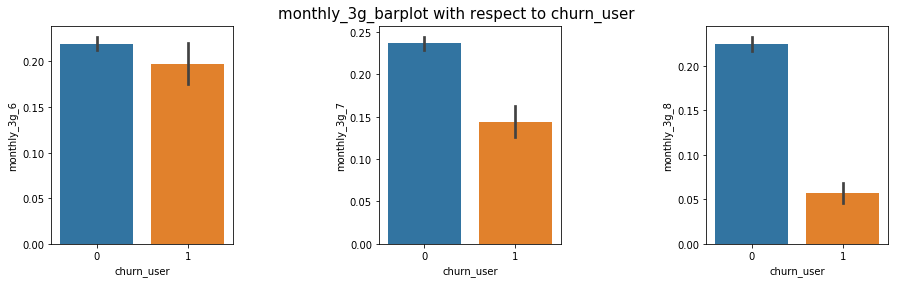

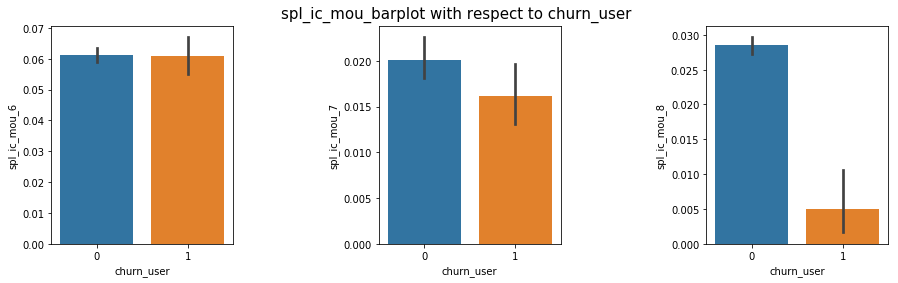

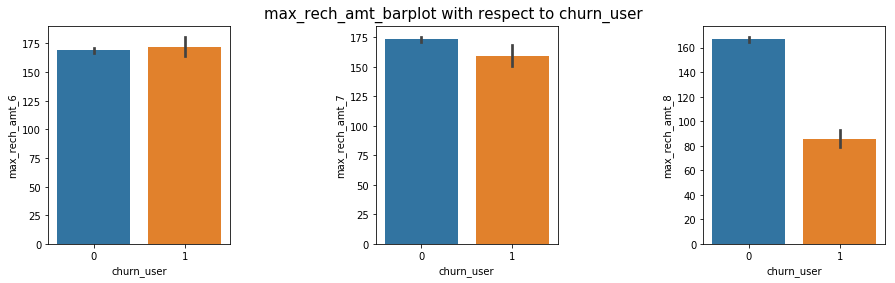

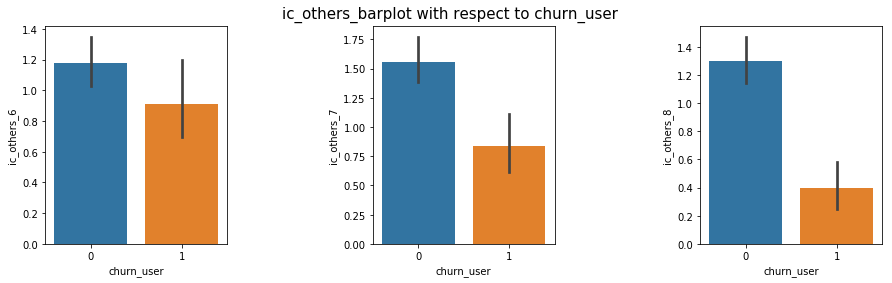

In [92]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[15:20]:
    barplot_(df_clean,x)

In [93]:
print('list of columns from early 3 months are seems significant to predict churns:')
list_unique_col_plot[15:20]

list of columns from early 3 months are seems significant to predict churns:


['total_ic_mou', 'monthly_3g', 'spl_ic_mou', 'max_rech_amt', 'ic_others']

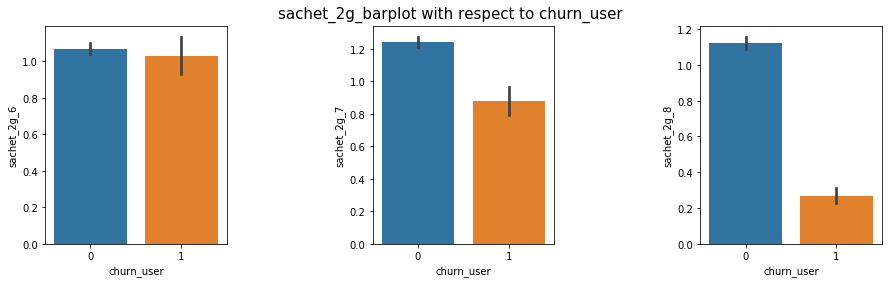

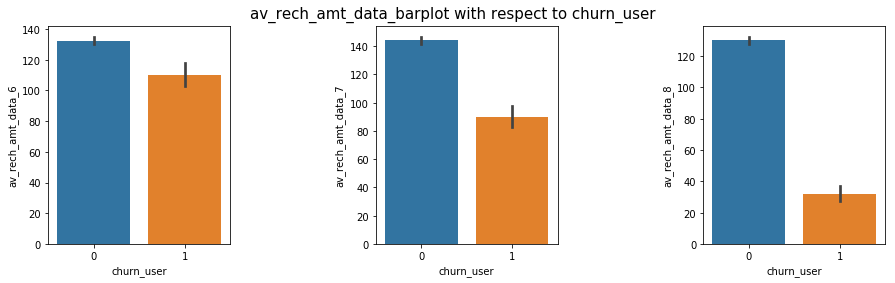

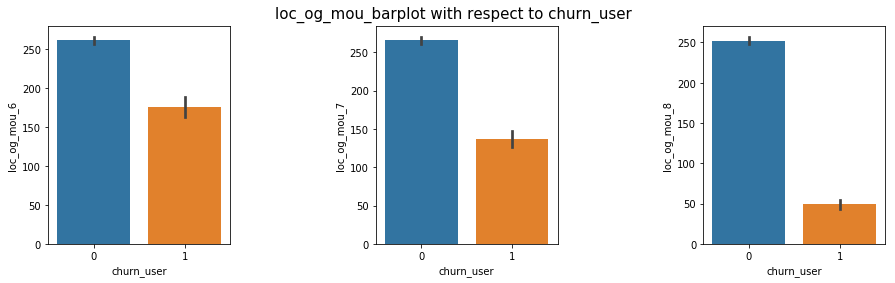

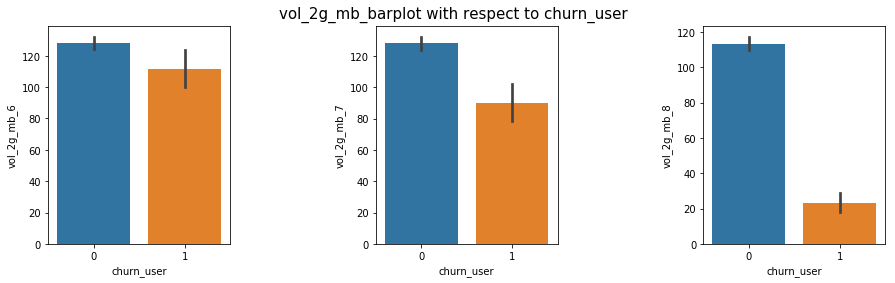

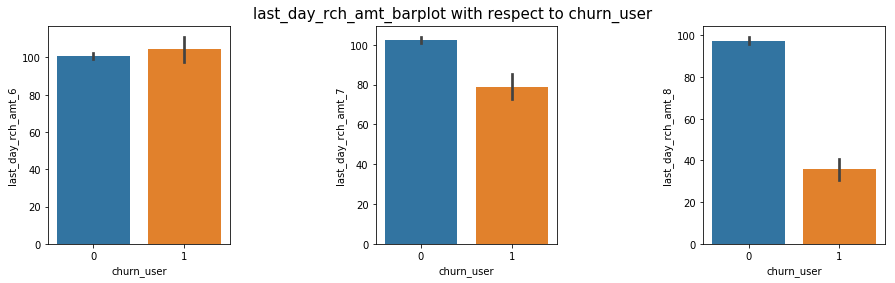

In [94]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[20:25]:
    barplot_(df_clean,x)

In [95]:
print('list of columns from early 3 months are seems significant to predict churns:')
list_unique_col_plot[20:25]

list of columns from early 3 months are seems significant to predict churns:


['sachet_2g',
 'av_rech_amt_data',
 'loc_og_mou',
 'vol_2g_mb',
 'last_day_rch_amt']

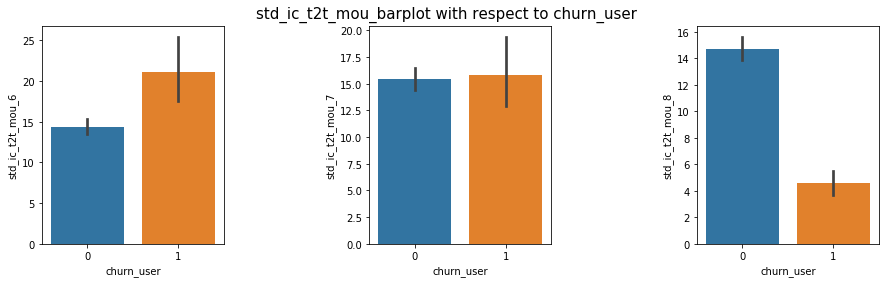

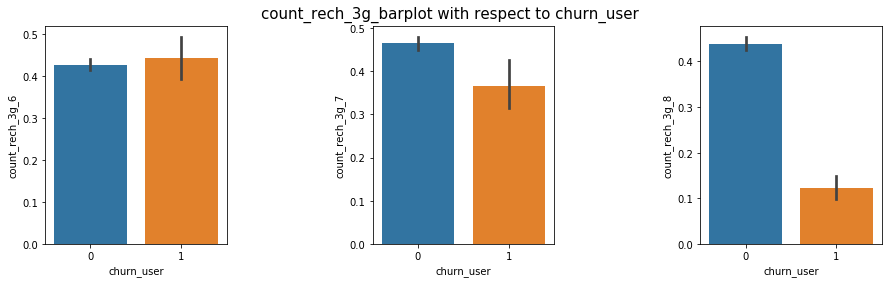

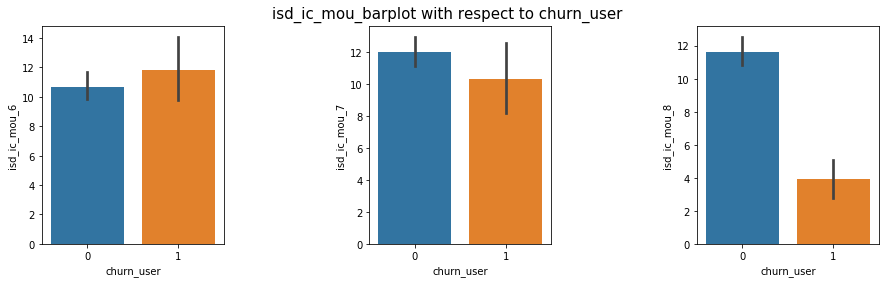

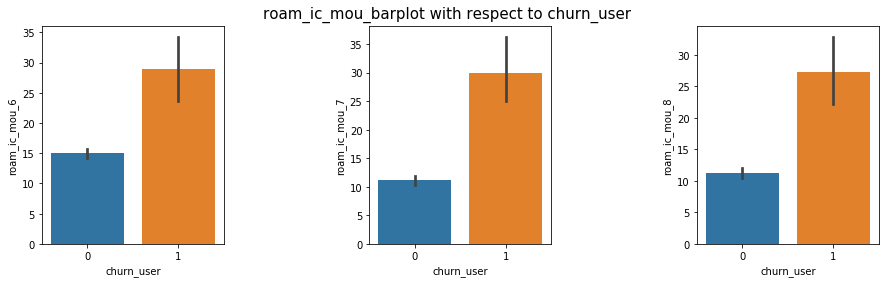

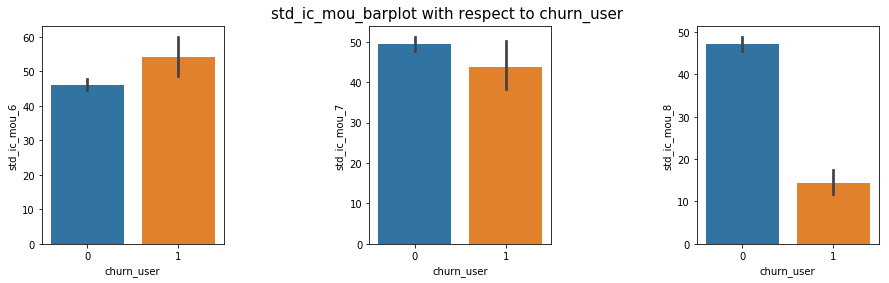

In [96]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[25:30]:
    barplot_(df_clean,x)

In [97]:
print('list of columns from early 3 months are seems significant to predict churns:')
list_unique_col_plot[25:30]

list of columns from early 3 months are seems significant to predict churns:


['std_ic_t2t_mou', 'count_rech_3g', 'isd_ic_mou', 'roam_ic_mou', 'std_ic_mou']

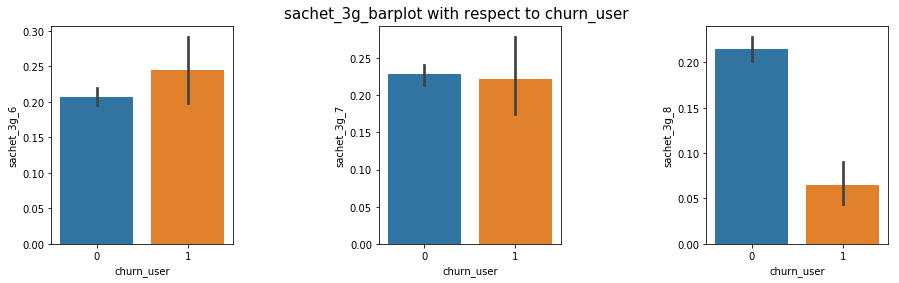

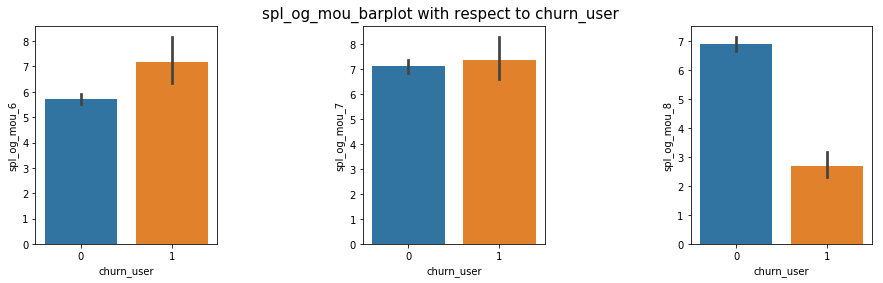

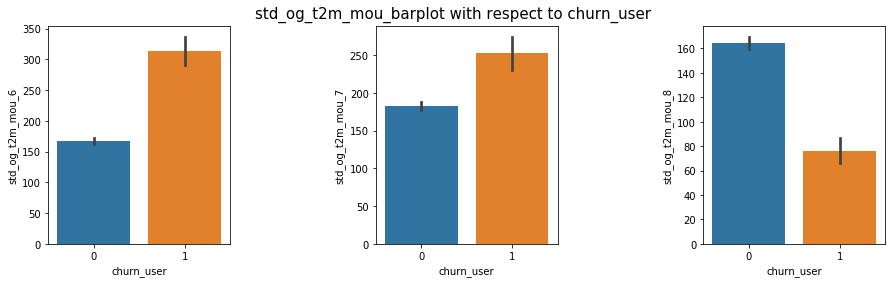

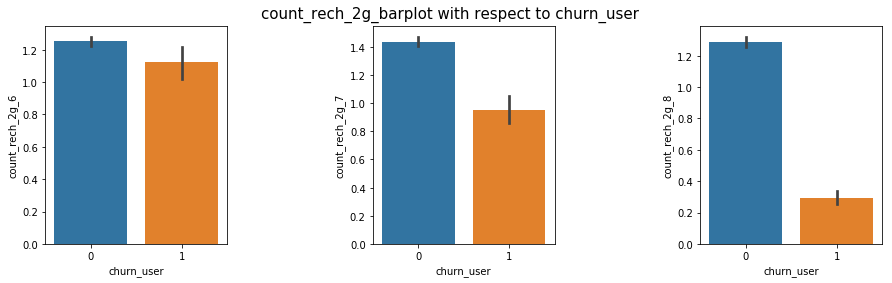

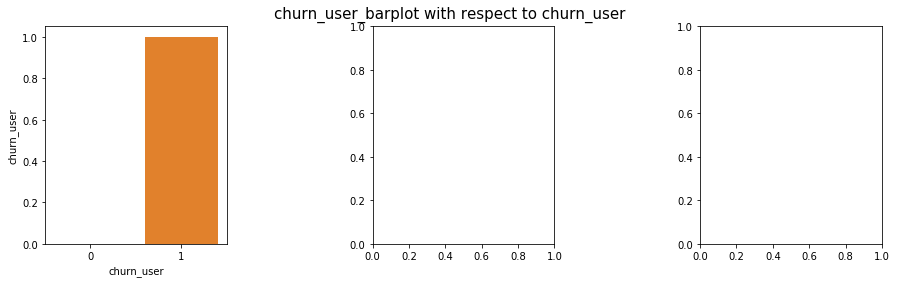

In [98]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[30:35]:
    barplot_(df_clean,x)

In [99]:
print('list of columns from early 3 months are seems significant to predict churns:')
list_unique_col_plot[30:35]

list of columns from early 3 months are seems significant to predict churns:


['sachet_3g', 'spl_og_mou', 'std_og_t2m_mou', 'count_rech_2g', 'churn_user']

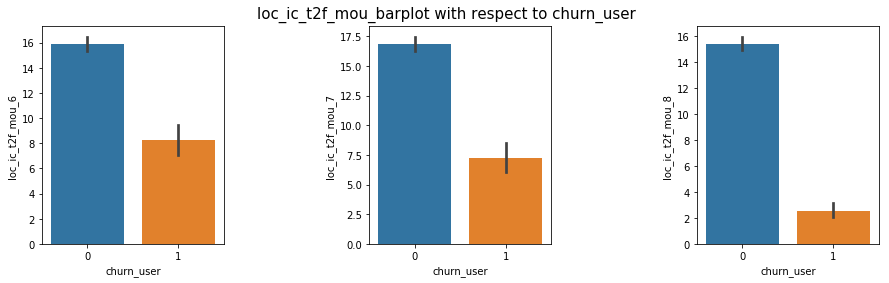

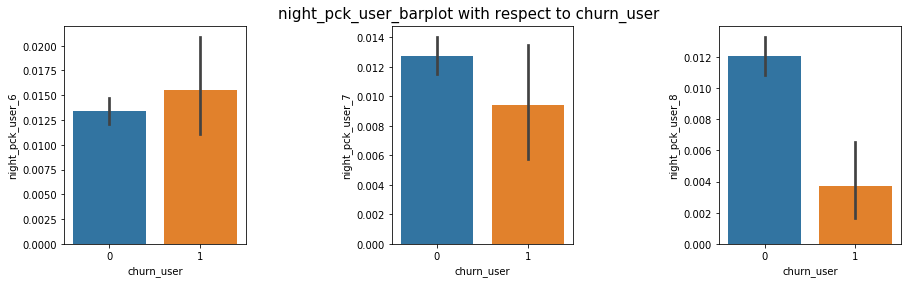

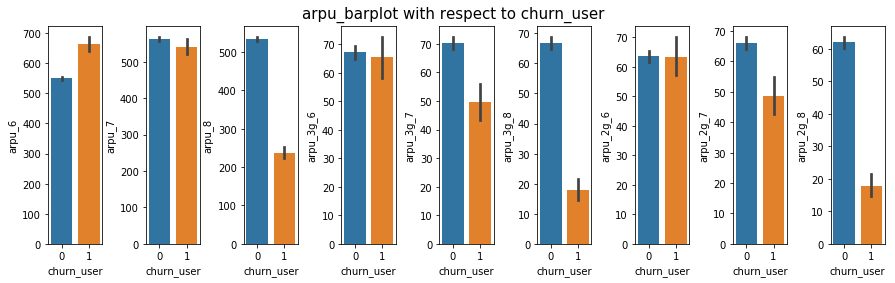

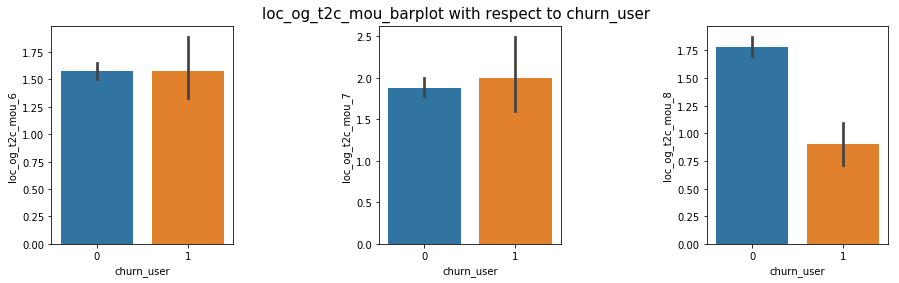

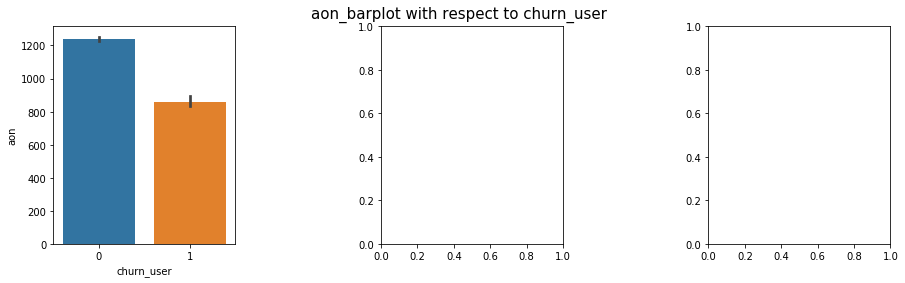

In [100]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[35:40]:
    barplot_(df_clean,x)

In [101]:
print('list of columns from early 3 months are seems significant to predict churns:')
list_unique_col_plot[35:40]

list of columns from early 3 months are seems significant to predict churns:


['loc_ic_t2f_mou', 'night_pck_user', 'arpu', 'loc_og_t2c_mou', 'aon']

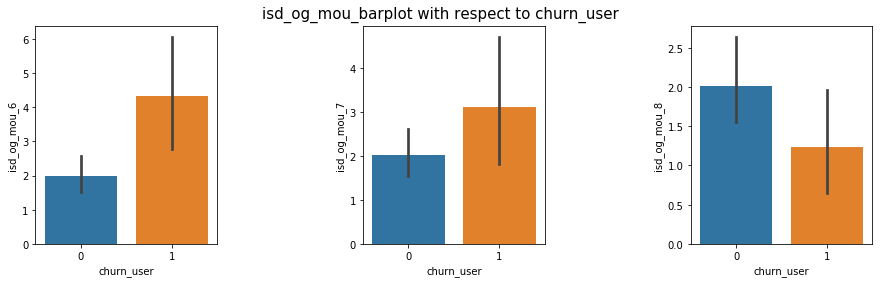

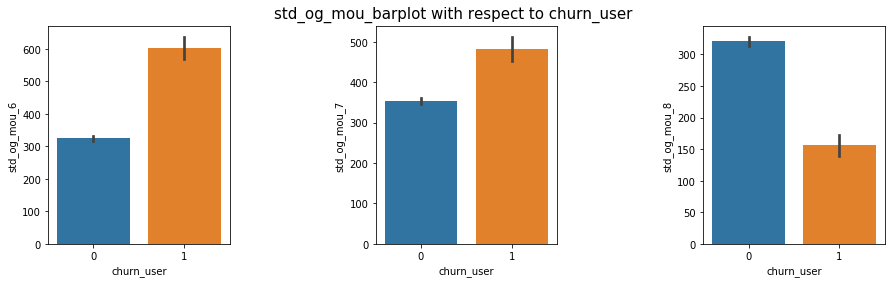

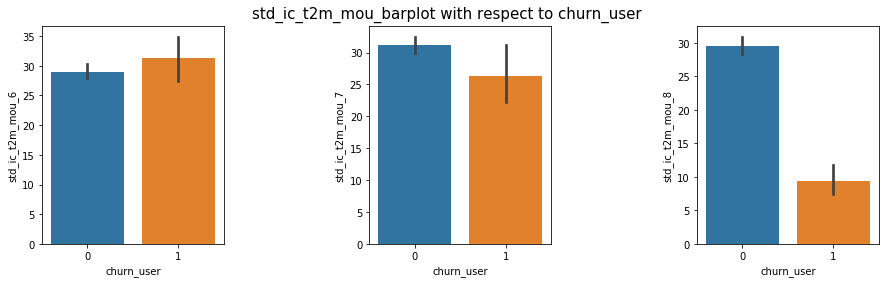

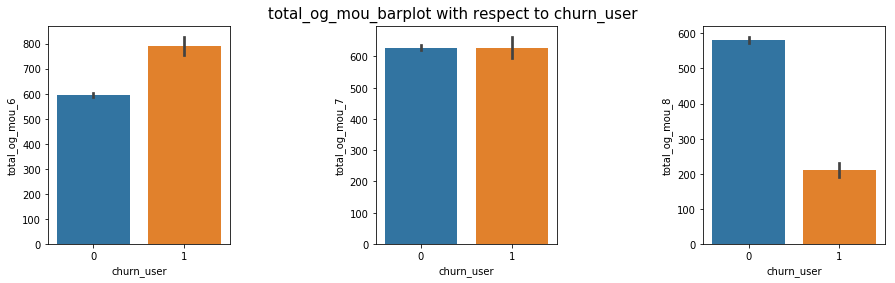

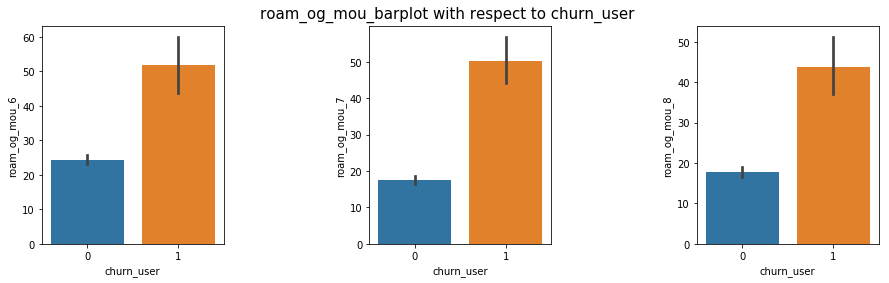

In [102]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[40:45]:
    barplot_(df_clean,x)

In [103]:
print('list of columns from early 3 months are seems significant to predict churns:')
list_unique_col_plot[40:45]

list of columns from early 3 months are seems significant to predict churns:


['isd_og_mou', 'std_og_mou', 'std_ic_t2m_mou', 'total_og_mou', 'roam_og_mou']

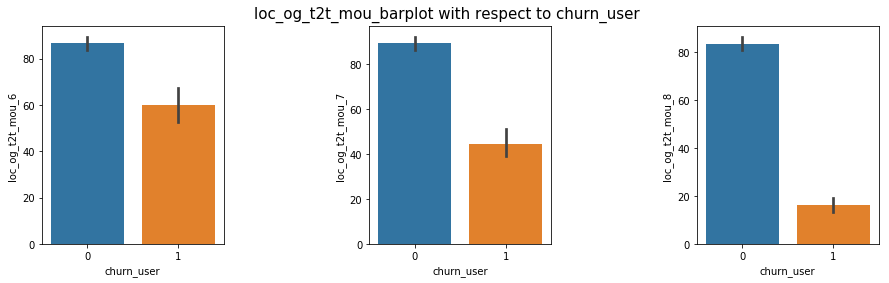

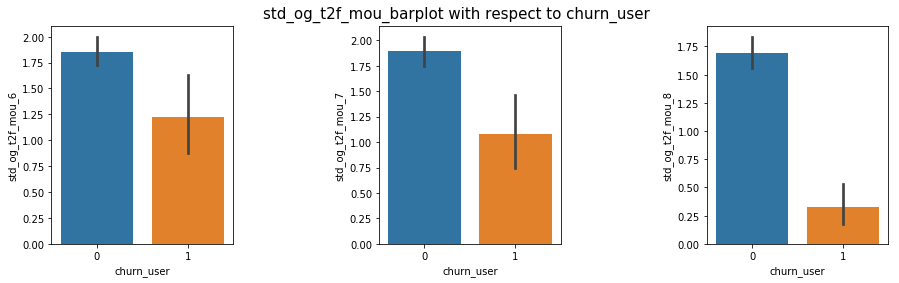

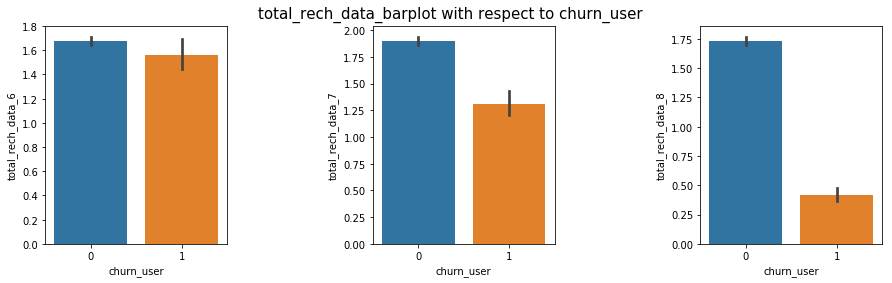

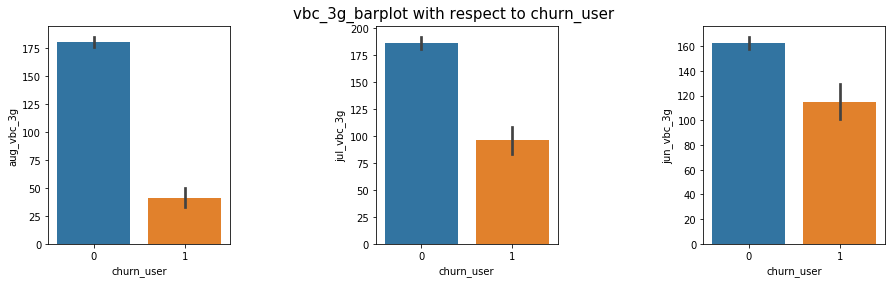

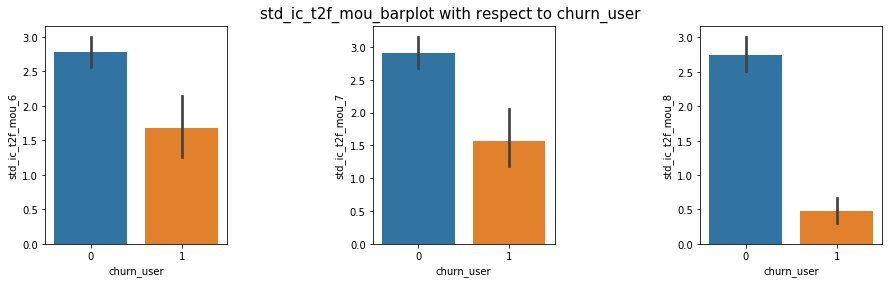

In [104]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[45:50]:
    barplot_(df_clean,x)

***Column: `'roam_ic_mou'` there is no significant effect between good phase ( jun & jul ) and critical phase ( aug )*** 

***Following columns are seems significant to predict churns: `'total_rech_data','total_ic_mou', 'arpu_3g', 'loc_og_mou'`***

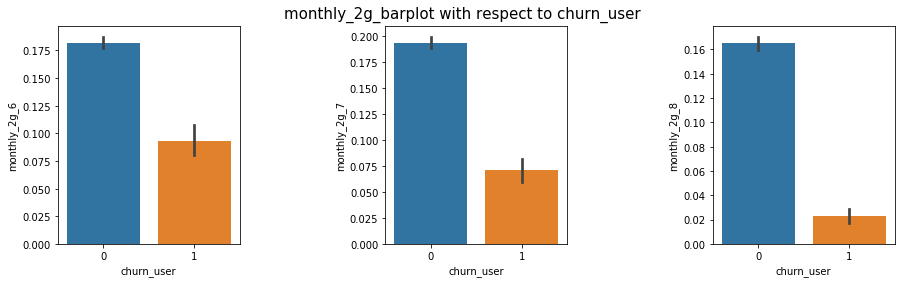

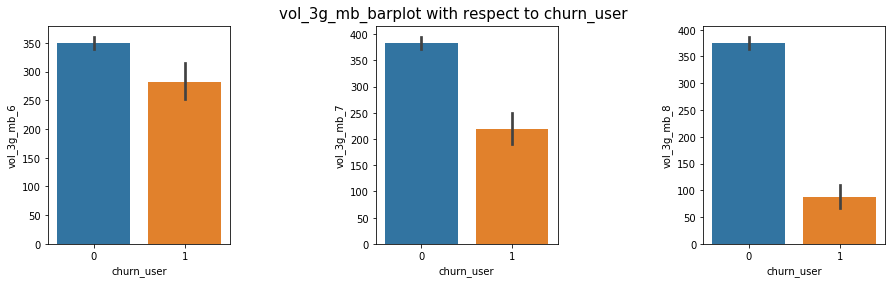

In [105]:
# plot visulizations of all 3 early months features with respect to churn_user
for x in list_unique_col_plot[50:]:
    barplot_(df_clean,x)

***column : `'og_others'` looks from the plots not much significant difference between jul & aug months and also having large standard deviation.***
***column : `'Max_rech_data'` can be considered as significant variable for the modeling.***

In [106]:
# from the above EDA, decided to drop following two columns for all 3 months: 'roam_ic_mou' & 'og_thers'
delete_col_eda = [x for x in list_of_columns_plot if ('roam_ic_mou'in x)or('og_others' in x)]
print(delete_col_eda)

df_clean.drop(columns = delete_col_eda, inplace = True) # drop the columns which are not significant for modeing 

['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'og_others_6', 'og_others_7', 'og_others_8']


### Check the unique values from the dataframe

In [107]:
check_unique_count.loc[((check_unique_count['Unique_count']>1)&(check_unique_count['Unique_count']<5))].index.tolist()

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn_user']

In [108]:
# all columns, having 2 unique values convert the data type as categorical variables
cat_col_lst = check_unique_count.loc[((check_unique_count['Unique_count']>1)&
                                      (check_unique_count['Unique_count']<5))].index.tolist()
print(cat_col_lst)

df_clean[cat_col_lst] = df_clean[cat_col_lst].astype('object') # change data type to object

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn_user']


In [109]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 146 entries, arpu_6 to churn_user
dtypes: float64(114), int64(25), object(7)
memory usage: 34.9+ MB


In [110]:
# separate numerical and categorical columns to drive new columns from numerical columns
df_clean_cat = df_clean.select_dtypes(include = 'object').copy()
df_clean_num = df_clean.drop(columns = cat_col_lst) # remove categorical columns from the df_clean dataset

df_clean_cat.head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 0                0                0         1         1   
7                 0                0                0         0         0   
8                 0                0                0         0         1   
21                0                0                0         0         0   
23                0                0                0         0         1   

   fb_user_8 churn_user  
0          1          1  
7          0          1  
8          1          0  
21         0          0  
23         1          0

In [111]:
df_clean_num.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_og_mou_6  roam_og_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          23.74          12.59   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
21           0.00              4.48              6.16             23.34   
23           0.00             48.96             50.66             33.58   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28             62.13   
8              80.96             70.58             50.54              0.00   
21             91.81             87.93            104.81              0.75   
23             82.94             83.01            148.56              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0               0.00              0.00               0.0               0.0   
7              55.14             53.23               0.0               0.0   
8               0.00              0.00               0.0               0.0   
21              0.00              1.58               0.0               0.0   
23              0.00              0.00               0.0               0.0   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0               0.00          0.00          0.00          0.00   
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
21              0.00         97.04         94.09        129.74   
23             17.71        131.91        133.68        182.14   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
21            808.74            876.99              0.00              0.00   
23              6.35             39.61              0.00              0.00   

    std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0               0.00          0.00          0.00          0.00           0.0   
7              16.68         60.86         75.14         77.84           0.0   
8               0.00        130.26        143.48         98.28           0.0   
21              0.00        763.29        

In [112]:
# create data frame with only columns from jun month
df_clean_jun = df_clean_num[[s for s in df_clean_num.columns if re.search('(?:_6|jun_)',s)]].copy()

# strip '_6' from column names
df_clean_jun.columns = [s.rstrip('_6') for s in df_clean_jun.columns]

# rename the specific column name
df_clean_jun.rename(columns={'jun_vbc_3g':'vbc_3g'}, inplace=True)

df_clean_jun.head()

arpu  onnet_mou  offnet_mou  roam_og_mou  loc_og_t2t_mou  \
0    197.385       0.00        0.00         0.00            0.00   
7   1069.180      57.84      453.43        23.74           51.39   
8    378.721     413.69       94.66         0.00          297.13   
21   514.453     102.41      757.93         0.00            4.48   
23    74.350      48.96       85.41         0.00           48.96   

    loc_og_t2m_mou  loc_og_t2f_mou  loc_og_t2c_mou  loc_og_mou  \
0             0.00            0.00             0.0        0.00   
7           308.63           62.13             0.0      422.16   
8            80.96            0.00             0.0      378.09   
21           91.81            0.75             0.0       97.04   
23           82.94            0.00             0.0      131.91   

    std_og_t2t_mou  std_og_t2m_mou  std_og_t2f_mou  std_og_mou  isd_og_mou  \
0             0.00            0.00            0.00        0.00         0.0   
7             4.30           49.89            6.66       60.86         0.0   
8           116.56           13.69            0.00      130.26         0.0   
21           97.93          665.36            0.00      763.29         0.0   
23            0.00            2.36            0.00        2.36         0.0   

    spl_og_mou  total_og_mou  loc_ic_t2t_mou  loc_ic_t2m_mou  loc_ic_t2f_mou  \
0          0.0          0.00            0.00            0.00            0.00   
7          4.5        487.53           58.14          217.56          152.16   
8          0.0        508.36           23.84           57.58            0.00   
21         0.0        860.34            2.48          118.23            4.61   
23         0.1        134.38           20.71           95.91            0.00   

    loc_ic_mou  std_ic_t2t_mou  std_ic_t2m_mou  std_ic_t2f_mou  std_ic_mou  \
0         0.00            0.00            0.00            0.00        0.00   
7       427.88           36.89           91.44           52.19      180.54   
8        81.43            0.00           22.43            0.00       22.43   
21      125.33           14.06           67.69            0.00       81.76   
23      116.63            0.51            2.43            0.00        2.94   

    total_ic_mou  spl_ic_mou  isd_ic_mou  ic_others  total_rech_num  \
0           0.00        0.00        0.00       0.00               4   
7         626.46        0.21        2.06      15.74               5   
8         103.86        0.00        0.00       0.00              19   
21        207.09        0.00        0.00       0.00              22   
23        119.58        0.00        0.00       0.00               3   

    total_rech_amt  max_rech_amt  last_day_rch_amt  total_rech_data  \
0              362           252               252              1.0   
7             1580          1580                 0              0.0   
8              437            90                50              0.0   
21             600            50                30              0.0   
23               0             0                 0              0.0   

    max_rech_data  count_rech_2g  count_rech_3g  av_rech_amt_data  vol_2g_mb  \
0           252.0            0.0            1.0             252.0      30.13   
7             0.0            0.0            0.0               0.0       0.00   
8             0.0            0.0            0.0               0.0       0.00   
21            0.0            0.0            0.0               0.0       0.00   
23            0.0            0.0            0.0               0.0       0.00   

    vol_3g_mb  arpu_3g  arpu_2g  monthly_2g  sachet_2g  monthly_3g  sachet_3g  \
0       83.57   212.17   212.17           0          0           1          0   
7        0.00     0.00     0.00           0          0           0          0   
8        0.00     0.00     0.00           0          0           0          0   
21       0.00     0.00     0.00           0          0           0          0   
23       0.00     0.00     0.00           0

In [113]:
# create data frame with only columns from jul month
df_clean_jul = df_clean_num[[s for s in df_clean_num.columns if re.search('(?:_7|jul_)',s)]].copy()

# strip '_7' from column names
df_clean_jul.columns = [s.rstrip('_7') for s in df_clean_jul.columns]

# rename the specific column name
df_clean_jul.rename(columns={'jul_vbc_3g':'vbc_3g'}, inplace=True)

df_clean_jul.head()

arpu  onnet_mou  offnet_mou  roam_og_mou  loc_og_t2t_mou  \
0    214.816       0.00        0.00         0.00            0.00   
7   1349.850      54.68      567.16        12.59           31.38   
8    492.223     351.03       80.63         0.00          217.59   
21   597.753     132.11      896.68         0.00            6.16   
23   193.897      50.66       89.36         0.00           50.66   

    loc_og_t2m_mou  loc_og_t2f_mou  loc_og_t2c_mou  loc_og_mou  \
0             0.00            0.00             0.0        0.00   
7           447.38           55.14             0.0      533.91   
8            70.58            0.00             0.0      288.18   
21           87.93            0.00             0.0       94.09   
23           83.01            0.00             0.0      133.68   

    std_og_t2t_mou  std_og_t2m_mou  std_og_t2f_mou  std_og_mou  isd_og_mou  \
0             0.00            0.00            0.00        0.00        0.00   
7            23.29           31.76           20.08       75.14        0.18   
8           133.43           10.04            0.00      143.48        0.00   
21          125.94          808.74            0.00      934.69        0.00   
23            0.00            6.35            0.00        6.35        0.01   

    spl_og_mou  total_og_mou  loc_ic_t2t_mou  loc_ic_t2m_mou  loc_ic_t2f_mou  \
0          0.0          0.00            0.00            0.00            0.00   
7          0.0        609.24           32.26          221.49          101.46   
8          0.0        431.66            9.84           13.98            0.00   
21         0.0       1028.79           10.19           74.63            2.84   
23         0.0        140.04           61.04          113.36            0.00   

    loc_ic_mou  std_ic_t2t_mou  std_ic_t2m_mou  std_ic_t2f_mou  std_ic_mou  \
0         0.00            0.00            0.00            0.00        0.00   
7       355.23           11.83          126.99           34.24      173.08   
8        23.83            0.58            4.08            0.00        4.66   
21       87.68            5.98           38.23            0.00       44.21   
23      174.41            0.00           14.89            0.00       14.89   

    total_ic_mou  spl_ic_mou  isd_ic_mou  ic_others  total_rech_num  \
0           0.00         0.0        0.00       0.00               3   
7         558.04         0.0       14.53      15.19               5   
8          28.49         0.0        0.00       0.00              21   
21        131.89         0.0        0.00       0.00              26   
23        222.89         0.0       28.23       5.35               5   

    total_rech_amt  max_rech_amt  last_day_rch_amt  total_rech_data  \
0              252           252               252              1.0   
7              790           790                 0              0.0   
8              601           154                 0              2.0   
21             680            50                20              0.0   
23             454           179               179              2.0   

    max_rech_data  count_rech_2g  count_rech_3g  av_rech_amt_data  vol_2g_mb  \
0           252.0            0.0            1.0             252.0       1.32   
7             0.0            0.0            0.0               0.0       0.00   
8           154.0            2.0            0.0             177.0     356.00   
21            0.0            0.0            0.0               0.0       0.00   
23          179.0            0.0            2.0             356.0       0.48   

    vol_3g_mb  arpu_3g  arpu_2g  monthly_2g  sachet_2g  monthly_3g  sachet_3g  \
0      150.76   212.17   212.17           0          0           1          0   
7        0.00     0.00     0.00           0          0           0          0   
8      750.95     0.00     0.00           1          1           0          0   
21       0.00     0.00     0.00           0          0           0          0   
23     599.09   306.57   301.78           0

In [114]:
# check both columns having same columns names
df_clean_jun.columns == df_clean_jul.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [115]:
lst_cols = df_clean_jun.columns.tolist() # back up of list of columns 

In [116]:
df_clean_jun.reset_index(inplace = True) # reset index
df_clean_jul.reset_index(inplace = True) # reset index

# average values of jun & jul month 
df_clean_good_ph = pd.concat([df_clean_jun, df_clean_jul]).groupby('index')[lst_cols].mean()
df_clean_good_ph.head()

arpu  onnet_mou  offnet_mou  roam_og_mou  loc_og_t2t_mou  \
index                                                                  
0       206.1005       0.00       0.000        0.000           0.000   
7      1209.5150      56.26     510.295       18.165          41.385   
8       435.4720     382.36      87.645        0.000         257.360   
21      556.1030     117.26     827.305        0.000           5.320   
23      134.1235      49.81      87.385        0.000          49.810   

       loc_og_t2m_mou  loc_og_t2f_mou  loc_og_t2c_mou  loc_og_mou  \
index                                                               
0               0.000           0.000             0.0       0.000   
7             378.005          58.635             0.0     478.035   
8              75.770           0.000             0.0     333.135   
21             89.870           0.375             0.0      95.565   
23             82.975           0.000             0.0     132.795   

       std_og_t2t_mou  std_og_t2m_mou  std_og_t2f_mou  std_og_mou  isd_og_mou  \
index                                                                           
0               0.000           0.000            0.00       0.000       0.000   
7              13.795          40.825           13.37      68.000       0.090   
8             124.995          11.865            0.00     136.870       0.000   
21            111.935         737.050            0.00     848.990       0.000   
23              0.000           4.355            0.00       4.355       0.005   

       spl_og_mou  total_og_mou  loc_ic_t2t_mou  loc_ic_t2m_mou  \
index                                                             
0            0.00         0.000           0.000           0.000   
7            2.25       548.385          45.200         219.525   
8            0.00       470.010          16.840          35.780   
21           0.00       944.565           6.335          96.430   
23           0.05       137.210          40.875         104.635   

       loc_ic_t2f_mou  loc_ic_mou  std_ic_t2t_mou  std_ic_t2m_mou  \
index                                                               
0               0.000       0.000           0.000           0.000   
7             126.810     391.555          24.360         109.215   
8               0.000      52.630           0.290          13.255   
21              3.725     106.505          10.020          52.960   
23              0.000     145.520           0.255           8.660   

       std_ic_t2f_mou  std_ic_mou  total_ic_mou  spl_ic_mou  isd_ic_mou  \
index                                                                     
0               0.000       0.000         0.000       0.000       0.000   
7              43.215     176.810       592.250       0.105       8.295   
8               0.000      13.545        66.175       0.000       0.000   
21              0.000      62.985       169.490       0.000       0.000   
23              0.000       8.915       171.235       0.000      14.115   

       ic_others  total_rech_num  total_rech_amt  max_rech_amt  \
index                                                            
0          0.000             3.5           307.0         252.0   
7         15.465             5.0          1185.0        1185.0   
8          0.000            20.0           519.0         122.0   
21         0.000            24.0           640.0          50.0   
23         2.675             4.0           227.0          89.5   

       last_day_rch_amt  total_rech_data  max_rech_data  count_rech_2g  \
index                                                                    
0                 252.0              1.0          252.0            0.0   
7                   0.0              0.0            0.0            0.0   
8                  25.0              1.0           77.0            1.0   
21                 25.0              0.0            0.0            0.0   
23                 89.5              1.0           89.5            0

In [117]:
# create data frame with only columns from aug month
df_clean_aug = df_clean_num[[s for s in df_clean_num.columns if re.search('(?:_8|aug_)',s)]].copy()

# strip '_8' from column names
df_clean_aug.columns = [s.rstrip('_8') for s in df_clean_aug.columns]

# rename the specific column name
df_clean_aug.rename(columns={'aug_vbc_3g':'vbc_3g'}, inplace=True)

df_clean_aug.head()

arpu  onnet_mou  offnet_mou  roam_og_mou  loc_og_t2t_mou  \
0    213.803       0.00        0.00         0.00            0.00   
7   3171.480      52.29      325.91        38.06           40.28   
8    137.362      35.08      136.48         0.00           12.49   
21   637.760      85.14      983.39         0.00           23.34   
23   366.966      33.58      205.89         0.00           33.58   

    loc_og_t2m_mou  loc_og_t2f_mou  loc_og_t2c_mou  loc_og_mou  \
0             0.00            0.00            0.00        0.00   
7           162.28           53.23            0.00      255.79   
8            50.54            0.00            7.15       63.04   
21          104.81            1.58            0.00      129.74   
23          148.56            0.00           17.71      182.14   

    std_og_t2t_mou  std_og_t2m_mou  std_og_t2f_mou  std_og_mou  isd_og_mou  \
0             0.00            0.00            0.00        0.00        0.00   
7            12.01           49.14           16.68       77.84       10.01   
8            22.58           75.69            0.00       98.28        0.00   
21           61.79          876.99            0.00      938.79        0.00   
23            0.00           39.61            0.00       39.61        0.00   

    spl_og_mou  total_og_mou  loc_ic_t2t_mou  loc_ic_t2m_mou  loc_ic_t2f_mou  \
0         0.00          0.00            0.16            4.13            1.15   
7         6.50        350.16           27.31          121.19           39.53   
8        10.23        171.56            0.31           15.48            0.00   
21        0.00       1068.54           19.54          129.16           10.39   
23       17.71        239.48           76.64          146.84            0.71   

    loc_ic_mou  std_ic_t2t_mou  std_ic_t2m_mou  std_ic_t2f_mou  std_ic_mou  \
0         5.44            0.00            0.00            0.00        0.00   
7       188.04           30.39          141.33           22.21      193.94   
8        15.79            0.10            0.65            0.00        0.75   
21      159.11            0.18          101.74            0.00      101.93   
23      224.21           13.38           43.91            0.00       57.29   

    total_ic_mou  spl_ic_mou  isd_ic_mou  ic_others  total_rech_num  \
0           5.44         0.0        0.00       0.00               2   
7         428.74         0.0       31.59      15.14               7   
8          16.54         0.0        0.00       0.00              14   
21        261.04         0.0        0.00       0.00              27   
23        298.33         0.0        3.74      13.06               4   

    total_rech_amt  max_rech_amt  last_day_rch_amt  total_rech_data  \
0              252           252               252              1.0   
7             3638          1580               779              0.0   
8              120            30                10              3.0   
21             718            50                50              0.0   
23             439           179                 0              2.0   

    max_rech_data  count_rech_2g  count_rech_3g  av_rech_amt_data  vol_2g_mb  \
0           252.0            0.0            1.0             252.0       5.75   
7             0.0            0.0            0.0               0.0       0.00   
8            23.0            3.0            0.0              69.0       0.03   
21            0.0            0.0            0.0               0.0       0.00   
23          179.0            0.0            2.0             270.0       0.01   

    vol_3g_mb  arpu_3g  arpu_2g  monthly_2g  sachet_2g  monthly_3g  sachet_3g  \
0      109.61   212.17   212.17           0          0           1          0   
7        0.00     0.00     0.00           0          0           0          0   
8       11.94    19.83     0.00           0          3           0          0   
21       0.00     0.00     0.00           0          0           0          0   
23    1009.92   197.27   150.67           0

In [118]:
# create new dataframe with new derived features from the difference between good phase & critical phase data 
df_clean_derived = (df_clean_good_ph - df_clean_aug.values)
df_clean_derived.columns = [s+'_Diff' for s in df_clean_derived.columns]
df_clean_derived.head()

arpu_Diff  onnet_mou_Diff  offnet_mou_Diff  roam_og_mou_Diff  \
index                                                                 
0        -7.7025            0.00            0.000             0.000   
7     -1961.9650            3.97          184.385           -19.895   
8       298.1100          347.28          -48.835             0.000   
21      -81.6570           32.12         -156.085             0.000   
23     -232.8425           16.23         -118.505             0.000   

       loc_og_t2t_mou_Diff  loc_og_t2m_mou_Diff  loc_og_t2f_mou_Diff  \
index                                                                  
0                    0.000                0.000                0.000   
7                    1.105              215.725                5.405   
8                  244.870               25.230                0.000   
21                 -18.020              -14.940               -1.205   
23                  16.230              -65.585                0.000   

       loc_og_t2c_mou_Diff  loc_og_mou_Diff  std_og_t2t_mou_Diff  \
index                                                              
0                     0.00            0.000                0.000   
7                     0.00          222.245                1.785   
8                    -7.15          270.095              102.415   
21                    0.00          -34.175               50.145   
23                  -17.71          -49.345                0.000   

       std_og_t2m_mou_Diff  std_og_t2f_mou_Diff  std_og_mou_Diff  \
index                                                              
0                    0.000                 0.00            0.000   
7                   -8.315                -3.31           -9.840   
8                  -63.825                 0.00           38.590   
21                -139.940                 0.00          -89.800   
23                 -35.255                 0.00          -35.255   

       isd_og_mou_Diff  spl_og_mou_Diff  total_og_mou_Diff  \
index                                                        
0                0.000             0.00              0.000   
7               -9.920            -4.25            198.225   
8                0.000           -10.23            298.450   
21               0.000             0.00           -123.975   
23               0.005           -17.66           -102.270   

       loc_ic_t2t_mou_Diff  loc_ic_t2m_mou_Diff  loc_ic_t2f_mou_Diff  \
index                                                                  
0                   -0.160               -4.130               -1.150   
7                   17.890               98.335               87.280   
8                   16.530               20.300                0.000   
21                 -13.205              -32.730               -6.665   
23                 -35.765              -42.205               -0.710   

       loc_ic_mou_Diff  std_ic_t2t_mou_Diff  std_ic_t2m_mou_Diff  \
index                                                              
0               -5.440                0.000                0.000   
7              203.515               -6.030              -32.115   
8               36.840                0.190               12.605   
21             -52.605                9.840              -48.780   
23             -78.690              -13.125              -35.250   

       std_ic_t2f_mou_Diff  std_ic_mou_Diff  total_ic_mou_Diff  \
index                                                            
0                    0.000            0.000             -5.440   
7                   21.005          -17.130            163.510   
8                    0.000           12.795             49.635   
21                   0.000          -38.945            -91.550   
23                   0.000          -48.375           -127.095   

       spl_ic_mou_Diff  isd_ic_mou_Diff  ic_others_Diff  total_rech_num_Diff  \
index                                                                          
0         

In [119]:
df_critical_ph = df_clean_num[[s for s in df_clean_num.columns if re.search('(?:_8|aug_)',s)]].copy()
df_critical_ph.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0    213.803         0.00          0.00           0.00              0.00   
7   3171.480        52.29        325.91          38.06             40.28   
8    137.362        35.08        136.48           0.00             12.49   
21   637.760        85.14        983.39           0.00             23.34   
23   366.966        33.58        205.89           0.00             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
21            104.81              1.58              0.00        129.74   
23            148.56              0.00             17.71        182.14   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7              12.01             49.14             16.68         77.84   
8              22.58             75.69              0.00         98.28   
21             61.79            876.99              0.00        938.79   
23              0.00             39.61              0.00         39.61   

    isd_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0           0.00          0.00            0.00              0.16   
7          10.01          6.50          350.16             27.31   
8           0.00         10.23          171.56              0.31   
21          0.00          0.00         1068.54             19.54   
23          0.00         17.71          239.48             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0               4.13              1.15          5.44              0.00   
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
21            129.16             10.39        159.11              0.18   
23            146.84              0.71        224.21             13.38   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0               0.00              0.00          0.00            5.44   
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
21            101.74              0.00        101.93          261.04   
23             43.91              0.00         57.29          298.33   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            0.0          0.00         0.00                 2   
7            0.0         31.59        15.14                 7   
8            0.0          0.00         0.00                14   
21           0.0          0.00         0.00                27   
23           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0                252             252                 252                1.0   
7               3638            1580                 779                0.0   
8                120              30                  10                3.0   
21               718              50                  50                0.0   
23               439             179                   0                2.0   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0             252.0              0.0              1.0               252.0   
7               0.0              0.0              0.0                 0.0   
8              23.0              3.0              0.0                69.0   
21              0.0              0.0              0.0                 0.0   
23            179.0              0.0              2.0               270.0   

    vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  ar

In [120]:
df_clean_diff = pd.concat([df_critical_ph,df_clean_derived], axis=1)
df_clean_diff.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0    213.803         0.00          0.00           0.00              0.00   
7   3171.480        52.29        325.91          38.06             40.28   
8    137.362        35.08        136.48           0.00             12.49   
21   637.760        85.14        983.39           0.00             23.34   
23   366.966        33.58        205.89           0.00             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
21            104.81              1.58              0.00        129.74   
23            148.56              0.00             17.71        182.14   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7              12.01             49.14             16.68         77.84   
8              22.58             75.69              0.00         98.28   
21             61.79            876.99              0.00        938.79   
23              0.00             39.61              0.00         39.61   

    isd_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0           0.00          0.00            0.00              0.16   
7          10.01          6.50          350.16             27.31   
8           0.00         10.23          171.56              0.31   
21          0.00          0.00         1068.54             19.54   
23          0.00         17.71          239.48             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0               4.13              1.15          5.44              0.00   
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
21            129.16             10.39        159.11              0.18   
23            146.84              0.71        224.21             13.38   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0               0.00              0.00          0.00            5.44   
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
21            101.74              0.00        101.93          261.04   
23             43.91              0.00         57.29          298.33   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            0.0          0.00         0.00                 2   
7            0.0         31.59        15.14                 7   
8            0.0          0.00         0.00                14   
21           0.0          0.00         0.00                27   
23           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0                252             252                 252                1.0   
7               3638            1580                 779                0.0   
8                120              30                  10                3.0   
21               718              50                  50                0.0   
23               439             179                   0                2.0   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0             252.0              0.0              1.0               252.0   
7               0.0              0.0              0.0                 0.0   
8              23.0              3.0              0.0                69.0   
21              0.0              0.0              0.0                 0.0   
23            179.0              0.0              2.0               270.0   

    vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  ar

In [121]:
# add remaining coolumns from categorical and also column 'aon' to final dataframe
df_clean_diff['aon'] = df_clean_num['aon']
df_clean_diff[cat_col_lst] = df_clean_cat[cat_col_lst]

In [122]:
df_clean_diff.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0    213.803         0.00          0.00           0.00              0.00   
7   3171.480        52.29        325.91          38.06             40.28   
8    137.362        35.08        136.48           0.00             12.49   
21   637.760        85.14        983.39           0.00             23.34   
23   366.966        33.58        205.89           0.00             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
21            104.81              1.58              0.00        129.74   
23            148.56              0.00             17.71        182.14   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7              12.01             49.14             16.68         77.84   
8              22.58             75.69              0.00         98.28   
21             61.79            876.99              0.00        938.79   
23              0.00             39.61              0.00         39.61   

    isd_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0           0.00          0.00            0.00              0.16   
7          10.01          6.50          350.16             27.31   
8           0.00         10.23          171.56              0.31   
21          0.00          0.00         1068.54             19.54   
23          0.00         17.71          239.48             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0               4.13              1.15          5.44              0.00   
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
21            129.16             10.39        159.11              0.18   
23            146.84              0.71        224.21             13.38   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0               0.00              0.00          0.00            5.44   
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
21            101.74              0.00        101.93          261.04   
23             43.91              0.00         57.29          298.33   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            0.0          0.00         0.00                 2   
7            0.0         31.59        15.14                 7   
8            0.0          0.00         0.00                14   
21           0.0          0.00         0.00                27   
23           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0                252             252                 252                1.0   
7               3638            1580                 779                0.0   
8                120              30                  10                3.0   
21               718              50                  50                0.0   
23               439             179                   0                2.0   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0             252.0              0.0              1.0               252.0   
7               0.0              0.0              0.0                 0.0   
8              23.0              3.0              0.0                69.0   
21              0.0              0.0              0.0                 0.0   
23            179.0              0.0              2.0               270.0   

    vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  ar

In [123]:
df_clean_diff.shape

(30001, 100)

In [124]:
# derive features from categorical variables: 
# 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'
# for example following derived feature from fb_user. and Similarly for night_pck_user

| <font color ='blue'>fb_user_6</font> | <font color ='blue'>fb_user_7</font> | <font color ='blue'>fb_user_8</font> |<font color ='blue'>derived_fb_user</font> |<font color ='blue'>description</font> |
| --- | --- | --- | --- | --- |
|0|0|0|0|Not a fb_user|
|0|0|1|1|Became a fb_user since from last/latest month| 
|0|1|0|-1|Not a active fb_user in the last/latest month|
|0|1|1|2|Active fb_user since from last/latest two months|
|1|0|0|-2|Not a active fb_user since from last/latest two months|
|1|0|1|1|Active fb_user in the last/latest month|
|1|1|0|-1|Not a active fb_user in the last/latest month|
|1|1|1|3|Active fb_user for all 3 months|

In [125]:
# change cetrogorical columns data type to int64
df_clean_diff[cat_col_lst] = df_clean_diff[cat_col_lst].astype('int64')

In [126]:
# create dictionary as per the above mentioned binary code table
bin_code_dict = dict({'000':0,'001':1,'010':-1,'011':2,'100':-2,'101':1,'110':-1,'111':3})
bin_code_dict

{'000': 0,
 '001': 1,
 '010': -1,
 '011': 2,
 '100': -2,
 '101': 1,
 '110': -1,
 '111': 3}

In [127]:
# list the fb_user_columns
fb_cols_lst = ['fb_user_6', 'fb_user_7', 'fb_user_8']

In [128]:
# concatenate the values from fb_user columns
df_clean_diff['derived_fb_user'] = df_clean_diff[fb_cols_lst].apply(lambda row: ''.join((row.values).astype(str)), axis=1)
df_clean_diff['derived_fb_user'].head()

0     111
7     000
8     011
21    000
23    011
Name: derived_fb_user, dtype: object

In [129]:
# assign the desired values to the binary code using 'bin_code_dict' dictionary
df_clean_diff['derived_fb_user'] = df_clean_diff['derived_fb_user'].apply(lambda X : bin_code_dict[X])
df_clean_diff['derived_fb_user'].head()

0     3
7     0
8     2
21    0
23    2
Name: derived_fb_user, dtype: int64

In [130]:
# list the night_pack_user_columns
ngt_pak_cols_lst = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

In [131]:
# concatenate the values from night_pack_user columns
df_clean_diff['derived_night_pck_user'] = df_clean_diff[ngt_pak_cols_lst].apply(lambda 
                                                                                row: ''.join((row.values).astype(str)), axis=1)
df_clean_diff['derived_night_pck_user'].head(10)

0     000
7     000
8     000
21    000
23    000
33    110
38    000
41    000
48    000
53    000
Name: derived_night_pck_user, dtype: object

In [132]:
# assign the desired values to the binary code using 'bin_code_dict' dictionary
df_clean_diff['derived_night_pck_user'] = df_clean_diff['derived_night_pck_user'].apply(lambda X : bin_code_dict[X])
df_clean_diff['derived_night_pck_user'].head(10)

0     0
7     0
8     0
21    0
23    0
33   -1
38    0
41    0
48    0
53    0
Name: derived_night_pck_user, dtype: int64

In [133]:
# drop the list of columns : 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'
drop_cat_cols_lst = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
df_clean_diff.drop(columns = drop_cat_cols_lst, inplace = True)

In [134]:
# check count of unique values from derived column
df_clean_diff['derived_fb_user'].value_counts()

 0    11265
 3    11242
-1     2992
 1     1583
 2     1488
-2     1431
Name: derived_fb_user, dtype: int64

In [135]:
# check the churn_users count, with respect to 'derived_fb_user' value not equal to 0
df_clean_diff.loc[abs(df_clean_diff['derived_fb_user'])>0]['churn_user'].sum()

# 1243 churn_user are there when fb_user state not equal to 0, which is considerable % of churn_users from the data frame.

1243

In [136]:
# check count of unique values from derived column
df_clean_diff['derived_night_pck_user'].value_counts()

 0    29295
-2      187
-1      178
 1      144
 3      127
 2       70
Name: derived_night_pck_user, dtype: int64

In [137]:
# looks this columns details not much useful for predicting churn_users.
# lets check the number of churn_users with respect to 'derived_night_pck_user' value > 0
df_clean_diff.loc[abs(df_clean_diff['derived_night_pck_user'])>0]['churn_user'].sum()

# only 51 churn_user are there when night_pack_user state not equal to 0, 
# which is about little % of churn_users from the data frame. this columns looks not much useful to consider for modeling.
# so decided to drop this column.

51

In [138]:
# from the above details, decided to drop the columns.
df_clean_diff.drop(columns = 'derived_night_pck_user', inplace = True)

In [139]:
df_clean_diff.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0    213.803         0.00          0.00           0.00              0.00   
7   3171.480        52.29        325.91          38.06             40.28   
8    137.362        35.08        136.48           0.00             12.49   
21   637.760        85.14        983.39           0.00             23.34   
23   366.966        33.58        205.89           0.00             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
21            104.81              1.58              0.00        129.74   
23            148.56              0.00             17.71        182.14   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7              12.01             49.14             16.68         77.84   
8              22.58             75.69              0.00         98.28   
21             61.79            876.99              0.00        938.79   
23              0.00             39.61              0.00         39.61   

    isd_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0           0.00          0.00            0.00              0.16   
7          10.01          6.50          350.16             27.31   
8           0.00         10.23          171.56              0.31   
21          0.00          0.00         1068.54             19.54   
23          0.00         17.71          239.48             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0               4.13              1.15          5.44              0.00   
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
21            129.16             10.39        159.11              0.18   
23            146.84              0.71        224.21             13.38   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0               0.00              0.00          0.00            5.44   
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
21            101.74              0.00        101.93          261.04   
23             43.91              0.00         57.29          298.33   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            0.0          0.00         0.00                 2   
7            0.0         31.59        15.14                 7   
8            0.0          0.00         0.00                14   
21           0.0          0.00         0.00                27   
23           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0                252             252                 252                1.0   
7               3638            1580                 779                0.0   
8                120              30                  10                3.0   
21               718              50                  50                0.0   
23               439             179                   0                2.0   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0             252.0              0.0              1.0               252.0   
7               0.0              0.0              0.0                 0.0   
8              23.0              3.0              0.0                69.0   
21              0.0              0.0              0.0                 0.0   
23            179.0              0.0              2.0               270.0   

    vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  ar

In [140]:
# set the target column at the end
lst = df_clean_diff.columns.tolist()
lst.remove('churn_user')
lst.append('churn_user')
df_cleaned = df_clean_diff[lst].copy()

df_cleaned.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0    213.803         0.00          0.00           0.00              0.00   
7   3171.480        52.29        325.91          38.06             40.28   
8    137.362        35.08        136.48           0.00             12.49   
21   637.760        85.14        983.39           0.00             23.34   
23   366.966        33.58        205.89           0.00             33.58   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
21            104.81              1.58              0.00        129.74   
23            148.56              0.00             17.71        182.14   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7              12.01             49.14             16.68         77.84   
8              22.58             75.69              0.00         98.28   
21             61.79            876.99              0.00        938.79   
23              0.00             39.61              0.00         39.61   

    isd_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0           0.00          0.00            0.00              0.16   
7          10.01          6.50          350.16             27.31   
8           0.00         10.23          171.56              0.31   
21          0.00          0.00         1068.54             19.54   
23          0.00         17.71          239.48             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0               4.13              1.15          5.44              0.00   
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
21            129.16             10.39        159.11              0.18   
23            146.84              0.71        224.21             13.38   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0               0.00              0.00          0.00            5.44   
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
21            101.74              0.00        101.93          261.04   
23             43.91              0.00         57.29          298.33   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0            0.0          0.00         0.00                 2   
7            0.0         31.59        15.14                 7   
8            0.0          0.00         0.00                14   
21           0.0          0.00         0.00                27   
23           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0                252             252                 252                1.0   
7               3638            1580                 779                0.0   
8                120              30                  10                3.0   
21               718              50                  50                0.0   
23               439             179                   0                2.0   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0             252.0              0.0              1.0               252.0   
7               0.0              0.0              0.0                 0.0   
8              23.0              3.0              0.0                69.0   
21              0.0              0.0              0.0                 0.0   
23            179.0              0.0              2.0               270.0   

    vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  ar

In [141]:
# check the dataframe describe ( include 1% and 99% to compare with min and max values of the respective columns)
df_cleaned.describe(percentiles = [0.01,0.99])

arpu_8   onnet_mou_8  offnet_mou_8  roam_og_mou_8  \
count  30001.000000  30001.000000  30001.000000   30001.000000   
mean     508.597957    234.112539    335.077044      19.865615   
std      501.961981    458.448598    482.062509     104.719009   
min     -945.808000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000       0.000000   
50%      427.585000     65.610000    182.790000       0.000000   
99%     1986.622000   2159.110000   2193.130000     427.030000   
max    33543.624000  10752.560000  14007.340000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          78.077112        151.756812          5.886385          1.707746   
std          227.373609        233.660905         19.502281          7.208138   
min            0.000000          0.000000          0.000000          0.000000   
1%             0.000000          0.000000          0.000000          0.000000   
50%           20.730000         67.760000          0.000000          0.000000   
99%          913.330000       1088.310000         82.240000         28.210000   
max        10752.560000       4961.330000        928.490000        351.830000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  30001.000000      30001.000000      30001.000000      30001.000000   
mean     235.728174        148.441175        157.350068          1.584734   
std      363.370172        397.564547        409.100284         10.931804   
min        0.000000          0.000000          0.000000          0.000000   
1%         0.000000          0.000000          0.000000          0.000000   
50%      110.810000          0.630000          9.460000          0.000000   
99%     1662.810000       1912.830000       1893.710000         35.190000   
max    11039.910000       8014.430000      13950.040000        516.910000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  total_og_mou_8  \
count  30001.000000  30001.000000  30001.000000    30001.000000   
mean     307.379315      1.948970      6.557204      551.678812   
std      608.976504     44.712024     20.311857      700.478180   
min        0.000000      0.000000      0.000000        0.000000   
1%         0.000000      0.000000      0.000000        0.000000   
50%       25.480000      0.000000      0.430000      333.540000   
99%     2769.360000     28.690000     70.830000     3219.810000   
max    13980.060000   5681.540000    954.510000    14043.060000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count      30001.000000      30001.000000      30001.000000  30001.000000   
mean          62.619432        146.232731         14.403175    223.264679   
std          158.912293        214.882624         43.305191    308.315153   
min            0.000000          0.000000          0.000000      0.000000   
1%             0.000000          0.000000          0.000000      0.000000   
50%           22.610000         80.040000          1.680000    128.730000   
99%          623.080000        980.160000        184.240000   1454.010000   
max         4003.210000       4643.490000       1588.530000   5388.740000   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count      30001.000000      30001.000000      30001.000000  30001.000000   
mean          13.913705         27.922597          2.561970     44.401653   
std           71.338522        103.341828         19.896938    138.813305   
min            0.000000          0.000000          0.000000      0.000000   
1%             0.000000          0.000000          0.000000      0.000000   
50%            0.110000          3.710000          0.000000      9.290000   
99%          214.580000        355.430000         45.930000    539.410000   
max         4309.290000       5645.860000       1394.890000   5957.140000   

  

In [142]:
df_cleaned.shape

(30001, 95)

***There are outliers in the data set, for example,`'offnet_mou_8'` max values is 14007.34 and 99% values is 2193.13 minutes which is realistic. So decided to perform outliers removal using statistical method*** 

In [143]:
#defined function for filter outliers -- # removing (statistical) outliers
def filter_OutLiers(df,column_name):
    Q1 = df[column_name].quantile(0.02)
    Q3 = df[column_name].quantile(0.98)
    IQR = Q3 - Q1
    df_temp = df.loc[((df[column_name] >= (Q1 - 1.5 * IQR)) & (df[column_name] <= (Q3 + 1.5 * IQR)))]
    return(df_temp)

In [144]:
df_outliers = df_cleaned.copy()

In [145]:
for i in df_outliers.columns:
    df_outliers = filter_OutLiers(df_outliers,i).copy()

In [146]:
df_outliers.shape

(25221, 95)

In [147]:
# check the deleted rows to understand how much churns in the rows
lst_index = df_cleaned.index.tolist()
deleted_rows_list = [x for x in lst_index if x not in df_outliers.index.tolist()]

In [148]:
len(deleted_rows_list) # number of rows dropped

4780

In [149]:
df_deleted_rows = df_cleaned[df_cleaned.index.isin(deleted_rows_list)].copy()
df_deleted_rows.churn_user.value_counts()

0    4372
1     408
Name: churn_user, dtype: int64

***Out of 4372 rows , 408 rows from churn_users. it is about 9% of the total deleted rows.***

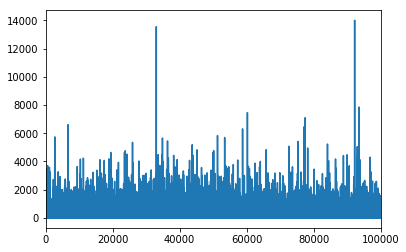

In [150]:
# before outliers plot for 'offnet_mou_8'
df_cleaned['offnet_mou_8'].plot();plt.show()

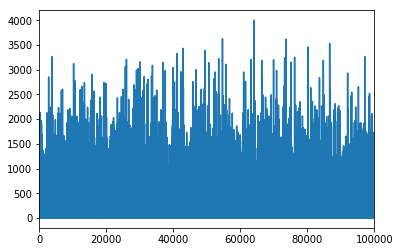

In [151]:
# after outliers plot for 'offnet_mou_8'
df_outliers['offnet_mou_8'].plot();plt.show()

In [152]:
df_outliers.describe(percentiles = [0.01,0.99])

arpu_8   onnet_mou_8  offnet_mou_8  roam_og_mou_8  \
count  25221.000000  25221.000000  25221.000000   25221.000000   
mean     453.199956    212.894035    307.523796      13.911998   
std      330.716607    376.939199    400.732386      55.493747   
min     -345.129000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000       0.000000   
50%      405.230000     61.980000    169.690000       0.000000   
99%     1534.119000   1855.412000   1933.104000     308.406000   
max     3298.630000   3670.710000   4002.260000     627.310000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      25221.000000      25221.000000      25221.000000      25221.000000   
mean          62.410663        142.388313          4.533861          1.377919   
std          121.945768        207.576249         11.961830          4.315177   
min            0.000000          0.000000          0.000000          0.000000   
1%             0.000000          0.000000          0.000000          0.000000   
50%           19.340000         63.610000          0.000000          0.000000   
99%          618.312000        986.744000         63.130000         23.304000   
max         1408.880000       2073.760000        141.430000         46.590000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  25221.000000      25221.000000      25221.000000      25221.000000   
mean     209.340561        144.951316        147.928225          0.668568   
std      280.163039        356.682842        339.436324          3.180854   
min        0.000000          0.000000          0.000000          0.000000   
1%         0.000000          0.000000          0.000000          0.000000   
50%      103.210000          0.500000          8.990000          0.000000   
99%     1315.744000       1777.090000       1721.238000         16.780000   
max     2549.840000       3449.790000       3352.230000         46.080000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  total_og_mou_8  \
count  25221.000000  25221.000000  25221.000000    25221.000000   
mean     293.551334      0.051479      5.284022      508.254193   
std      527.983319      0.451715     10.807981      588.818749   
min        0.000000      0.000000      0.000000        0.000000   
1%         0.000000      0.000000      0.000000        0.000000   
50%       23.090000      0.000000      0.360000      318.380000   
99%     2411.724000      1.708000     53.466000     2668.858000   
max     4504.140000     12.930000    111.240000     4838.890000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count      25221.000000      25221.000000      25221.000000  25221.000000   
mean          50.297251        134.232091         11.301179    195.839766   
std           82.578947        176.253111         26.131430    231.799097   
min            0.000000          0.000000          0.000000      0.000000   
1%             0.000000          0.000000          0.000000      0.000000   
50%           21.490000         76.380000          1.430000    121.780000   
99%          407.664000        845.782000        135.726000   1095.974000   
max          932.960000       1810.010000        299.010000   2227.610000   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count      25221.000000      25221.000000      25221.000000  25221.000000   
mean           8.486253         19.518502          1.263961     29.271906   
std           22.933441         43.220923          4.629647     55.309140   
min            0.000000          0.000000          0.000000      0.000000   
1%             0.000000          0.000000          0.000000      0.000000   
50%            0.030000          3.240000          0.000000      8.150000   
99%          119.840000        220.780000         25.492000    288.724000   
max          297.510000        503.980000         55.230000    561.280000   

  

In [153]:
df_prep = df_outliers.copy() # create new dataframe as prepared dataframe

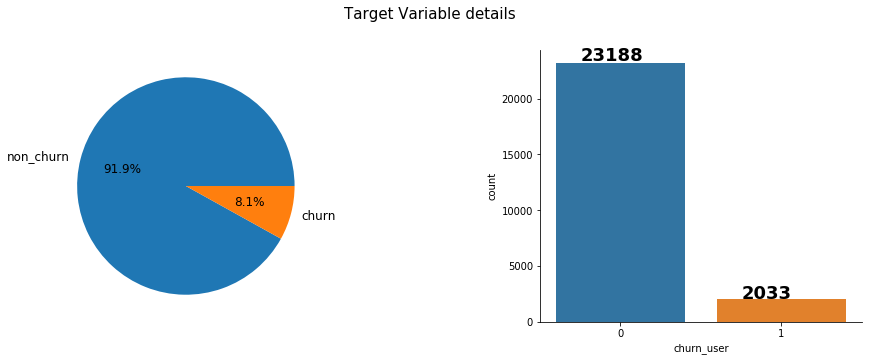

In [154]:
# check data imbalance

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
fig.suptitle('Target Variable details',fontsize=15, y=1.0)
ax = axes[0]
ax.pie(df_prep['churn_user'].value_counts(), labels= ['non_churn', 'churn'], 
       autopct = '%1.1f%%',textprops={'size': 'large'}) 

fig1 = sns.countplot(x = 'churn_user', data = df_prep)
sns.despine(top=True, right=True, left=False, bottom=False)
for p in fig1.patches:
    
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    fig1.annotate('{:.0f}'.format(height), (x+0.15, y + height*1.01),fontsize=18,weight='bold')
fig.subplots_adjust(wspace=0.6)
plt.show()

In [155]:
# need to take care about data imbalance in next steps before proceeding with modeling

In [156]:
# split the data in to train and test data sets

df_train, df_test = train_test_split(df_prep, test_size = 0.3, random_state = 42)

print('df_trian dataframe shape:',df_train.shape)
print('df_test dataframe shape:',df_test.shape)

df_trian dataframe shape: (17654, 95)
df_test dataframe shape: (7567, 95)


In [157]:
columns_list = df_train.columns.tolist()

In [158]:
df_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
29757  352.220       546.88        164.73           0.00             48.36   
87438  447.106       299.03        366.44          31.31             67.53   
88964  496.498       822.88         62.81           0.00             13.14   
42032  559.080         0.00          0.00           0.00              0.00   
9495   134.840        42.58        120.86           0.00             42.58   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
29757            102.13              9.44             16.45        159.94   
87438             23.44              0.00              0.00         90.98   
88964             24.21              0.00              0.40         37.36   
42032              0.00              0.00              0.00          0.00   
9495             119.93              0.61              0.00        163.13   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
29757            498.51              8.99              0.00        507.51   
87438            214.46            328.71              0.00        543.18   
88964            809.73             38.19              0.00        847.93   
42032              0.00              0.00              0.00          0.00   
9495               0.00              0.00              0.31          0.31   

       isd_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  \
29757           0.0         44.14          711.61             50.99   
87438           0.0          3.44          637.61             34.11   
88964           0.0          1.21          886.51             15.84   
42032           0.0          0.00            0.00              1.89   
9495            0.0          0.00          163.44             10.18   

       loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
29757             69.04             21.54        141.59              0.01   
87438             40.66              0.75         75.53             11.39   
88964              0.53              0.00         16.38             11.38   
42032              2.48              0.00          4.38              0.00   
9495             127.98              0.76        138.93              0.00   

       std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
29757              0.00               0.0          0.01          141.61   
87438              0.66               0.0         12.06           87.59   
88964             31.54               0.0         42.93           59.38   
42032              0.00               0.0          0.00            4.38   
9495               0.00               0.0          0.00          138.93   

       spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
29757           0.0           0.0         0.00                11   
87438           0.0           0.0         0.00                 9   
88964           0.0           0.0         0.06                18   
42032           0.0           0.0         0.00                 4   
9495            0.0           0.0         0.00                 1   

       total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
29757               390             130                   0   
87438               666             130                 100   
88964               596              50                  50   
42032               708             252                 252   
9495                  0               0                   0   

       total_rech_data_8  max_rech_data_8  count_rech_2g_8  count_rech_3g_8  \
29757                7.0            154.0              7.0              0.0   
87438                0.0              0.0              0.0              0.0   
88964                0.0              0.0              0.0              0.0   
42032                3.0            252.0              1.0              2.0   
9495                 0.0              0.0              0.0              0.0   

       av

In [159]:
df_train.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_og_mou_8  \
count  17654.000000  17654.000000  17654.000000   17654.000000   
mean     454.264994    215.245370    308.107142      13.943641   
std      329.704485    378.685831    398.362682      55.770466   
min     -345.129000      0.000000      0.000000       0.000000   
25%      218.804750      9.840000     42.057500       0.000000   
50%      406.317500     63.395000    172.085000       0.000000   
75%      614.969250    232.337500    418.592500       0.000000   
max     3298.630000   3670.710000   4002.260000     623.990000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      17654.000000      17654.000000      17654.000000      17654.000000   
mean          62.969985        142.598857          4.498017          1.361612   
std          122.531363        207.012389         11.808122          4.291830   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.400000         12.410000          0.000000          0.000000   
50%           19.785000         64.190000          0.000000          0.000000   
75%           68.355000        189.150000          3.280000          0.000000   
max         1408.880000       2073.760000        139.990000         46.590000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  17654.000000      17654.000000      17654.000000      17654.000000   
mean     210.074583        146.779926        148.321322          0.664939   
std      280.180864        358.265501        336.700491          3.178910   
min        0.000000          0.000000          0.000000          0.000000   
25%       20.850000          0.000000          0.000000          0.000000   
50%      104.820000          0.560000          9.445000          0.000000   
75%      291.147500         84.150000        119.230000          0.000000   
max     2549.840000       3449.790000       3352.230000         46.080000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  total_og_mou_8  \
count  17654.000000  17654.000000  17654.000000    17654.000000   
mean     295.769425      0.050376      5.237031      511.159005   
std      527.694751      0.436982     10.774150      589.323804   
min        0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000       65.195000   
50%       23.845000      0.000000      0.360000      320.995000   
75%      378.927500      0.000000      5.760000      753.750000   
max     4504.140000     12.930000    111.240000     4823.460000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count      17654.000000      17654.000000      17654.000000  17654.000000   
mean          50.355728        134.311273         11.208061    195.884340   
std           81.793568        175.760350         25.498781    230.625027   
min            0.000000          0.000000          0.000000      0.000000   
25%            4.765000         23.445000          0.000000     38.710000   
50%           21.740000         76.880000          1.460000    122.370000   
75%           61.752500        176.317500          9.960000    266.770000   
max          932.640000       1803.410000        299.010000   2227.610000   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count      17654.000000      17654.000000      17654.000000  17654.000000   
mean           8.530821         19.428634          1.255034     29.217692   
std           22.610819         42.840863          4.583000     54.667561   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.360000   
50%            0.030000          3.310000          0.000000      8.280000   
75%            6.287500         19.280000          0.000000     33.260000   
max          297.510000        495.110000         55.230000    547.590000   

  

In [160]:
# make sure all variable are in folat data type
df_train = df_train.astype('float64') 
df_test = df_test.astype('float64')

In [161]:
# create new list of columns for scaling, columns which are having max values more than 1 considered for scaling
Cols_scaling = df_train.columns[(df_train.max()>1.0)].tolist()
print(Cols_scaling)

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aug_vbc_3g', 'arpu_Diff', 'onnet_mou_Diff', 'offnet_mou_Diff', 'roam_og_mou_Diff', 'loc_og_t2t_mou_Diff', 'loc_og_t2m_mou_Diff', 'loc_og_t2f_mou_Diff', 'loc_og_t2c_mou_Diff', 'loc_og_mou_Diff', 'std_og_t

### Applying scalling

In [162]:
scaler = StandardScaler()

In [163]:
# apply StandardScaler on train & test dataset
df_train[Cols_scaling] = scaler.fit_transform(df_train[Cols_scaling]) # fit_transform on X_trian
df_test[Cols_scaling] = scaler.transform(df_test[Cols_scaling]) # transform on X_test

In [164]:
df_train.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_og_mou_8  \
count  1.765400e+04  1.765400e+04  1.765400e+04   1.765400e+04   
mean   9.731903e-17 -1.034349e-16  1.877518e-17   1.505165e-15   
std    1.000028e+00  1.000028e+00  1.000028e+00   1.000028e+00   
min   -2.424646e+00 -5.684170e-01 -7.734557e-01  -2.500255e-01   
25%   -7.141756e-01 -5.424317e-01 -6.678768e-01  -2.500255e-01   
50%   -1.454298e-01 -4.010044e-01 -3.414627e-01  -2.500255e-01   
75%    4.874329e-01  4.513666e-02  2.773565e-01  -2.500255e-01   
max    8.627258e+00  9.125143e+00  9.273603e+00   1.093883e+01   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      1.765400e+04      1.765400e+04      1.765400e+04      1.765400e+04   
mean      -3.980961e-17     -4.122302e-16      1.110833e-15      1.030607e-16   
std        1.000028e+00      1.000028e+00      1.000028e+00      1.000028e+00   
min       -5.139237e-01     -6.888617e-01     -3.809365e-01     -3.172658e-01   
25%       -4.943363e-01     -6.289119e-01     -3.809365e-01     -3.172658e-01   
50%       -3.524502e-01     -3.787748e-01     -3.809365e-01     -3.172658e-01   
75%        4.394930e-02      2.248777e-01     -1.031537e-01     -3.172658e-01   
max        1.098452e+01      9.328987e+00      1.147480e+01      1.053855e+01   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  1.765400e+04      1.765400e+04      1.765400e+04      1.765400e+04   
mean   2.028261e-16     -2.831591e-16     -3.441352e-16     -3.986464e-17   
std    1.000028e+00      1.000028e+00      1.000028e+00      1.000028e+00   
min   -7.498033e-01     -4.097076e-01     -4.405266e-01     -2.091780e-01   
25%   -6.753850e-01     -4.097076e-01     -4.405266e-01     -2.091780e-01   
50%   -3.756772e-01     -4.081444e-01     -4.124742e-01     -2.091780e-01   
75%    2.893674e-01     -1.748192e-01     -8.640363e-02     -2.091780e-01   
max    8.351147e+00      9.219709e+00      9.515874e+00      1.428677e+01   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  total_og_mou_8  \
count  1.765400e+04  1.765400e+04  1.765400e+04    1.765400e+04   
mean   4.131735e-18  1.355042e-15  2.938217e-16    6.206427e-17   
std    1.000028e+00  1.000028e+00  1.000028e+00    1.000028e+00   
min   -5.605093e-01 -1.152853e-01 -4.860874e-01   -8.673898e-01   
25%   -5.605093e-01 -1.152853e-01 -4.860874e-01   -7.567599e-01   
50%   -5.153209e-01 -1.152853e-01 -4.526732e-01   -3.226908e-01   
75%    1.575919e-01 -1.152853e-01  4.854064e-02    4.116546e-01   
max    7.975235e+00  2.947490e+01  9.838917e+00    7.317578e+00   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count      1.765400e+04      1.765400e+04      1.765400e+04  1.765400e+04   
mean       1.945594e-16     -1.267388e-16      6.388939e-16  8.668193e-17   
std        1.000028e+00      1.000028e+00      1.000028e+00  1.000028e+00   
min       -6.156615e-01     -7.641944e-01     -4.395653e-01 -8.493869e-01   
25%       -5.574035e-01     -6.307988e-01     -4.395653e-01 -6.815340e-01   
50%       -3.498629e-01     -3.267682e-01     -3.823060e-01 -3.187704e-01   
75%        1.393397e-01      2.390039e-01     -4.894730e-02  3.073720e-01   
max        1.078702e+01      9.496715e+00      1.128721e+01  8.809899e+00   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count      1.765400e+04      1.765400e+04      1.765400e+04  1.765400e+04   
mean      -9.298605e-17      3.927349e-18      4.611004e-16  2.705752e-17   
std        1.000028e+00      1.000028e+00      1.000028e+00  1.000028e+00   
min       -3.773000e-01     -4.535199e-01     -2.738533e-01 -5.344764e-01   
25%       -3.773000e-01     -4.535199e-01     -2.738533e-01 -5.278909e-01   
50%       -3.759732e-01     -3.762550e-01     -2.738533e-01 -3.830111e-01   
75%       -9.921732e-02     -3.469550e-03     -2.738533e-01  7.394555e-02   
max        1.278093e+01      1.110376e+01      1.177755e+01  9.482534e+00   

  

In [165]:
df_test.describe()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  \
count  7567.000000  7567.000000   7567.000000    7567.000000   
mean     -0.010767    -0.020696     -0.004881      -0.001891   
std       1.010250     0.984484      1.019779       0.983457   
min      -1.508773    -0.568417     -0.773456      -0.250025   
25%      -0.729764    -0.546736     -0.673983      -0.250025   
50%      -0.158762    -0.411713     -0.360780      -0.250025   
75%       0.493237     0.022591      0.260581      -0.250025   
max       7.362526     8.559619      8.335914      10.998361   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count       7567.000000       7567.000000       7567.000000       7567.000000   
mean          -0.015215         -0.003390          0.010118          0.012664   
std            0.983992          1.009141          1.042817          1.018058   
min           -0.513924         -0.688862         -0.380937         -0.317266   
25%           -0.497519         -0.635820         -0.380937         -0.317266   
50%           -0.363019         -0.390127         -0.380937         -0.317266   
75%            0.021873          0.222921         -0.111623         -0.317266   
max           10.943712          9.247009         11.596752         10.477969   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count   7567.000000       7567.000000       7567.000000       7567.000000   
mean      -0.008732         -0.017012         -0.003891          0.003804   
std        0.999856          0.985190          1.026923          1.002126   
min       -0.749803         -0.409708         -0.440527         -0.209178   
25%       -0.681274         -0.409708         -0.440527         -0.209178   
50%       -0.395094         -0.408731         -0.416944         -0.209178   
75%        0.281792         -0.196857         -0.108442         -0.209178   
max        7.339808          8.946273          9.426267         14.255308   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  total_og_mou_8  \
count   7567.000000   7567.000000   7567.000000     7567.000000   
mean      -0.014010      0.008412      0.014537       -0.016429   
std        1.001847      1.108477      1.010449        0.997140   
min       -0.560509     -0.115285     -0.486087       -0.867390   
25%       -0.560509     -0.115285     -0.486087       -0.764668   
50%       -0.520542     -0.115285     -0.448960       -0.344012   
75%        0.091818     -0.115285      0.059679        0.378005   
max        7.888099     28.376420      9.554896        7.343762   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count       7567.000000       7567.000000       7567.000000   7567.000000   
mean          -0.002383         -0.001502          0.012172     -0.000644   
std            1.031750          1.009408          1.080534      1.016964   
min           -0.615662         -0.764194         -0.439565     -0.849387   
25%           -0.562600         -0.636289         -0.439565     -0.682314   
50%           -0.360378         -0.339855         -0.386228     -0.329221   
75%            0.120970          0.226984         -0.049732      0.303426   
max           10.790937          9.534267         11.273483      8.297494   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count       7567.000000       7567.000000       7567.000000   7567.000000   
mean          -0.006570          0.006992          0.006493      0.003305   
std            1.046884          1.029351          1.033616      1.038694   
min           -0.377300         -0.453520         -0.273853     -0.534476   
25%           -0.377300         -0.453520         -0.273853     -0.531549   
50%           -0.376858         -0.380924         -0.273853     -0.390694   
75%           -0.117240         -0.022377         -0.273853      0.046506   
max           12.664614         11.310815         11.500427      9.732963   

       total_ic_mou

In [166]:
# split df_train to X_train and y_trian
X_train = df_train.drop(columns = 'churn_user')
y_train = df_train['churn_user']

print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

X_train shape: (17654, 94)
y_train shape: (17654,)


In [167]:
# split df_test to X_test and y_test
X_test = df_test.drop(columns = 'churn_user')
y_test = df_test['churn_user']

print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_test shape: (7567, 94)
y_test shape: (7567,)


### Handling class imbalance using  SMOTE algorithm

In [168]:
print("Before OverSampling, counts of churn_users '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of churn_users '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of churn_users '1': 1403
Before OverSampling, counts of churn_users '0': 16251 



In [169]:
smote = SMOTE(random_state = 42) # create smote object

In [170]:
X_train_res, y_train_res = smote.fit_sample(X_train,y_train) # fit smote on X_train and y_train to get new set of data frames

In [171]:
print("After OverSampling, counts of churn_users '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of churn_users '0': {} \n".format(sum(y_train_res == 0)))

After OverSampling, counts of churn_users '1': 16251
After OverSampling, counts of churn_users '0': 16251 



In [172]:
print('Afer OverSampling_X_train_res shape:',X_train_res.shape)
print('Afer OverSampling_y_train_res shape:',y_train_res.shape)

Afer OverSampling_X_train_res shape: (32502, 94)
Afer OverSampling_y_train_res shape: (32502,)


### Apply Logistic regression (With PCA)

In [173]:
pca = PCA(random_state = 42) # creat object

In [174]:
pca.fit(X_train_res) # apply pca on 'X_train_res'

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [175]:
#List of PCA components
pca.components_

array([[ 1.94887145e-01,  9.06726754e-02,  1.19965110e-01, ...,
        -3.65696918e-02,  5.41606689e-02,  1.08798133e-01],
       [ 6.23875032e-02, -1.39863877e-02,  1.85390516e-04, ...,
        -1.19315246e-01,  1.94827932e-02,  1.35156900e-01],
       [-1.65681200e-01, -2.01350736e-01, -2.21139457e-01, ...,
        -4.98452475e-04, -6.68628718e-03,  1.86107127e-01],
       ...,
       [ 0.00000000e+00,  2.12087597e-15,  1.70619693e-15, ...,
         3.93329752e-17, -5.30911265e-17, -1.05647499e-16],
       [ 0.00000000e+00,  3.81895853e-16, -1.56928516e-15, ...,
         1.81325400e-17,  8.37828254e-17,  8.34195495e-17],
       [-0.00000000e+00, -9.29480049e-15, -1.05193629e-14, ...,
         4.15036302e-17,  1.00007298e-18,  1.23130883e-16]])

In [176]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([1.87290751e-01, 8.53245657e-02, 5.90382745e-02, 4.51739912e-02,
       4.29116221e-02, 4.08077345e-02, 3.50490487e-02, 3.01658782e-02,
       2.65728265e-02, 2.55102949e-02, 2.24218257e-02, 2.07550941e-02,
       1.91461601e-02, 1.63798616e-02, 1.57650692e-02, 1.48031641e-02,
       1.45892595e-02, 1.41383945e-02, 1.35291119e-02, 1.30063570e-02,
       1.19461200e-02, 1.11110509e-02, 1.06540828e-02, 1.01408486e-02,
       9.96139624e-03, 9.71472450e-03, 9.61303551e-03, 9.22318903e-03,
       8.83703389e-03, 8.65531627e-03, 8.31215388e-03, 8.23874399e-03,
       7.85701986e-03, 7.38801230e-03, 7.23236844e-03, 7.07114571e-03,
       6.80216397e-03, 6.71585714e-03, 6.52321944e-03, 6.13877782e-03,
       6.03081443e-03, 5.69919223e-03, 5.38053690e-03, 5.26393207e-03,
       4.97742893e-03, 4.87875235e-03, 4.69880203e-03, 4.40726324e-03,
       4.06798398e-03, 3.71066602e-03, 3.65456166e-03, 3.51281343e-03,
       3.34570237e-03, 3.16617528e-03, 2.92574763e-03, 2.74450373e-03,
      

In [177]:
# Cummulative Variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.18729075, 0.27261532, 0.33165359, 0.37682758, 0.4197392 ,
       0.46054694, 0.49559599, 0.52576187, 0.55233469, 0.57784499,
       0.60026681, 0.62102191, 0.64016807, 0.65654793, 0.672313  ,
       0.68711616, 0.70170542, 0.71584382, 0.72937293, 0.74237929,
       0.75432541, 0.76543646, 0.77609054, 0.78623139, 0.79619278,
       0.80590751, 0.81552054, 0.82474373, 0.83358077, 0.84223608,
       0.85054824, 0.85878698, 0.866644  , 0.87403201, 0.88126438,
       0.88833553, 0.89513769, 0.90185355, 0.90837677, 0.91451555,
       0.92054636, 0.92624555, 0.93162609, 0.93689002, 0.94186745,
       0.9467462 , 0.951445  , 0.95585227, 0.95992025, 0.96363092,
       0.96728548, 0.97079829, 0.974144  , 0.97731017, 0.98023592,
       0.98298042, 0.98526617, 0.98749296, 0.98936146, 0.99104977,
       0.99248503, 0.99374854, 0.99495749, 0.99610578, 0.99718511,
       0.99810591, 0.99890007, 0.99926845, 0.99955962, 0.9997662 ,
       0.99984445, 0.99991865, 0.99998196, 0.99999897, 0.99999

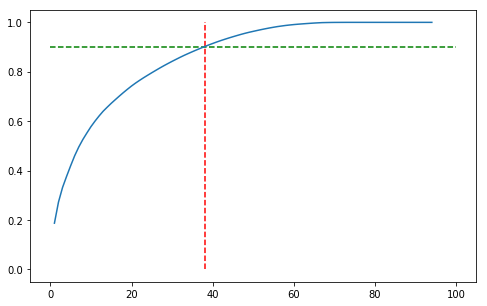

In [178]:
fig = plt.figure(figsize=(8,5))
plt.plot(range(1,len(var_cumu)+1),var_cumu)
plt.vlines(x=38, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.show()

In [179]:
pca_n = IncrementalPCA(n_components=38)

In [180]:
# apply pca with n components on X_train_res
X_train_pca = pca_n.fit_transform(X_train_res)

In [181]:
X_train_pca.shape

(32502, 38)

In [182]:
pd.DataFrame(X_train_pca).head()

0         1         2         3         4         5         6   \
0 -3.535582 -0.540665 -1.221236 -1.339947 -1.940107 -1.832917  0.472847   
1 -1.757282  0.396612  1.226222  0.723267  0.511954 -1.074784 -0.405247   
2 -1.305163  1.526221  1.789975  2.596957 -0.145778 -1.000721  3.259399   
3 -3.183984 -1.719905 -6.345957 -1.967815 -2.375497  1.970264  0.294841   
4  1.319093  0.576638 -0.321155  0.761202 -0.823710 -0.176831 -0.180733   

         7         8         9         10        11        12        13  \
0  0.566877  0.167321 -0.618276 -3.402375 -4.360863  0.255008 -0.433053   
1  0.654459  0.005546 -0.461025  0.822030  0.577124  0.550767 -0.142826   
2  0.552442 -0.606919  0.629984  0.602861  0.361353 -0.118536 -0.197349   
3  5.268847 -1.011245  0.333516 -1.986764  1.182794  1.174774  0.934891   
4 -1.977306 -0.347707  0.850611  0.904176  0.198636  0.289238  1.551658   

         14        15        16        17        18        19        20  \
0  1.342406  0.544241 -0.238507 -0.404757 -0.242583 -1.112629  0.332030   
1 -0.044286 -0.409137 -0.092258 -0.183681  0.182360 -0.033513  0.032038   
2  1.214284  0.657853  0.498149 -0.598028 -0.567803 -0.479344  0.195278   
3 -0.457403  0.135517 -1.596545 -1.094347  0.221742  0.612007 -0.166667   
4  0.112360 -0.172970 -0.548140 -0.794205  0.523927  0.167058  0.369072   

         21        22        23        24        25        26        27  \
0  0.045091 -0.463645  1.104918  2.272083 -0.250648 -0.165182 -0.511641   
1 -0.004930  0.046756 -0.429711 -0.462833 -0.584234 -0.254416 -0.200278   
2  0.227942  0.329587  0.355045 -0.423157  1.021442 -0.347416 -0.665653   
3 -0.007071 -0.173131 -0.411550 -0.690651  0.099929  0.045207 -0.446213   
4  0.912667 -0.003616  0.671969 -0.094176  0.152475  0.019961  1.098895   

         28        29        30        31        32        33        34  \
0 -0.041620  0.324107 -1.197735 -0.056727  0.784774 -1.025379  0.006889   
1  0.002416  0.103689  0.060248  0.053909 -0.095888 -0.095780  0.087470   
2 -0.277260  0.088365  0.382633  0.453465  0.271650  0.200234  0.557921   
3 -0.019017 -0.312227 -0.220416  0.494923  0.746386  0.301183  0.128602   
4 -0.201493 -0.173547  0.533444 -0.806630 -0.212243 -0.504129 -0.439896   

         35        36        37  
0  0.454713  0.061165  1.923849  
1 -0.164207 -0.324372 -0.203685  
2 -0.647706  0.219247  0.068645  
3 -0.688448  0.849368  0.285452  
4 -0.194470  0.157919 -0.977270

In [183]:
# create correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(38, 38)

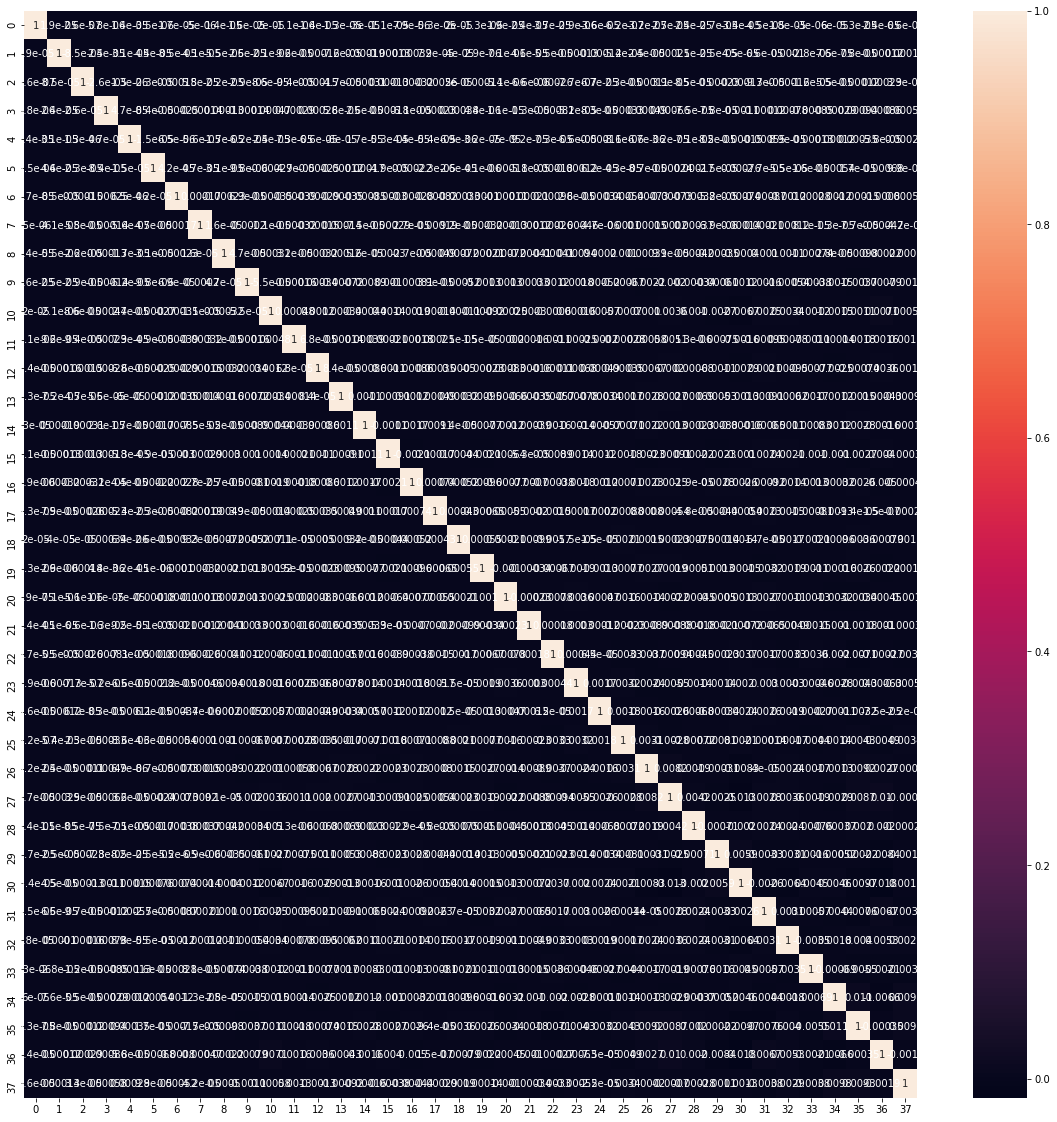

In [184]:
# plot heat map to see the correlation between PCs
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True);plt.show()

***there is no multicollinearity***

In [185]:
# apply pca with n components on X_test
X_test_pca = pca_n.transform(X_test)
X_test_pca.shape

(7567, 38)

In [186]:
# applying logistic regression on the pca data sets

In [187]:
LR_pca = LogisticRegression(random_state = 42, n_jobs= -1)

In [188]:
model_pca = LR_pca.fit(X_train_pca,y_train_res) # fit the model on pca train data set

In [189]:
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
y_train_pred

array([0.01658771, 0.53435849, 0.65249189, ..., 0.8981115 , 0.03991301,
       0.92648884])

In [190]:
# create a data frame with target variable and probabilities
y_train_pred_prob = pd.DataFrame({'churn_user':y_train_res.values, 'churn_user_Prob':y_train_pred})
y_train_pred_prob.head()

churn_user  churn_user_Prob
0         0.0         0.016588
1         1.0         0.534358
2         0.0         0.652492
3         0.0         0.165667
4         0.0         0.669050

In [191]:
# create new columns 'churn_user_pred' by using 'churn_user_Prob' values. 1 if churn_user_Prob > 0.5 else 0
y_train_pred_prob['churn_user_pred'] = y_train_pred_prob.churn_user_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_prob.head()

churn_user  churn_user_Prob  churn_user_pred
0         0.0         0.016588                0
1         1.0         0.534358                1
2         0.0         0.652492                1
3         0.0         0.165667                0
4         0.0         0.669050                1

In [192]:
# Check the distribution of probability, should be with in 0-1
y_train_pred_prob['churn_user_Prob'].describe()

count    3.250200e+04
mean     5.000004e-01
std      3.684598e-01
min      1.314022e-09
25%      9.320689e-02
50%      5.369498e-01
75%      8.837674e-01
max      9.993305e-01
Name: churn_user_Prob, dtype: float64

In [193]:
def confusion_matrix(confusion, actual_target, predicted_target):
    
    print(confusion,'\n')
 
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    print('Sensitivity (or) Recall score :', (TP / float(TP+FN)).round(2))
    print('Specificity:', (TN / float(TN+FP)).round(2))
    print('roc_auc_score:',roc_auc_score(actual_target, predicted_target).round(2))
    print('accuracy_score:',accuracy_score(actual_target, predicted_target).round(2))

In [194]:
print(classification_report(y_train_pred_prob.churn_user,y_train_pred_prob.churn_user_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84     16251
         1.0       0.83      0.86      0.85     16251

    accuracy                           0.85     32502
   macro avg       0.85      0.85      0.85     32502
weighted avg       0.85      0.85      0.85     32502



In [195]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_prob.churn_user, y_train_pred_prob.churn_user_pred )

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_train_pred_prob.churn_user,y_train_pred_prob.churn_user_pred)

[[13431  2820]
 [ 2211 14040]] 

Sensitivity (or) Recall score : 0.86
Specificity: 0.83
roc_auc_score: 0.85
accuracy_score: 0.85


***Using PCA, we get accuracy score 85% and most important concern to have good recall, in this case of PCA model we got 86%.***

### Try to find optimal probability cutoff

In [196]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_prob[i]= y_train_pred_prob.churn_user_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_prob.head()

churn_user  churn_user_Prob  churn_user_pred  0.0  0.1  0.2  0.3  0.4  0.5  \
0         0.0         0.016588                0    1    0    0    0    0    0   
1         1.0         0.534358                1    1    1    1    1    1    1   
2         0.0         0.652492                1    1    1    1    1    1    1   
3         0.0         0.165667                0    1    1    0    0    0    0   
4         0.0         0.669050                1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    1    0    0    0  
3    0    0    0    0  
4    1    0    0    0

In [197]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_prob.churn_user, y_train_pred_prob[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.733001  0.976309  0.489693
0.2   0.2  0.786905  0.958403  0.615408
0.3   0.3  0.816904  0.932189  0.701618
0.4   0.4  0.834287  0.899698  0.768876
0.5   0.5  0.845210  0.863947  0.826472
0.6   0.6  0.844533  0.814227  0.874838
0.7   0.7  0.834226  0.752200  0.916251
0.8   0.8  0.815242  0.682112  0.948372
0.9   0.9  0.679251  0.377208  0.981293


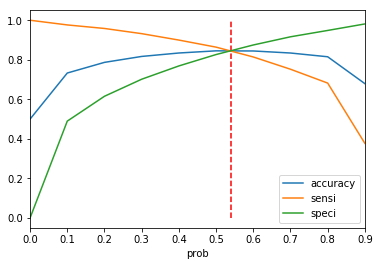

In [198]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

***`Optimal probability cutoff : 0.54`***

In [199]:
# test set evaluation
y_test_pred = model_pca.predict_proba(X_test_pca)[:,1]
y_test_pred

array([0.11735372, 0.02206061, 0.01148275, ..., 0.00746622, 0.66005933,
       0.93979952])

In [200]:
# create a data frame with target variable and probabilities
y_test_pred_prob = pd.DataFrame({'churn_user':y_test.values, 'churn_user_Prob':y_test_pred})
y_test_pred_prob.head()

churn_user  churn_user_Prob
0         0.0         0.117354
1         0.0         0.022061
2         0.0         0.011483
3         0.0         0.143228
4         0.0         0.304847

In [201]:
# create new columns 'churn_user_pred' by using 'churn_user_Prob' values. 1 if churn_user_Prob > 0.54 else 0
y_test_pred_prob['churn_user_pred'] = y_test_pred_prob.churn_user_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_test_pred_prob.head()

churn_user  churn_user_Prob  churn_user_pred
0         0.0         0.117354                0
1         0.0         0.022061                0
2         0.0         0.011483                0
3         0.0         0.143228                0
4         0.0         0.304847                0

In [202]:
# Check the distribution of probability, should be with in 0-1
y_test_pred_prob['churn_user_Prob'].describe()

count    7.567000e+03
mean     2.710781e-01
std      3.002999e-01
min      5.496979e-09
25%      2.206812e-02
50%      1.366910e-01
75%      4.564522e-01
max      9.981193e-01
Name: churn_user_Prob, dtype: float64

In [203]:
print(classification_report(y_test_pred_prob.churn_user, y_test_pred_prob.churn_user_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      6937
         1.0       0.32      0.81      0.46       630

    accuracy                           0.84      7567
   macro avg       0.65      0.83      0.68      7567
weighted avg       0.92      0.84      0.87      7567



In [204]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_prob.churn_user, y_test_pred_prob.churn_user_pred )

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test_pred_prob.churn_user, y_test_pred_prob.churn_user_pred)

[[5854 1083]
 [ 120  510]] 

Sensitivity (or) Recall score : 0.81
Specificity: 0.84
roc_auc_score: 0.83
accuracy_score: 0.84


***Accuracy on test set is about 84% which is very close approximate as train set 85%. considering recall, test set recall score droppped by 5%, but still good score about 81%.***

### Apply Logistic regression (Without PCA)

In [205]:
print('Afer OverSampling_X_train_res shape:',X_train_res.shape)
print('Afer OverSampling_y_train_res shape:',y_train_res.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

Afer OverSampling_X_train_res shape: (32502, 94)
Afer OverSampling_y_train_res shape: (32502,)
X_test shape: (7567, 94)
y_test shape: (7567,)


In [206]:
X_train_res.corr().head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  \
arpu_8            1.000000     0.549033      0.683550       0.171209   
onnet_mou_8       0.549033     1.000000      0.208194       0.087242   
offnet_mou_8      0.683550     0.208194      1.000000       0.082338   
roam_og_mou_8     0.171209     0.087242      0.082338       1.000000   
loc_og_t2t_mou_8  0.404310     0.323011      0.256113      -0.030525   

                  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
arpu_8                    0.404310          0.559024          0.282874   
onnet_mou_8               0.323011          0.136515          0.033084   
offnet_mou_8              0.256113          0.527480          0.171102   
roam_og_mou_8            -0.030525         -0.054410         -0.038934   
loc_og_t2t_mou_8          1.000000          0.432814          0.210598   

                  loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  \
arpu_8                    0.166009      0.588315          0.445553   
onnet_mou_8               0.114877      0.236416          0.952028   
offnet_mou_8              0.134330      0.498635          0.141397   
roam_og_mou_8             0.003440     -0.054009          0.013592   
loc_og_t2t_mou_8          0.077544      0.743641          0.035152   

                  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
arpu_8                    0.468609          0.132163      0.600548   
onnet_mou_8               0.165174          0.014288      0.741517   
offnet_mou_8              0.873361          0.085657      0.659097   
roam_og_mou_8             0.011161         -0.013691      0.016205   
loc_og_t2t_mou_8          0.059746          0.097082      0.062540   

                  isd_og_mou_8  spl_og_mou_8  total_og_mou_8  \
arpu_8                0.092872      0.277647        0.780439   
onnet_mou_8           0.009750      0.209239        0.750485   
offnet_mou_8          0.048154      0.235655        0.792068   
roam_og_mou_8         0.017470     -0.054665       -0.010039   
loc_og_t2t_mou_8      0.038224      0.110065        0.376308   

                  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
arpu_8                    0.382319          0.449024          0.229400   
onnet_mou_8               0.207839          0.108755          0.053755   
offnet_mou_8              0.231060          0.342726          0.131761   
roam_og_mou_8            -0.046565         -0.080548         -0.057299   
loc_og_t2t_mou_8          0.562721          0.361639          0.206776   

                  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
arpu_8                0.487884          0.278292          0.305469   
onnet_mou_8           0.156971          0.287813          0.121039   
offnet_mou_8          0.347404          0.140052          0.302718   
roam_og_mou_8        -0.081721          0.018734          0.017775   
loc_og_t2t_mou_8      0.481386          0.089057          0.126874   

                  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
arpu_8                    0.137809      0.361537        0.530232   
onnet_mou_8               0.020924      0.213095        0.190681   
offnet_mou_8              0.076212      0.298115        0.386990   
roam_og_mou_8            -0.025986      0.019399       -0.071634   
loc_og_t2t_mou_8          0.131465      0.145172        0.475816   

                  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
arpu_8                0.095388      0.134191     0.130370          0.562928   
onnet_mou_8           0.034799      0.043677     0.050939          0.379239   
offnet_mou_8          0.120645      0.111370     0.104889          0.445366   
roam_og_mou_8        -0.034708     -0.011659    -0.016195          0.038782   
loc_og_t2t_mou_8      0.015304      0.075173     0.088981          0.185753   

                  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
arpu_8                    0.963806        0.589131            0.442614   
onnet_mou_8      

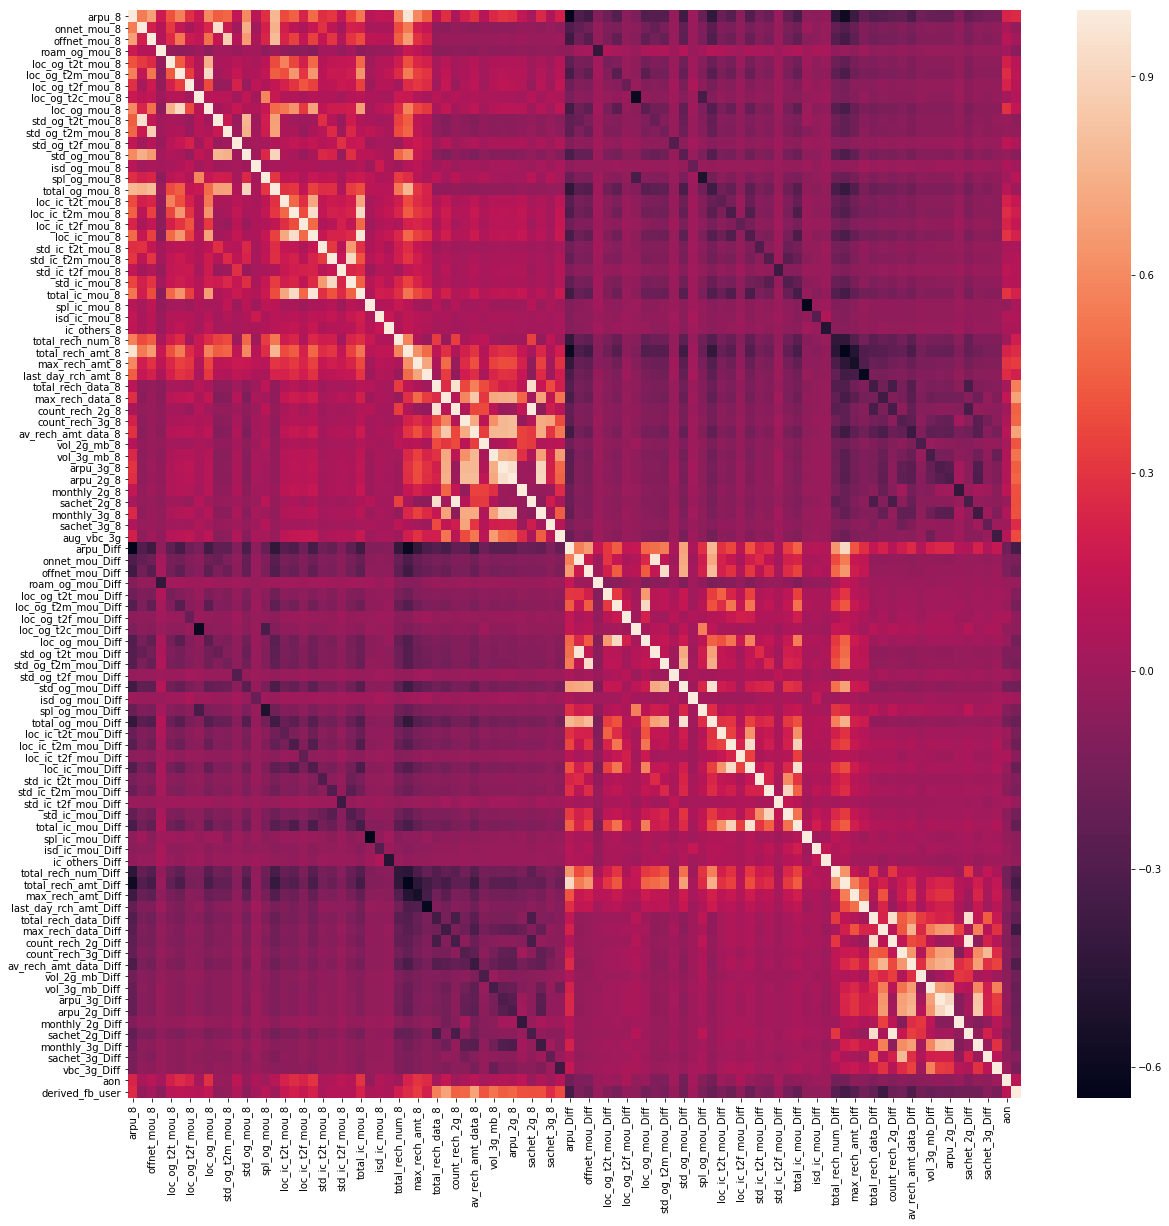

In [207]:
# plot heat map to see the correlation between PCs
plt.figure(figsize=(20,20))
sns.heatmap(X_train_res.corr(), annot=False);plt.show()

***There are several variables having multicollinearity issue. need to check VIF after first model fit on train set***

In [208]:
logit = LogisticRegression(random_state = 42, n_jobs = -1) # creating logistic regression object

In [209]:
# list of alphas to tune
params = {'C':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = logit, 
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs= -1)            
model_cv.fit(X_train_res, y_train_res) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   26.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                               0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [210]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.309561      0.027952          0.00312        0.006240  0.0001   
1        0.365041      0.071556          0.00312        0.006240   0.001   
2        0.867361      0.054578          0.01248        0.006240    0.01   
3        1.475763      0.040199          0.00936        0.007642    0.05   
4        1.519443      0.062866          0.00936        0.007642     0.1   
5        1.482003      0.027906          0.01248        0.006240     0.2   
6        1.538163      0.075527          0.00624        0.007642     0.3   
7        1.494483      0.069346          0.00936        0.007642     0.4   
8        1.510972      0.116918          0.00572        0.007054     0.5   
9        1.537688      0.026388          0.00624        0.007642     0.6   
10       1.516323      0.060338          0.00624        0.007642     0.7   
11       1.503843      0.092869          0.00936        0.007642     0.8   
12       1.516323      0.026839          0.00624        0.007642     0.9   
13       1.410242      0.209900          0.00624        0.007642       1   

           params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.0001}           0.896775           0.910391           0.902538   
1    {'C': 0.001}           0.910644           0.925714           0.916696   
2     {'C': 0.01}           0.914091           0.929783           0.919823   
3     {'C': 0.05}           0.914221           0.930105           0.920155   
4      {'C': 0.1}           0.914223           0.930138           0.920241   
5      {'C': 0.2}           0.914202           0.930141           0.920301   
6      {'C': 0.3}           0.914195           0.930133           0.920317   
7      {'C': 0.4}           0.914186           0.930136           0.920345   
8      {'C': 0.5}           0.914195           0.930123           0.920338   
9      {'C': 0.6}           0.914173           0.930141           0.920338   
10     {'C': 0.7}           0.914180           0.930136           0.920351   
11     {'C': 0.8}           0.914173           0.930135           0.920337   
12     {'C': 0.9}           0.914160           0.930122           0.920347   
13     {'C': 1.0}           0.914172           0.930150           0.920330   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.907846           0.905007         0.904511        0.004683   
1            0.923412           0.918729         0.919039        0.005287   
2            0.928158           0.922101         0.922791        0.005704   
3            0.928738           0.922521         0.923148        0.005808   
4            0.928734           0.922569         0.923181        0.005805   
5            0.928678           0.922574         0.923179        0.005796   
6            0.928647           0.922573         0.923173        0.005788   
7            0.928636           0.922570         0.923175        0.005787   
8            0.928626           0.922575         0.923171        0.005780   
9            0.928600           0.922569         0.923164        0.005786   
10           0.928612           0.922575         0.923171        0.005784   
11           0.928585           0.922569         0.923160        0.005782   
12           0.928584           0.922579         0.923159        0.005782   
13           0.928566           0.922572         0.923158        0.005783   

    rank_test_score  split0_train_score  split1_train_score  \
0                14            0.906730            0.903262   
1                13            0.921971            0.917882   
2                12            0.926297            0.921899   
3                11            0.926869            0.922409   
4                 1            0.926949            0.922487   
5                 2            0.926990            0.922524   
6                 4            0.927003            0.922530   
7                 3            0

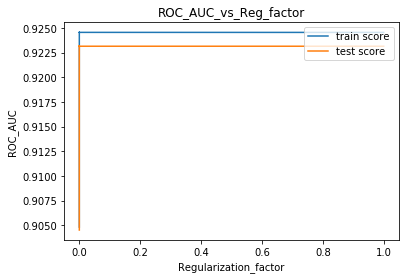

In [211]:
# plotting mean test and train score with alpha 
cv_results['param_C'] = cv_results['param_C'].astype('int32')

# plotting
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('Regularization_factor')
plt.ylabel('ROC_AUC')
plt.title("ROC_AUC_vs_Reg_factor")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [212]:
# check for the best estimator
model_cv.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [213]:
# fit the model on train set using best estimator
C = model_cv.best_estimator_.C
logit = LogisticRegression(C=C)

logit.fit(X_train_res, y_train_res) # fit the model
logit.coef_ # check the coefficient 

array([[ 0.62733892,  0.16976249, -0.33454748,  0.11399176, -0.10889609,
        -0.37233571, -0.11396978, -0.06334007, -0.32876822, -0.27856477,
         0.31779709, -0.41406313,  0.01101253,  0.00576928, -0.14102385,
        -0.15909617, -0.03896415, -0.38985478, -0.13329792, -0.32810673,
        -0.09061406, -0.0913026 , -0.54476912, -0.15359759, -0.33809978,
        -0.68432675,  0.08003326, -0.17187211, -0.40829371, -0.35846145,
         0.12740435, -0.40721336, -0.13859553, -0.29025372, -0.14784814,
         0.00818085, -0.40914153, -0.09840893,  0.04368142, -0.04280845,
         0.4158224 , -0.14945446, -0.12423179,  0.06152656, -0.05112624,
        -0.39739671,  0.12072839, -0.16836797,  0.09436384, -0.01636501,
         0.0660327 , -0.05847172, -0.02210067, -0.17304   , -0.01687034,
         0.15492532, -0.05649464,  0.05230201,  0.06312932, -0.03109797,
        -0.02086118,  0.0096092 ,  0.14649237,  0.08335768, -0.03422078,
         0.12215208, -0.00748586, -0.00706863, -0.0

In [214]:
# check the prediction with train set
y_train_pred = logit.predict(X_train_res)
y_train_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [215]:
print(classification_report(y_train_res, y_train_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85     16251
         1.0       0.84      0.87      0.85     16251

    accuracy                           0.85     32502
   macro avg       0.85      0.85      0.85     32502
weighted avg       0.85      0.85      0.85     32502



In [216]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_res, y_train_pred)

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_train_res, y_train_pred)

[[13465  2786]
 [ 2091 14160]] 

Sensitivity (or) Recall score : 0.87
Specificity: 0.83
roc_auc_score: 0.85
accuracy_score: 0.85


***Model accuracy on train set : 85% and recall score is about 87%. Need to check multicollinearity between the top listed important features***

In [217]:
df_logit = pd.DataFrame(X_train.columns.tolist(),logit.coef_.tolist()) # create dataframe with coefficient along with features
df_logit.reset_index(inplace = True) 
df_logit.columns = ['Coef', 'Feature'] # rename the columns name as 'Coef' and 'Feature'
df_logit.head()

Coef           Feature
0  0.627339            arpu_8
1  0.169762       onnet_mou_8
2 -0.334547      offnet_mou_8
3  0.113992     roam_og_mou_8
4 -0.108896  loc_og_t2t_mou_8

In [218]:
df_res = df_logit.loc[(df_logit['Coef']!=0.000)] # create dataframe by removing 0 coefficient features
df_res['abs_Coef'] = abs(df_res['Coef']) # create new column with absolute coefficient values
df_res.sort_values('abs_Coef', ascending = False, inplace = True) # sort the 'abs_Coef' values
df_res.head()

Coef           Feature  abs_Coef
25 -0.684327      spl_ic_mou_8  0.684327
0   0.627339            arpu_8  0.627339
22 -0.544769  std_ic_t2f_mou_8  0.544769
40  0.415822         arpu_2g_8  0.415822
11 -0.414063  std_og_t2f_mou_8  0.414063

In [219]:
# consider the features as important features having coefficient values>0.09
df_imp_features = df_res.loc[df_res['abs_Coef']>0.09] 
df_imp_features

Coef                Feature  abs_Coef
25 -0.684327           spl_ic_mou_8  0.684327
0   0.627339                 arpu_8  0.627339
22 -0.544769       std_ic_t2f_mou_8  0.544769
40  0.415822              arpu_2g_8  0.415822
11 -0.414063       std_og_t2f_mou_8  0.414063
36 -0.409142     av_rech_amt_data_8  0.409142
28 -0.408294       total_rech_num_8  0.408294
31 -0.407213     last_day_rch_amt_8  0.407213
45 -0.397397             aug_vbc_3g  0.397397
17 -0.389855       loc_ic_t2m_mou_8  0.389855
5  -0.372336       loc_og_t2m_mou_8  0.372336
29 -0.358461       total_rech_amt_8  0.358461
93 -0.342335        derived_fb_user  0.342335
24 -0.338100         total_ic_mou_8  0.338100
2  -0.334547           offnet_mou_8  0.334547
8  -0.328768           loc_og_mou_8  0.328768
19 -0.328107           loc_ic_mou_8  0.328107
10  0.317797       std_og_t2m_mou_8  0.317797
82 -0.296782  av_rech_amt_data_Diff  0.296782
92 -0.295246                    aon  0.295246
86  0.293617           arpu_2g_Diff  0.293617
33 -0.290254        max_rech_data_8  0.290254
9  -0.278565       std_og_t2t_mou_8  0.278565
53 -0.173040    loc_og_t2c_mou_Diff  0.173040
27 -0.171872            ic_others_8  0.171872
1   0.169762            onnet_mou_8  0.169762
47 -0.168368         onnet_mou_Diff  0.168368
15 -0.159096         total_og_mou_8  0.159096
71  0.157593        spl_ic_mou_Diff  0.157593
55  0.154925    std_og_t2t_mou_Diff  0.154925
23 -0.153598           std_ic_mou_8  0.153598
41 -0.149454           monthly_2g_8  0.149454
34 -0.147848        count_rech_2g_8  0.147848
62  0.146492    loc_ic_t2t_mou_Diff  0.146492
83  0.143784         vol_2g_mb_Diff  0.143784
85  0.141981           arpu_3g_Diff  0.141981
14 -0.141024           spl_og_mou_8  0.141024
32 -0.138596      total_rech_data_8  0.138596
18 -0.133298       loc_ic_t2f_mou_8  0.133298
30  0.127404         max_rech_amt_8  0.127404
74  0.127041    total_rech_num_Diff  0.127041
42 -0.124232            sachet_2g_8  0.124232
65  0.122152        loc_ic_mou_Diff  0.122152
46  0.120728              arpu_Diff  0.120728
90  0.116401         sachet_3g_Diff  0.116401
3   0.113992          roam_og_mou_8  0.113992
6  -0.113970       loc_og_t2f_mou_8  0.113970
70  0.113355      total_ic_mou_Diff  0.113355
4  -0.108896       loc_og_t2t_mou_8  0.108896
87 -0.107338        monthly_2g_Diff  0.107338
37 -0.098409            vol_2g_mb_8  0.098409
48  0.094364        offnet_mou_Diff  0.094364
21 -0.091303       std_ic_t2m_mou_8  0.091303
20 -0.090614       std_ic_t2t_mou_8  0.090614

In [220]:
imp_features_lst = df_imp_features['Feature'].values.tolist() # list of important columns

print('Number of features are considered as important:', len(imp_features_lst))

imp_features_lst

Number of features are considered as important: 54


['spl_ic_mou_8',
 'arpu_8',
 'std_ic_t2f_mou_8',
 'arpu_2g_8',
 'std_og_t2f_mou_8',
 'av_rech_amt_data_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'aug_vbc_3g',
 'loc_ic_t2m_mou_8',
 'loc_og_t2m_mou_8',
 'total_rech_amt_8',
 'derived_fb_user',
 'total_ic_mou_8',
 'offnet_mou_8',
 'loc_og_mou_8',
 'loc_ic_mou_8',
 'std_og_t2m_mou_8',
 'av_rech_amt_data_Diff',
 'aon',
 'arpu_2g_Diff',
 'max_rech_data_8',
 'std_og_t2t_mou_8',
 'loc_og_t2c_mou_Diff',
 'ic_others_8',
 'onnet_mou_8',
 'onnet_mou_Diff',
 'total_og_mou_8',
 'spl_ic_mou_Diff',
 'std_og_t2t_mou_Diff',
 'std_ic_mou_8',
 'monthly_2g_8',
 'count_rech_2g_8',
 'loc_ic_t2t_mou_Diff',
 'vol_2g_mb_Diff',
 'arpu_3g_Diff',
 'spl_og_mou_8',
 'total_rech_data_8',
 'loc_ic_t2f_mou_8',
 'max_rech_amt_8',
 'total_rech_num_Diff',
 'sachet_2g_8',
 'loc_ic_mou_Diff',
 'arpu_Diff',
 'sachet_3g_Diff',
 'roam_og_mou_8',
 'loc_og_t2f_mou_8',
 'total_ic_mou_Diff',
 'loc_og_t2t_mou_8',
 'monthly_2g_Diff',
 'vol_2g_mb_8',
 'offnet_mou_Diff',
 'std_

### Check Multicollinearity using VIF

In [221]:
# defined function to Calculate VIF 
def vif_calc(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [222]:
# columns consider for model are having correlation with target varaibles, calculate VIF for X_train columns, to make sure 
# no multicollinearity
vif = vif_calc(X_train_res[imp_features_lst]).copy()
vif

Features           VIF
41            sachet_2g_8           inf
32        count_rech_2g_8           inf
31           monthly_2g_8           inf
15           loc_og_mou_8  2.497497e+09
10       loc_og_t2m_mou_8  1.307316e+09
48       loc_og_t2t_mou_8  4.153079e+08
30           std_ic_mou_8  1.523776e+08
52       std_ic_t2m_mou_8  9.057522e+07
53       std_ic_t2t_mou_8  2.469045e+07
46       loc_og_t2f_mou_8  3.678054e+06
2        std_ic_t2f_mou_8  9.170479e+05
27         total_og_mou_8  6.615138e+05
22       std_og_t2t_mou_8  2.156477e+05
17       std_og_t2m_mou_8  2.021507e+05
14           offnet_mou_8  1.459640e+04
25            onnet_mou_8  1.231486e+04
45          roam_og_mou_8  4.388700e+02
13         total_ic_mou_8  3.662300e+02
16           loc_ic_mou_8  3.216300e+02
36           spl_og_mou_8  1.775000e+02
37      total_rech_data_8  4.659000e+01
26         onnet_mou_Diff  3.153000e+01
29    std_og_t2t_mou_Diff  2.754000e+01
1                  arpu_8  2.381000e+01
11       total_rech_amt_8  2.166000e+01
5      av_rech_amt_data_8  1.623000e+01
9        loc_ic_t2m_mou_8  1.506000e+01
47      total_ic_mou_Diff  1.472000e+01
42        loc_ic_mou_Diff  1.411000e+01
4        std_og_t2f_mou_8  1.378000e+01
3               arpu_2g_8  1.004000e+01
20           arpu_2g_Diff  8.940000e+00
21        max_rech_data_8  8.930000e+00
43              arpu_Diff  7.970000e+00
35           arpu_3g_Diff  6.940000e+00
18  av_rech_amt_data_Diff  6.290000e+00
39         max_rech_amt_8  3.820000e+00
12        derived_fb_user  3.530000e+00
6        total_rech_num_8  2.980000e+00
51        offnet_mou_Diff  2.960000e+00
40    total_rech_num_Diff  2.360000e+00
7      last_day_rch_amt_8  2.320000e+00
33    loc_ic_t2t_mou_Diff  2.050000e+00
49        monthly_2g_Diff  2.020000e+00
0            spl_ic_mou_8  1.870000e+00
28        spl_ic_mou_Diff  1.830000e+00
38       loc_ic_t2f_mou_8  1.690000e+00
50            vol_2g_mb_8  1.650000e+00
8              aug_vbc_3g  1.620000e+00
34         vol_2g_mb_Diff  1.470000e+00
19                    aon  1.330000e+00
44         sachet_3g_Diff  1.200000e+00
23    loc_og_t2c_mou_Diff  1.180000e+00
24            ic_others_8  1.130000e+00

In [223]:
# check VIF if highest VIF is more than defined value then remove highest value VIF column and check VIF again.. until 
# VIF values with in defined value

vif_iter = vif.copy()
vif_iter_col = X_train_res[imp_features_lst].copy()
while(vif_iter['VIF'].values[0]>=5.0):
    drop_col = vif_iter['Features'].values[0]
    vif_iter_col.drop(columns = drop_col, inplace = True)
    vif_iter = vif_calc(vif_iter_col).copy()
vif_iter  

Features   VIF
11  av_rech_amt_data_Diff  4.10
22           arpu_3g_Diff  3.17
25         max_rech_amt_8  3.00
9         derived_fb_user  2.63
7        loc_ic_t2m_mou_8  2.34
8        loc_og_t2m_mou_8  2.32
4        total_rech_num_8  2.26
5      last_day_rch_amt_8  2.21
2               arpu_2g_8  2.16
26    total_rech_num_Diff  2.10
27        loc_ic_mou_Diff  2.09
18           monthly_2g_8  2.02
19        count_rech_2g_8  1.93
0            spl_ic_mou_8  1.86
16        spl_ic_mou_Diff  1.82
20    loc_ic_t2t_mou_Diff  1.77
32        monthly_2g_Diff  1.75
33            vol_2g_mb_8  1.65
34        offnet_mou_Diff  1.63
6              aug_vbc_3g  1.56
21         vol_2g_mb_Diff  1.44
24       loc_ic_t2f_mou_8  1.44
30       loc_og_t2f_mou_8  1.43
13       std_og_t2t_mou_8  1.43
10       std_og_t2m_mou_8  1.41
31       loc_og_t2t_mou_8  1.37
17    std_og_t2t_mou_Diff  1.35
23           spl_og_mou_8  1.34
35       std_ic_t2m_mou_8  1.31
12                    aon  1.29
36       std_ic_t2t_mou_8  1.25
1        std_ic_t2f_mou_8  1.19
3        std_og_t2f_mou_8  1.16
28         sachet_3g_Diff  1.15
14    loc_og_t2c_mou_Diff  1.15
29          roam_og_mou_8  1.10
15            ic_others_8  1.06

In [224]:
# list the important features after VIF check
imp_cols = vif_iter['Features'].values.tolist()
print(imp_cols)

['av_rech_amt_data_Diff', 'arpu_3g_Diff', 'max_rech_amt_8', 'derived_fb_user', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'arpu_2g_8', 'total_rech_num_Diff', 'loc_ic_mou_Diff', 'monthly_2g_8', 'count_rech_2g_8', 'spl_ic_mou_8', 'spl_ic_mou_Diff', 'loc_ic_t2t_mou_Diff', 'monthly_2g_Diff', 'vol_2g_mb_8', 'offnet_mou_Diff', 'aug_vbc_3g', 'vol_2g_mb_Diff', 'loc_ic_t2f_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_Diff', 'spl_og_mou_8', 'std_ic_t2m_mou_8', 'aon', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2f_mou_8', 'sachet_3g_Diff', 'loc_og_t2c_mou_Diff', 'roam_og_mou_8', 'ic_others_8']


In [225]:
len(imp_cols) # number of features for final model 

37

In [226]:
# update the X_train and X_test dfs
X_train_imp = X_train_res[imp_cols].copy()
X_test_imp = X_test[imp_cols].copy()

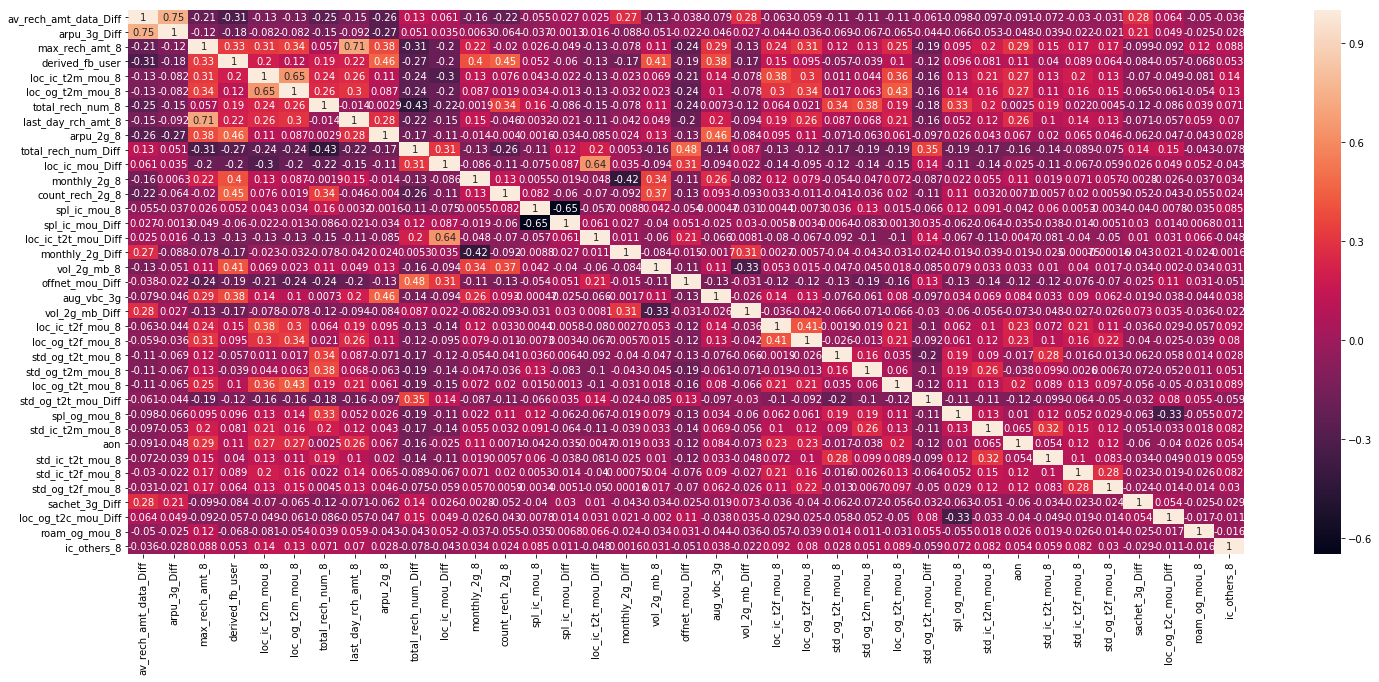

In [227]:
# plot heat map to see the correlation between PCs
plt.figure(figsize=(25,10))
sns.heatmap(X_train_imp.corr(), annot=True);plt.show()

In [228]:
#drop the following features, considering multicollinearity issue.
#'av_rech_amt_data_Diff' , 'max_rech_amt_8' , 'loc_ic_t2m_mou_8'

#update the X_train and X_test dfs
X_train_imp = X_train_imp.drop(columns = ['av_rech_amt_data_Diff' , 'max_rech_amt_8' , 'loc_ic_t2m_mou_8'])
X_test_imp = X_test_imp.drop(columns = ['av_rech_amt_data_Diff' , 'max_rech_amt_8' , 'loc_ic_t2m_mou_8'])

In [229]:
# list of alphas to tune
params = {'C':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = logit, 
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs= -1)            
model_cv.fit(X_train_imp, y_train_res) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    5.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    6.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=0.1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                               0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [230]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.102921      0.007393          0.01248    6.240058e-03  0.0001   
1        0.149760      0.007642          0.01560    0.000000e+00   0.001   
2        0.221520      0.022927          0.00000    0.000000e+00    0.01   
3        0.307121      0.022857          0.01560    9.866360e-03    0.05   
4        0.344561      0.034036          0.01248    6.240058e-03     0.1   
5        0.318241      0.015909          0.01248    6.239986e-03     0.2   
6        0.327601      0.022062          0.01872    1.528486e-02     0.3   
7        0.349441      0.030570          0.00624    7.642391e-03     0.4   
8        0.340081      0.015285          0.00624    7.642508e-03     0.5   
9        0.349441      0.007642          0.01560    1.907349e-07     0.6   
10       0.352561      0.015909          0.01248    6.240010e-03     0.7   
11       0.349441      0.015909          0.00936    7.642508e-03     0.8   
12       0.463121      0.171497          0.01872    6.239939e-03     0.9   
13       0.624962      0.152590          0.01560    9.866360e-03       1   

           params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.0001}           0.897648           0.911385           0.902352   
1    {'C': 0.001}           0.906679           0.921110           0.911686   
2     {'C': 0.01}           0.910000           0.925294           0.915290   
3     {'C': 0.05}           0.910412           0.925872           0.915693   
4      {'C': 0.1}           0.910453           0.925930           0.915729   
5      {'C': 0.2}           0.910483           0.925957           0.915745   
6      {'C': 0.3}           0.910491           0.925966           0.915749   
7      {'C': 0.4}           0.910495           0.925969           0.915750   
8      {'C': 0.5}           0.910496           0.925971           0.915749   
9      {'C': 0.6}           0.910496           0.925971           0.915752   
10     {'C': 0.7}           0.910500           0.925973           0.915753   
11     {'C': 0.8}           0.910499           0.925974           0.915751   
12     {'C': 0.9}           0.910500           0.925974           0.915750   
13     {'C': 1.0}           0.910500           0.925975           0.915751   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.909437           0.905501         0.905264        0.004928   
1            0.919164           0.914321         0.914592        0.005187   
2            0.923261           0.917626         0.918294        0.005512   
3            0.923848           0.918043         0.918773        0.005587   
4            0.923934           0.918098         0.918829        0.005600   
5            0.923954           0.918127         0.918853        0.005599   
6            0.923968           0.918138         0.918862        0.005601   
7            0.923973           0.918143         0.918866        0.005601   
8            0.923975           0.918143         0.918867        0.005601   
9            0.923977           0.918144         0.918868        0.005602   
10           0.923979           0.918146         0.918870        0.005601   
11           0.923978           0.918146         0.918869        0.005601   
12           0.923980           0.918145         0.918870        0.005602   
13           0.923982           0.918146         0.918871        0.005602   

    rank_test_score  split0_train_score  split1_train_score  \
0                14            0.907410            0.903890   
1                13            0.917011            0.913206   
2                12            0.921027            0.916923   
3                11            0.921570            0.917410   
4                10            0.921641            0.917471   
5                 9            0.921679            0.917503   
6                 8            0.921693            0.917513   
7                 7            0

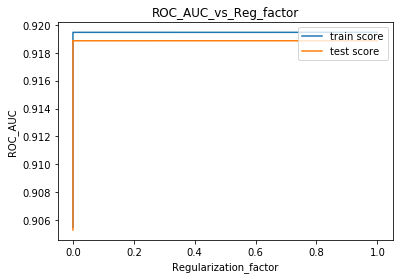

In [231]:
# plotting mean test and train score with alpha 
cv_results['param_C'] = cv_results['param_C'].astype('int32')

# plotting
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('Regularization_factor')
plt.ylabel('ROC_AUC')
plt.title("ROC_AUC_vs_Reg_factor")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [232]:
# check for the best estimator
model_cv.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
# fit the model using best estimator 
C = model_cv.best_estimator_.C
logit = LogisticRegression(C=C)

logit.fit(X_train_imp, y_train_res)
logit.coef_

array([[ 0.14147539, -0.43895453, -1.19497567, -0.4033631 , -0.35252852,
         0.02792629,  0.15421639,  0.29069942, -0.3324761 , -0.52428087,
        -0.70621392,  0.00609668,  0.11857965, -0.24127957, -0.10765921,
         0.17007354, -0.42662557,  0.13751087, -0.37595942, -0.07146393,
        -0.07721924,  0.08023879, -0.33304183,  0.12082052, -0.18274898,
        -0.30844509, -0.28912761, -0.17348512, -0.63977323, -0.4026881 ,
         0.14367608, -0.15246894,  0.18644412, -0.13495269]])

In [234]:
# check the prediction with train set
y_train_pred = logit.predict_proba(X_train_imp)[:,1]
y_train_pred

array([0.00556778, 0.58470171, 0.66796504, ..., 0.89191758, 0.20179221,
       0.9132485 ])

In [235]:
# create a data frame with target variable and probabilities
y_train_pred_prob = pd.DataFrame({'churn_user':y_train_res.values, 'churn_user_Prob':y_train_pred})
y_train_pred_prob.head()

churn_user  churn_user_Prob
0         0.0         0.005568
1         1.0         0.584702
2         0.0         0.667965
3         0.0         0.161441
4         0.0         0.651729

In [236]:
# create new columns 'churn_user_pred' by using 'churn_user_Prob' values. 1 if churn_user_Prob > 0.5 else 0
y_train_pred_prob['churn_user_pred'] = y_train_pred_prob.churn_user_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_prob.head()

churn_user  churn_user_Prob  churn_user_pred
0         0.0         0.005568                0
1         1.0         0.584702                1
2         0.0         0.667965                1
3         0.0         0.161441                0
4         0.0         0.651729                1

In [237]:
# Check the distribution of probability, should be with in 0-1
y_train_pred_prob['churn_user_Prob'].describe()

count    3.250200e+04
mean     4.999996e-01
std      3.686810e-01
min      2.175721e-08
25%      9.656755e-02
50%      5.358611e-01
75%      8.860974e-01
max      9.993933e-01
Name: churn_user_Prob, dtype: float64

In [238]:
print(classification_report(y_train_pred_prob.churn_user,y_train_pred_prob.churn_user_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84     16251
         1.0       0.83      0.86      0.85     16251

    accuracy                           0.85     32502
   macro avg       0.85      0.85      0.85     32502
weighted avg       0.85      0.85      0.85     32502



In [239]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_prob.churn_user, y_train_pred_prob.churn_user_pred )

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_train_pred_prob.churn_user,y_train_pred_prob.churn_user_pred)

[[13449  2802]
 [ 2227 14024]] 

Sensitivity (or) Recall score : 0.86
Specificity: 0.83
roc_auc_score: 0.85
accuracy_score: 0.85


***By comparing scores before after VIF check. It is very clear that there will be no effect on model scores by removing high correlation between independent features.***

### Try to find optimal probability cutoff

In [240]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_prob[i]= y_train_pred_prob.churn_user_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_prob.head()

churn_user  churn_user_Prob  churn_user_pred  0.0  0.1  0.2  0.3  0.4  0.5  \
0         0.0         0.005568                0    1    0    0    0    0    0   
1         1.0         0.584702                1    1    1    1    1    1    1   
2         0.0         0.667965                1    1    1    1    1    1    1   
3         0.0         0.161441                0    1    1    0    0    0    0   
4         0.0         0.651729                1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    1    0    0    0  
3    0    0    0    0  
4    1    0    0    0

In [241]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_prob.churn_user, y_train_pred_prob[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.731955  0.978771  0.485139
0.2   0.2  0.789275  0.958033  0.620516
0.3   0.3  0.817550  0.930343  0.704757
0.4   0.4  0.836072  0.900991  0.771153
0.5   0.5  0.845271  0.862962  0.827580
0.6   0.6  0.841856  0.809612  0.874100
0.7   0.7  0.832564  0.750661  0.914467
0.8   0.8  0.812042  0.677989  0.946096
0.9   0.9  0.686542  0.394314  0.978771


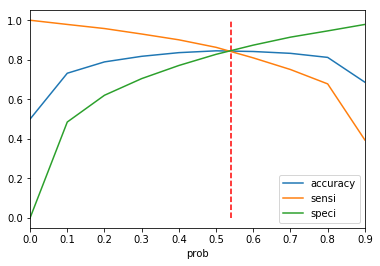

In [242]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

***`Optimal probability cutoff : 0.54`***

In [243]:
# create new columns 'churn_user_pred' by using 'churn_user_Prob' values. 1 if churn_user_Prob > 0.5 else 0
y_train_pred_prob['churn_user_pred'] = y_train_pred_prob.churn_user_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_train_pred_prob[['churn_user','churn_user_pred']].head()

churn_user  churn_user_pred
0         0.0                0
1         1.0                1
2         0.0                1
3         0.0                0
4         0.0                1

In [244]:
print(classification_report(y_train_pred_prob.churn_user,y_train_pred_prob.churn_user_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85     16251
         1.0       0.85      0.84      0.85     16251

    accuracy                           0.85     32502
   macro avg       0.85      0.85      0.85     32502
weighted avg       0.85      0.85      0.85     32502



In [245]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_prob.churn_user, y_train_pred_prob.churn_user_pred )

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_train_pred_prob.churn_user,y_train_pred_prob.churn_user_pred)

[[13771  2480]
 [ 2547 13704]] 

Sensitivity (or) Recall score : 0.84
Specificity: 0.85
roc_auc_score: 0.85
accuracy_score: 0.85


***Model accuracy on train set is good with 85% and recall score is about 84%***

In [246]:
# test set evaluation
y_test_pred = logit.predict_proba(X_test_imp)[:,1]
y_test_pred

array([0.07181693, 0.05582457, 0.02735934, ..., 0.02049673, 0.64049962,
       0.92696907])

In [247]:
# create a data frame with target variable and probabilities
y_test_pred_prob = pd.DataFrame({'churn_user':y_test.values, 'churn_user_Prob':y_test_pred})
y_test_pred_prob.head()

churn_user  churn_user_Prob
0         0.0         0.071817
1         0.0         0.055825
2         0.0         0.027359
3         0.0         0.171951
4         0.0         0.265379

In [248]:
# create new columns 'churn_user_pred' by using 'churn_user_Prob' values. 1 if churn_user_Prob > 0.54 else 0
y_test_pred_prob['churn_user_pred'] = y_test_pred_prob.churn_user_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_test_pred_prob.head()

churn_user  churn_user_Prob  churn_user_pred
0         0.0         0.071817                0
1         0.0         0.055825                0
2         0.0         0.027359                0
3         0.0         0.171951                0
4         0.0         0.265379                0

In [249]:
# Check the distribution of probability, should be with in 0-1
y_test_pred_prob['churn_user_Prob'].describe()

count    7.567000e+03
mean     2.735972e-01
std      3.015762e-01
min      2.200257e-09
25%      2.374719e-02
50%      1.399026e-01
75%      4.647575e-01
max      9.972484e-01
Name: churn_user_Prob, dtype: float64

In [250]:
print(classification_report(y_test_pred_prob.churn_user, y_test_pred_prob.churn_user_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      6937
         1.0       0.32      0.80      0.45       630

    accuracy                           0.84      7567
   macro avg       0.65      0.82      0.68      7567
weighted avg       0.92      0.84      0.87      7567



In [251]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_prob.churn_user, y_test_pred_prob.churn_user_pred )

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test_pred_prob.churn_user, y_test_pred_prob.churn_user_pred)

[[5850 1087]
 [ 126  504]] 

Sensitivity (or) Recall score : 0.8
Specificity: 0.84
roc_auc_score: 0.82
accuracy_score: 0.84


***Model accuracy on test set is good with 84% and recall score is about 80%***

In [252]:
# create dataframe with coefficient along with features
df_logit = pd.DataFrame(X_train_imp.columns.tolist(),logit.coef_.tolist())
df_logit.reset_index(inplace = True)
df_logit.columns = ['Coef', 'Feature'] # rename the columns name as 'Coef' and 'Feature'
df_logit.head()

Coef             Feature
0  0.141475        arpu_3g_Diff
1 -0.438955     derived_fb_user
2 -1.194976    loc_og_t2m_mou_8
3 -0.403363    total_rech_num_8
4 -0.352529  last_day_rch_amt_8

In [253]:
df_res = df_logit.loc[(df_logit['Coef']!=0.000)] # create dataframe by removing 0 coefficient features
df_res.sort_values('Coef', ascending = False, inplace = True) # sort the 'Coef' values
df_res.head()

Coef              Feature
7   0.290699      loc_ic_mou_Diff
32  0.186444        roam_og_mou_8
15  0.170074      offnet_mou_Diff
6   0.154216  total_rech_num_Diff
30  0.143676       sachet_3g_Diff

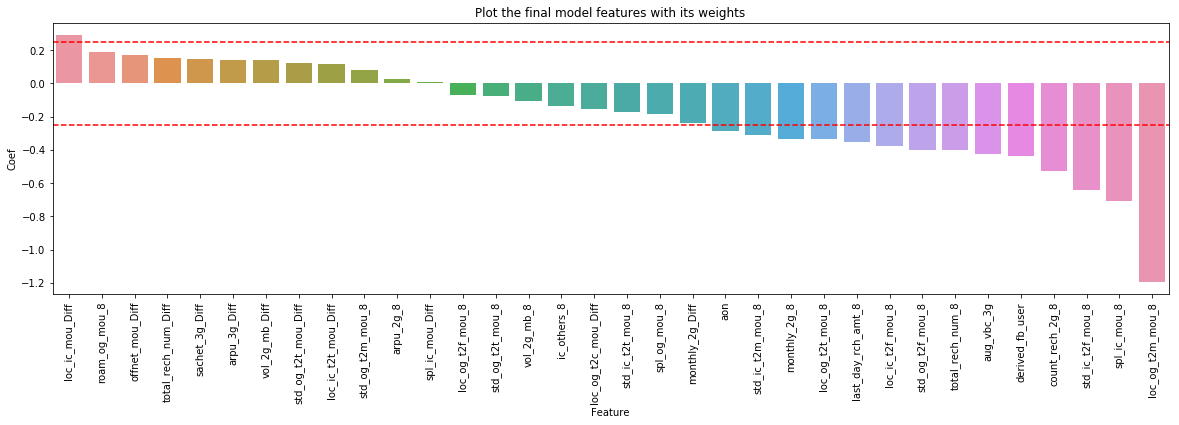

In [254]:
# plot the final model features with its weights
plt.figure(figsize = (20,5))
sns.barplot(x = 'Feature', y = 'Coef', data = df_res)

# horizontal on the bar plot showing top features  
plt.axhline(y=0.25, color='r', linestyle='--',linewidth= 1.5) 
plt.axhline(y=-0.25, color='r', linestyle='--',linewidth= 1.5) 


plt.title('Plot the final model features with its weights')
plt.xticks(rotation = 90)
plt.show()

In [255]:
df_res['abs_coef'] = abs(df_res['Coef']) # create absolute coef columns
df_res.sort_values('abs_coef', ascending = False, inplace = True) # sort values with 'abs_coef'

# list the features having abs_coef values > 0.01
list_imp_features = df_res.loc[df_res['abs_coef']>0.01]['Feature'].values.tolist()
print(list_imp_features)

['loc_og_t2m_mou_8', 'spl_ic_mou_8', 'std_ic_t2f_mou_8', 'count_rech_2g_8', 'derived_fb_user', 'aug_vbc_3g', 'total_rech_num_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8', 'last_day_rch_amt_8', 'loc_og_t2t_mou_8', 'monthly_2g_8', 'std_ic_t2m_mou_8', 'loc_ic_mou_Diff', 'aon', 'monthly_2g_Diff', 'roam_og_mou_8', 'spl_og_mou_8', 'std_ic_t2t_mou_8', 'offnet_mou_Diff', 'total_rech_num_Diff', 'loc_og_t2c_mou_Diff', 'sachet_3g_Diff', 'arpu_3g_Diff', 'vol_2g_mb_Diff', 'ic_others_8', 'std_og_t2t_mou_Diff', 'loc_ic_t2t_mou_Diff', 'vol_2g_mb_8', 'std_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'arpu_2g_8']


In [256]:
# remove the tages of features (_8 / _Diff) to have a unique features for bussiness explanations
remove_8_tag = [s.rstrip('_8') for s in list_imp_features] # remove tag '_8'
remove_Diff_tag = [s.rstrip('_Diff') for s in remove_8_tag] # remove tag '_Diff'

list_final_features = list(set(remove_Diff_tag)) # list of unique feature names
print(len(list_final_features)) # length of important features
print(list_final_features)

29
['arpu_3g', 'loc_ic_t2t_mou', 'std_og_t2t_mou', 'offnet_mou', 'loc_og_t2m_mou', 'total_rech_num', 'loc_ic_mou', 'loc_og_t2f_mou', 'arpu_2g', 'spl_ic_mou', 'ic_others', 'aug_vbc_3g', 'vol_2g_mb', 'last_day_rch_amt', 'std_ic_t2t_mou', 'sachet_3g', 'spl_og_mou', 'std_og_t2m_mou', 'count_rech_2g', 'loc_ic_t2f_mou', 'loc_og_t2c_mou', 'aon', 'std_ic_t2m_mou', 'std_og_t2f_mou', 'loc_og_t2t_mou', 'roam_og_mou', 'std_ic_t2f_mou', 'derived_fb_user', 'monthly_2g']


<font color = 'blue'>
    
### Top influencing features on Business:
***
</font>

<font color = 'brown'>
    
***<U>Outgoing calls features:</U>***  
* `'loc_og_t2m_mou', 'std_og_t2f_mou' , 'loc_og_t2t_mou'`  

    * Having less outgoing calls compared to good phase, most likely to churn / leave current mobile network.
    
***<U>Incoming calls features:</U>***
* `spl_ic_mou, std_ic_t2f_mou, loc_ic_t2f_mou, std_ic_t2m_mou, loc_ic_mou`
    * Having less incoming calls compared to good phase, most likely tends to leave the mobile network.

***<U>Mobile data related features:</U>***
* `count_rech_2g, vbc_3g, monthly_2g`
    * Having less data usage compared to good phase, most likely tends to leave the mobile network.

***<U>Mobile data related features:</U>***
* `vbc_3g, monthly_2g`
    * Having less data usage compared to good phase, most likely tends to leave the mobile network.  

***<U>Mobile recharge related features:</U>***
* `count_rech_2g, total_rech_num, last_day_rch_amt`
    * Having less frequent recharge compared to good phase, most likely tends to leave the mobile network.

***<U>derived fb_user feature:</U>***
* fb user not being active fb user consistently, especially in the latest months are likely change the mobile network.  

</font>

* **Network provider try to introduce new packages for std and loc call to give most efficient call rates not only for same network calls but also other network calls.**
* **Recommended to review the offers for data packages and offer good better packages as per customer usage.**


### Got good insights from logistic regression model, but lets check with tree model to check for better model.

### Random Forest Model

In [257]:
rfc = RandomForestClassifier(random_state = 42,n_jobs=-1) # create object

In [258]:
rfc.fit(X_train_res,y_train_res) # fit the model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [259]:
y_test_pred = rfc.predict(X_test) # predictions on X_test
print(classification_report(y_test,y_test_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      6937
         1.0       0.56      0.67      0.61       630

    accuracy                           0.93      7567
   macro avg       0.76      0.81      0.78      7567
weighted avg       0.93      0.93      0.93      7567



In [260]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred)

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test, y_test_pred)

[[6602  335]
 [ 210  420]] 

Sensitivity (or) Recall score : 0.67
Specificity: 0.95
roc_auc_score: 0.81
accuracy_score: 0.93


***Accuracy of model on test set is very good 93%, but recall score is not up to mark which is only 67%. can be possible to improve by tuning hyperparameters***

In [261]:
# Tuning : max_depth

In [262]:
n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'max_depth': range(2,15,2)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs = -1) # use 'n_jobs = -1' to use optimum number of cores


# fit tree on training data
rf_depth = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy',n_jobs = -1)
rf_depth.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [263]:
# scores of GridSearch CV
scores = rf_depth.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.693290      1.432351         0.755041        0.417964   
1       8.856824      0.364185         0.943162        0.361951   
2      13.071072      0.646472         0.847922        0.293121   
3      17.498074      0.599613         0.950809        0.174702   
4      20.033151      0.864660         1.129442        0.134414   
5      22.429992      0.876047         1.511565        0.203233   
6      22.976677      3.567557         0.748801        0.331221   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.826488           0.840948   
1               4   {'max_depth': 4}           0.862944           0.874327   
2               6   {'max_depth': 6}           0.887710           0.911552   
3               8   {'max_depth': 8}           0.909860           0.934318   
4              10  {'max_depth': 10}           0.927703           0.946316   
5              12  {'max_depth': 12}           0.940932           0.957853   
6              14  {'max_depth': 14}           0.948008           0.962621   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.837077           0.838154           0.830308         0.834595   
1           0.873231           0.876615           0.874615         0.872347   
2           0.908000           0.911846           0.909077         0.905637   
3           0.931231           0.935231           0.930462         0.928220   
4           0.944000           0.951385           0.948308         0.943542   
5           0.956000           0.961692           0.957692         0.954834   
6           0.959077           0.967846           0.961846         0.959880   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.005353                7            0.838852            0.836083   
1        0.004827                6            0.881543            0.871120   
2        0.009081                5            0.917311            0.913196   
3        0.009354                4            0.945925            0.940541   
4        0.008282                3            0.967847            0.962386   
5        0.007196                2            0.978847            0.975655   
6        0.006579                1            0.984770            0.982193   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.834705            0.835013            0.834705   
1            0.873856            0.875779            0.874471   
2            0.911661            0.912161            0.910084   
3            0.942081            0.939197            0.939966   
4            0.963541            0.961503            0.962388   
5            0.976425            0.975617            0.975925   
6            0.983078            0.982540            0.983232   

   mean_train_score  std_train_score  
0          0.835872         0.001574  
1          0.875354         0.003448  
2          0.912882         0.002431  
3          0.941542         0.002387  
4          0.963533         0.002252  
5          0.976494         0.001211  
6          0.983163         0.000886

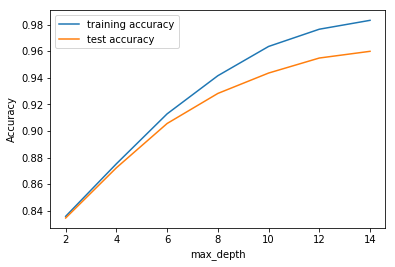

In [264]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***`max_depth: 4-6` looks good to consider.***

In [265]:
# tuning : n_estimators

In [266]:
n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'n_estimators': range(5,100, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)


# fit tree on training data
rf_n_est = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy', n_jobs = -1)
rf_n_est.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [267]:
# scores of GridSearch CV
scores = rf_n_est.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.759566      0.678729         0.243760        0.268121   
1        3.012382      1.010852         0.302451        0.227399   
2        5.359730      0.296158         0.473659        0.068602   
3        7.594941      1.097790         0.518449        0.195156   
4        8.887672      1.158292         0.652081        0.384078   
5       10.595645      0.768301         0.698881        0.191925   
6       11.883987      0.920473         1.023362        0.296745   
7       13.826402      1.125311         0.911042        0.157429   
8       15.345335      1.382145         0.979682        0.317475   
9       17.222552      0.754062         1.128443        0.348080   
10      19.799315      0.316236         1.085762        0.324631   
11      21.559784      0.638525         1.154402        0.170033   
12      23.324760      1.145547         1.073282        0.147137   
13      25.089163      0.932737         1.201202        0.148651   
14      26.507385      0.683312         1.179362        0.088577   
15      28.677812      1.191779         1.316843        0.268444   
16      30.440701      0.316468         1.222522        0.204555   
17      32.570267      0.786453         1.263563        0.170030   
18      28.626246      4.949507         0.611521        0.287549   

   param_n_estimators                params  split0_test_score  \
0                   5   {'n_estimators': 5}           0.932626   
1                  10  {'n_estimators': 10}           0.944316   
2                  15  {'n_estimators': 15}           0.950162   
3                  20  {'n_estimators': 20}           0.948469   
4                  25  {'n_estimators': 25}           0.951854   
5                  30  {'n_estimators': 30}           0.953238   
6                  35  {'n_estimators': 35}           0.953084   
7                  40  {'n_estimators': 40}           0.953699   
8                  45  {'n_estimators': 45}           0.953392   
9                  50  {'n_estimators': 50}           0.954469   
10                 55  {'n_estimators': 55}           0.954622   
11                 60  {'n_estimators': 60}           0.954622   
12                 65  {'n_estimators': 65}           0.954622   
13                 70  {'n_estimators': 70}           0.956161   
14                 75  {'n_estimators': 75}           0.956622   
15                 80  {'n_estimators': 80}           0.955238   
16                 85  {'n_estimators': 85}           0.956007   
17                 90  {'n_estimators': 90}           0.955699   
18                 95  {'n_estimators': 95}           0.955391   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.956161           0.948923           0.959231   
1            0.960314           0.960769           0.966769   
2            0.966005           0.964923           0.967846   
3            0.968313           0.966923           0.968769   
4            0.968159           0.965846           0.970308   
5            0.970005           0.967231           0.972000   
6            0.968774           0.965846           0.971538   
7            0.968774           0.966000           0.972923   
8            0.968159           0.966000           0.972615   
9            0.969236           0.966000           0.972462   
10           0.969389           0.966769           0.970769   
11           0.970466           0.966154           0.972462   
12           0.970620           0.966308           0.972154   
13           0.971697           0.966308           0.973385   
14           0.971850           0.966615           0.973538   
15           0.972158           0.967385           0.973692   
16           0.971235           0.966615           0.973385   
17           0.970774           0.966462           0.974000   
18           0.970158           0.966615           0.974000   

    split4_test_score  mean_test_score  std_test_score  rank_

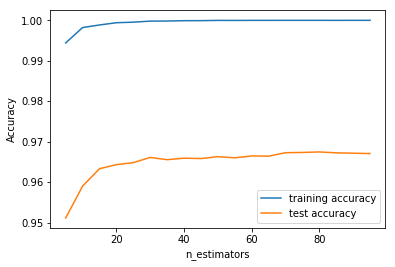

In [268]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***`n_estimator: 80` looks good to consider.***

In [269]:
# Tuning : max_features

In [270]:
n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'max_features': range(5,40,5)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs=-1)


# fit tree on training data
rf_max_fea = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy',n_jobs=-1)
rf_max_fea.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [271]:
# scores of GridSearch CV
scores = rf_max_fea.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.585505      0.535524         0.558935        0.336258   
1      43.608295      1.086406         1.073282        0.517055   
2      64.736552      1.824399         1.376626        0.174887   
3      89.728249      0.818967         1.404003        0.229060   
4     114.632949      2.091022         1.510007        0.363823   
5     144.781257      3.571023         1.371905        0.489338   
6     147.155539     30.900457         1.045202        0.536786   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.955853   
1                 10  {'max_features': 10}           0.956930   
2                 15  {'max_features': 15}           0.954007   
3                 20  {'max_features': 20}           0.952469   
4                 25  {'max_features': 25}           0.953238   
5                 30  {'max_features': 30}           0.949392   
6                 35  {'max_features': 35}           0.950777   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.970928           0.966154           0.976462           0.969077   
1           0.970005           0.966462           0.972615           0.970154   
2           0.969697           0.967385           0.973077           0.968769   
3           0.969236           0.966154           0.971385           0.970462   
4           0.968928           0.965846           0.971385           0.969077   
5           0.970158           0.965692           0.971231           0.968462   
6           0.968313           0.966769           0.970308           0.968923   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.967695        0.006809                1                 1.0   
1         0.967233        0.005512                2                 1.0   
2         0.966587        0.006564                3                 1.0   
3         0.965941        0.006964                4                 1.0   
4         0.965695        0.006472                5                 1.0   
5         0.964987        0.008019                7                 1.0   
6         0.965018        0.007211                6                 1.0   

   split1_train_score  split2_train_score  split3_train_score  \
0                 1.0                 1.0                 1.0   
1                 1.0                 1.0                 1.0   
2                 1.0                 1.0                 1.0   
3                 1.0                 1.0                 1.0   
4                 1.0                 1.0                 1.0   
5                 1.0                 1.0                 1.0   
6                 1.0                 1.0                 1.0   

   split4_train_score  mean_train_score  std_train_score  
0                 1.0               1.0              0.0  
1                 1.0               1.0              0.0  
2                 1.0               1.0              0.0  
3                 1.0               1.0              0.0  
4                 1.0               1.0              0.0  
5                 1.0               1.0              0.0  
6                 1.0               1.0              0.0

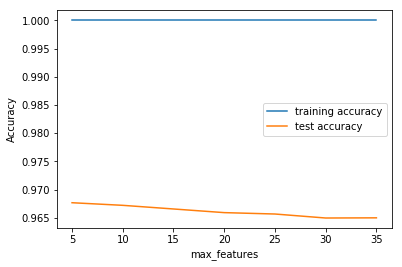

In [272]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***`max_features: 5-15`***

In [273]:
# tuning : min_sample_leaf

In [274]:
n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'min_samples_leaf': range(10, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs= -1)


# fit tree on training data
rf_min_sam_leaf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy', n_jobs= -1)
rf_min_sam_leaf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [275]:
# scores of GridSearch CV
scores = rf_min_sam_leaf.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      31.318652      1.129113         0.791424        0.314356   
1      20.297242      2.085380         0.936002        0.364654   
2      16.781513      0.732784         0.771891        0.265360   
3      14.932655      1.317769         0.766186        0.205935   
4      11.559006      3.209364         0.495015        0.476346   

  param_min_samples_leaf                     params  split0_test_score  \
0                     10   {'min_samples_leaf': 10}           0.922473   
1                    110  {'min_samples_leaf': 110}           0.884479   
2                    210  {'min_samples_leaf': 210}           0.877250   
3                    310  {'min_samples_leaf': 310}           0.867251   
4                    410  {'min_samples_leaf': 410}           0.863559   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.950008           0.944000           0.951231           0.949692   
1           0.910321           0.903385           0.905692           0.902000   
2           0.898016           0.890769           0.896000           0.895077   
3           0.894324           0.886000           0.890154           0.886615   
4           0.884633           0.878462           0.882308           0.879385   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.943481        0.010797                1            0.967847   
1         0.901176        0.008813                2            0.912388   
2         0.891422        0.007471                3            0.900427   
3         0.884869        0.009296                4            0.892350   
4         0.877669        0.007385                5            0.885427   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.964732            0.964580            0.964118   
1            0.906119            0.905084            0.905507   
2            0.892043            0.892470            0.892470   
3            0.886312            0.886009            0.887316   
4            0.878120            0.881432            0.878317   

   split4_train_score  mean_train_score  std_train_score  
0            0.964964          0.965248         0.001329  
1            0.904700          0.906760         0.002853  
2            0.894200          0.894322         0.003141  
3            0.887662          0.887930         0.002293  
4            0.879471          0.880554         0.002706

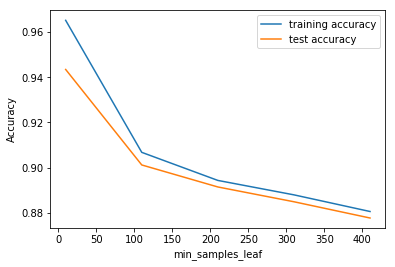

In [276]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***`min_samples_leaf : 100-200`***

In [277]:
# tuning: minsample_split

In [278]:
n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'min_samples_split': range(100, 800, 200)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs=-1)


# fit tree on training data
rf_min_sam_split = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy', n_jobs=-1)
rf_min_sam_split.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [279]:
# scores of GridSearch CV
scores = rf_min_sam_split.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      37.966828      0.844431         0.587144        0.122223   
1      35.351349      2.482155         0.443498        0.117150   
2      30.679690      0.958749         0.781601        0.348273   
3      26.506647      1.723525         0.635722        0.118261   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}           0.908476   
1                     300  {'min_samples_split': 300}           0.892786   
2                     500  {'min_samples_split': 500}           0.886787   
3                     700  {'min_samples_split': 700}           0.882172   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.939548           0.934308           0.937846           0.934615   
1           0.919858           0.916923           0.919692           0.916308   
2           0.909706           0.908308           0.908769           0.907538   
3           0.908783           0.900615           0.905538           0.900154   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.930959        0.011413                1            0.953002   
1         0.913113        0.010264                2            0.928041   
2         0.904222        0.008746                3            0.916580   
3         0.899453        0.009215                4            0.912734   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.948425            0.948696            0.947504   
1            0.921926            0.921775            0.922275   
2            0.909042            0.910584            0.911007   
3            0.903888            0.902815            0.902623   

   split4_train_score  mean_train_score  std_train_score  
0            0.948581          0.949242         0.001927  
1            0.920314          0.922866         0.002673  
2            0.908738          0.911190         0.002831  
3            0.903354          0.905083         0.003851

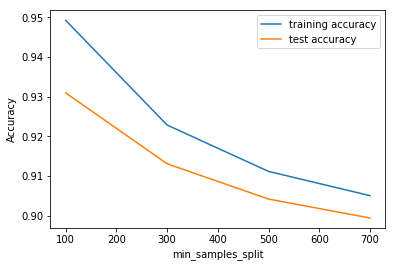

In [280]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***`minsample_split:200-600`***

In [281]:
n_folds = 5 # number of folds for k-fold CV

# parameters for model building
param_grid = {
    'max_depth': [4,6],
    'min_samples_leaf': [100,200],
    'min_samples_split': [200,600],
    'n_estimators': [80], 
    'max_features': [5,15]
}
# instantiate the model
rf = RandomForestClassifier(random_state = 42,n_jobs=-1)


# fit tree on training data
rf_grid = GridSearchCV(rf, param_grid = param_grid, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy',verbose = 1,n_jobs=-1)
rf_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [282]:
rf_grid.best_score_ # best accuracy score

0.9010524865996947

In [283]:
rf_grid.best_params_ # parameters for best accuracy

{'max_depth': 6,
 'max_features': 15,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 80}

In [284]:
rfc_final = RandomForestClassifier(max_depth=6,
                                   max_features=5,
                                   min_samples_leaf=100,
                                   min_samples_split=600,
                                   n_estimators=80,
                                   random_state=42,n_jobs=-1)

In [285]:
rfc_final.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=600,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [286]:
y_test_pred = rfc_final.predict(X_test)

In [287]:
print(classification_report(y_test,y_test_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      6937
         1.0       0.44      0.77      0.56       630

    accuracy                           0.90      7567
   macro avg       0.71      0.84      0.75      7567
weighted avg       0.93      0.90      0.91      7567



In [288]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred)

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test, y_test_pred)

[[6326  611]
 [ 146  484]] 

Sensitivity (or) Recall score : 0.77
Specificity: 0.91
roc_auc_score: 0.84
accuracy_score: 0.9


In [289]:
print(datetime.now() - startTime)

0:43:35.543905


### By checking Random forest model prediction, it clear that logistic regression model with out PCA gives best results. Please refer the business insights mentioned with logistic regression(with out pca) result.